In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import pandas as pd
import seaborn as sns
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



d = pd.read_csv('houses_edited.csv')


features = ["bedrooms", "bathrooms", "sqft", "parking", 
            "mean_district_income", "Plex", "Semi-Detached", 
            "Store W/Apt/Offc", "Co-Op Apt", "Co-Ownership Apt", 
            "Link", "Comm Element Condo", "Att/Row/Twnhouse", 
            "Condo Townhouse", "Detached", "Condo Apt"] #define list of features to input in nerual network


df = pd.DataFrame(data = d)


def remove_beds(x): #function to remove the word "beds" from column of number of beds
    x = x.replace(" beds", "")
    return x
def calc_beds(j): #function to calculate number of beds from string
    answer = sum(int(i) for i in j.split('+'))
    return answer


df.bedrooms = df.bedrooms.apply(remove_beds) 
df.bedrooms = df.bedrooms.apply(calc_beds)

In [2]:
df = df.drop(["description", "mls", "bedrooms_ag", "bedrooms_bg", "full_link", "full_address", "title",
              "final_price_transformed", "final_price_log", "city_district", "district_code",
              "index", "lat", "long", "list_price"], axis = 1) #Remove insignificant values

#Fill missing sqft values based on type of property

sqft_Store = 0
sqft_Link = 0
sqft_Twn = 0
sqft_Plex = 0
sqft_Detached = 0
sqft_Semi_detached = 0
sqft_Store_count = 0
sqft_Link_count = 0
sqft_Twn_count = 0
sqft_Plex_count = 0
sqft_Detached_count = 0
sqft_Semi_detached_count = 0


for index, row in df.iterrows():
    if pd.notnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
      sqft_Store += row["sqft"]
      sqft_Store_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Link":
      sqft_Link += row["sqft"]
      sqft_Link_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
      sqft_Twn += row["sqft"]
      sqft_Twn_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Plex":
      sqft_Plex += row["sqft"]
      sqft_Plex_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Detached":
      sqft_Detached += row["sqft"]
      sqft_Detached_count += 1
    if pd.notnull(row["sqft"]) and row["type"] == "Semi-Detached":
      sqft_Semi_detached += row["sqft"]
      sqft_Semi_detached_count += 1

avg_Store = sqft_Store/sqft_Store_count
avg_Link = sqft_Link/sqft_Link_count
avg_Twn = sqft_Twn/sqft_Twn_count
avg_Plex = sqft_Plex/sqft_Plex_count
avg_Detached = sqft_Detached/sqft_Detached_count
avg_Semi_detached = sqft_Semi_detached/sqft_Semi_detached_count


for index, row in df.iterrows():
  #print(row["type"], row["sqft"])
  if pd.isnull(row["sqft"]) and row["type"] == "Store W/Apt/Offc":
    df.at[index, "sqft"] = avg_Store

  if pd.isnull(row["sqft"]) and row["type"] == "Link":
    df.at[index, "sqft"] = avg_Link

  if pd.isnull(row["sqft"]) and row["type"] == "Att/Row/Twnhouse":
    df.at[index, "sqft"] = avg_Twn

  if pd.isnull(row["sqft"]) and row["type"] == "Plex":
    df.at[index, "sqft"] = avg_Plex

  if pd.isnull(row["sqft"]) and row["type"] == "Detached":
    df.at[index, "sqft"] = avg_Detached

  if pd.isnull(row["sqft"]) and row["type"] == "Semi-Detached":
    df.at[index, "sqft"] = avg_Semi_detached


dummy_type = pd.get_dummies(df["type"]) #allow 
df = pd.concat([df, dummy_type], axis = 1)
df = df.drop(["type"], axis = 1)

In [3]:
train, test = train_test_split(df, test_size = 0.20, random_state = 0) #Split data into 2 parts, 
                                                                       #training and testing data, with ratio 8:2 

x_train = train[features]
y_train = train[['final_price']]

model = Sequential()

model.add(Dense(64, input_dim = 16,activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate = 0.026) 

model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['MeanAbsolutePercentageError'])
training = model.fit(x_train, y_train, epochs = 20000, batch_size = 50, shuffle = False, verbose = 2)
#training = model.predict(x_train)
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy))

predictions = model.predict(x_train)
#print(predictions)
for i in range(10):
  print("%d, expected: %d" % (predictions[i], y_train.iloc[i]))

# Predicting prices from test set
# x_test = test[features]
# y_test = test[['final_price']]


# print(model.evaluate(x_test, y_test))


#Best hyperparameter result
# MSPE: 17.40%
# Neural layers: 64, 32, 1
# Learning rate: 0.026
# Epochs: 600
# Batch size; 50


Epoch 1/20000
244/244 - 1s - loss: 297118.5000 - mean_absolute_percentage_error: 31.8149
Epoch 2/20000
244/244 - 0s - loss: 221556.7344 - mean_absolute_percentage_error: 22.9929
Epoch 3/20000
244/244 - 0s - loss: 217978.7812 - mean_absolute_percentage_error: 22.7201
Epoch 4/20000
244/244 - 0s - loss: 211586.3906 - mean_absolute_percentage_error: 22.2965
Epoch 5/20000
244/244 - 0s - loss: 211972.6250 - mean_absolute_percentage_error: 22.5619
Epoch 6/20000
244/244 - 0s - loss: 208823.5781 - mean_absolute_percentage_error: 22.2235
Epoch 7/20000
244/244 - 0s - loss: 209100.3281 - mean_absolute_percentage_error: 22.2562
Epoch 8/20000
244/244 - 0s - loss: 208140.7500 - mean_absolute_percentage_error: 22.1882
Epoch 9/20000
244/244 - 0s - loss: 208002.6719 - mean_absolute_percentage_error: 22.1994
Epoch 10/20000
244/244 - 0s - loss: 207692.6719 - mean_absolute_percentage_error: 22.0867
Epoch 11/20000
244/244 - 0s - loss: 207462.7188 - mean_absolute_percentage_error: 22.0522
Epoch 12/20000
244/

244/244 - 0s - loss: 199221.6719 - mean_absolute_percentage_error: 20.9812
Epoch 93/20000
244/244 - 0s - loss: 198766.5938 - mean_absolute_percentage_error: 20.9462
Epoch 94/20000
244/244 - 1s - loss: 198759.3281 - mean_absolute_percentage_error: 20.9235
Epoch 95/20000
244/244 - 0s - loss: 198439.8750 - mean_absolute_percentage_error: 20.9235
Epoch 96/20000
244/244 - 0s - loss: 198000.2812 - mean_absolute_percentage_error: 20.8700
Epoch 97/20000
244/244 - 0s - loss: 197959.9062 - mean_absolute_percentage_error: 20.8289
Epoch 98/20000
244/244 - 0s - loss: 197668.1719 - mean_absolute_percentage_error: 20.8186
Epoch 99/20000
244/244 - 0s - loss: 197100.8438 - mean_absolute_percentage_error: 20.7366
Epoch 100/20000
244/244 - 0s - loss: 197149.8438 - mean_absolute_percentage_error: 20.7174
Epoch 101/20000
244/244 - 0s - loss: 197010.4375 - mean_absolute_percentage_error: 20.7262
Epoch 102/20000
244/244 - 0s - loss: 197670.1875 - mean_absolute_percentage_error: 20.8059
Epoch 103/20000
244/24

Epoch 183/20000
244/244 - 0s - loss: 188447.2500 - mean_absolute_percentage_error: 19.5707
Epoch 184/20000
244/244 - 0s - loss: 187503.8750 - mean_absolute_percentage_error: 19.4072
Epoch 185/20000
244/244 - 0s - loss: 187190.5312 - mean_absolute_percentage_error: 19.3076
Epoch 186/20000
244/244 - 0s - loss: 187712.7656 - mean_absolute_percentage_error: 19.4283
Epoch 187/20000
244/244 - 0s - loss: 187343.2031 - mean_absolute_percentage_error: 19.3834
Epoch 188/20000
244/244 - 0s - loss: 188361.0625 - mean_absolute_percentage_error: 19.5501
Epoch 189/20000
244/244 - 0s - loss: 187016.3281 - mean_absolute_percentage_error: 19.2942
Epoch 190/20000
244/244 - 0s - loss: 188281.0781 - mean_absolute_percentage_error: 19.5217
Epoch 191/20000
244/244 - 0s - loss: 187157.4688 - mean_absolute_percentage_error: 19.3005
Epoch 192/20000
244/244 - 0s - loss: 187467.7500 - mean_absolute_percentage_error: 19.4180
Epoch 193/20000
244/244 - 0s - loss: 187912.3438 - mean_absolute_percentage_error: 19.4099

244/244 - 0s - loss: 186124.9375 - mean_absolute_percentage_error: 19.2388
Epoch 274/20000
244/244 - 0s - loss: 185285.9375 - mean_absolute_percentage_error: 19.1257
Epoch 275/20000
244/244 - 0s - loss: 184161.1562 - mean_absolute_percentage_error: 18.9516
Epoch 276/20000
244/244 - 0s - loss: 184795.5312 - mean_absolute_percentage_error: 19.1627
Epoch 277/20000
244/244 - 0s - loss: 185549.0625 - mean_absolute_percentage_error: 19.2020
Epoch 278/20000
244/244 - 0s - loss: 184365.3281 - mean_absolute_percentage_error: 19.0307
Epoch 279/20000
244/244 - 0s - loss: 184537.2500 - mean_absolute_percentage_error: 19.1356
Epoch 280/20000
244/244 - 0s - loss: 184924.5938 - mean_absolute_percentage_error: 19.1239
Epoch 281/20000
244/244 - 0s - loss: 185341.6250 - mean_absolute_percentage_error: 19.1440
Epoch 282/20000
244/244 - 1s - loss: 184515.0000 - mean_absolute_percentage_error: 18.9818
Epoch 283/20000
244/244 - 0s - loss: 183759.4062 - mean_absolute_percentage_error: 18.9108
Epoch 284/20000

Epoch 364/20000
244/244 - 0s - loss: 183122.8438 - mean_absolute_percentage_error: 18.9320
Epoch 365/20000
244/244 - 0s - loss: 183827.0156 - mean_absolute_percentage_error: 19.0632
Epoch 366/20000
244/244 - 0s - loss: 183001.5625 - mean_absolute_percentage_error: 18.9197
Epoch 367/20000
244/244 - 0s - loss: 183547.0469 - mean_absolute_percentage_error: 19.0019
Epoch 368/20000
244/244 - 1s - loss: 185351.4375 - mean_absolute_percentage_error: 19.2435
Epoch 369/20000
244/244 - 0s - loss: 184080.3906 - mean_absolute_percentage_error: 18.9733
Epoch 370/20000
244/244 - 1s - loss: 183720.8438 - mean_absolute_percentage_error: 18.9692
Epoch 371/20000
244/244 - 1s - loss: 182844.3281 - mean_absolute_percentage_error: 18.9352
Epoch 372/20000
244/244 - 1s - loss: 183259.1406 - mean_absolute_percentage_error: 18.8375
Epoch 373/20000
244/244 - 1s - loss: 183659.4062 - mean_absolute_percentage_error: 19.0389
Epoch 374/20000
244/244 - 1s - loss: 182269.2969 - mean_absolute_percentage_error: 18.7855

244/244 - 0s - loss: 181791.5156 - mean_absolute_percentage_error: 18.7868
Epoch 455/20000
244/244 - 0s - loss: 182040.3281 - mean_absolute_percentage_error: 18.9153
Epoch 456/20000
244/244 - 0s - loss: 182236.4844 - mean_absolute_percentage_error: 18.8382
Epoch 457/20000
244/244 - 0s - loss: 182158.9062 - mean_absolute_percentage_error: 18.8434
Epoch 458/20000
244/244 - 0s - loss: 183123.0938 - mean_absolute_percentage_error: 18.9790
Epoch 459/20000
244/244 - 0s - loss: 182873.2500 - mean_absolute_percentage_error: 18.9753
Epoch 460/20000
244/244 - 0s - loss: 181918.6562 - mean_absolute_percentage_error: 18.8258
Epoch 461/20000
244/244 - 0s - loss: 183380.1875 - mean_absolute_percentage_error: 18.9923
Epoch 462/20000
244/244 - 0s - loss: 182915.9375 - mean_absolute_percentage_error: 18.9370
Epoch 463/20000
244/244 - 0s - loss: 182656.0781 - mean_absolute_percentage_error: 18.8738
Epoch 464/20000
244/244 - 0s - loss: 182396.0156 - mean_absolute_percentage_error: 18.8629
Epoch 465/20000

Epoch 545/20000
244/244 - 0s - loss: 181359.2969 - mean_absolute_percentage_error: 18.7625
Epoch 546/20000
244/244 - 0s - loss: 182278.5312 - mean_absolute_percentage_error: 18.9929
Epoch 547/20000
244/244 - 0s - loss: 181506.7969 - mean_absolute_percentage_error: 18.7699
Epoch 548/20000
244/244 - 0s - loss: 181644.7344 - mean_absolute_percentage_error: 18.8049
Epoch 549/20000
244/244 - 0s - loss: 182431.8906 - mean_absolute_percentage_error: 18.9982
Epoch 550/20000
244/244 - 0s - loss: 182014.3125 - mean_absolute_percentage_error: 18.9165
Epoch 551/20000
244/244 - 0s - loss: 181868.2500 - mean_absolute_percentage_error: 18.8448
Epoch 552/20000
244/244 - 0s - loss: 181637.2188 - mean_absolute_percentage_error: 18.8216
Epoch 553/20000
244/244 - 0s - loss: 181772.9219 - mean_absolute_percentage_error: 18.8559
Epoch 554/20000
244/244 - 0s - loss: 181586.7812 - mean_absolute_percentage_error: 18.8938
Epoch 555/20000
244/244 - 0s - loss: 181112.0625 - mean_absolute_percentage_error: 18.7771

244/244 - 0s - loss: 176872.9219 - mean_absolute_percentage_error: 18.2954
Epoch 636/20000
244/244 - 0s - loss: 175377.7500 - mean_absolute_percentage_error: 18.0769
Epoch 637/20000
244/244 - 0s - loss: 177314.6250 - mean_absolute_percentage_error: 18.3265
Epoch 638/20000
244/244 - 0s - loss: 175791.7188 - mean_absolute_percentage_error: 18.1498
Epoch 639/20000
244/244 - 0s - loss: 175767.3750 - mean_absolute_percentage_error: 18.1474
Epoch 640/20000
244/244 - 0s - loss: 175639.5625 - mean_absolute_percentage_error: 18.0999
Epoch 641/20000
244/244 - 0s - loss: 176759.3750 - mean_absolute_percentage_error: 18.2627
Epoch 642/20000
244/244 - 1s - loss: 176152.6562 - mean_absolute_percentage_error: 18.1674
Epoch 643/20000
244/244 - 0s - loss: 175333.0625 - mean_absolute_percentage_error: 18.0795
Epoch 644/20000
244/244 - 0s - loss: 176840.0781 - mean_absolute_percentage_error: 18.2590
Epoch 645/20000
244/244 - 0s - loss: 176298.6094 - mean_absolute_percentage_error: 18.2310
Epoch 646/20000

Epoch 726/20000
244/244 - 0s - loss: 176368.8750 - mean_absolute_percentage_error: 18.1813
Epoch 727/20000
244/244 - 0s - loss: 175749.7969 - mean_absolute_percentage_error: 18.1613
Epoch 728/20000
244/244 - 0s - loss: 175305.4375 - mean_absolute_percentage_error: 18.0873
Epoch 729/20000
244/244 - 0s - loss: 177026.9531 - mean_absolute_percentage_error: 18.2730
Epoch 730/20000
244/244 - 0s - loss: 176013.1875 - mean_absolute_percentage_error: 18.1590
Epoch 731/20000
244/244 - 0s - loss: 177019.5781 - mean_absolute_percentage_error: 18.2861
Epoch 732/20000
244/244 - 0s - loss: 175806.8281 - mean_absolute_percentage_error: 18.1217
Epoch 733/20000
244/244 - 0s - loss: 176221.8281 - mean_absolute_percentage_error: 18.1758
Epoch 734/20000
244/244 - 0s - loss: 177028.5469 - mean_absolute_percentage_error: 18.2697
Epoch 735/20000
244/244 - 0s - loss: 175930.3125 - mean_absolute_percentage_error: 18.1900
Epoch 736/20000
244/244 - 0s - loss: 176255.0156 - mean_absolute_percentage_error: 18.1706

244/244 - 0s - loss: 174130.0625 - mean_absolute_percentage_error: 17.9875
Epoch 817/20000
244/244 - 0s - loss: 175157.1094 - mean_absolute_percentage_error: 18.1030
Epoch 818/20000
244/244 - 0s - loss: 173813.5000 - mean_absolute_percentage_error: 17.9699
Epoch 819/20000
244/244 - 0s - loss: 176754.7500 - mean_absolute_percentage_error: 18.2643
Epoch 820/20000
244/244 - 0s - loss: 174250.5625 - mean_absolute_percentage_error: 18.0124
Epoch 821/20000
244/244 - 0s - loss: 174642.1875 - mean_absolute_percentage_error: 18.0399
Epoch 822/20000
244/244 - 0s - loss: 174755.2031 - mean_absolute_percentage_error: 18.0560
Epoch 823/20000
244/244 - 0s - loss: 174380.4688 - mean_absolute_percentage_error: 18.0293
Epoch 824/20000
244/244 - 0s - loss: 174289.9688 - mean_absolute_percentage_error: 18.0126
Epoch 825/20000
244/244 - 0s - loss: 173654.3594 - mean_absolute_percentage_error: 17.9429
Epoch 826/20000
244/244 - 0s - loss: 174892.1562 - mean_absolute_percentage_error: 18.0886
Epoch 827/20000

Epoch 907/20000
244/244 - 0s - loss: 175386.9375 - mean_absolute_percentage_error: 18.1843
Epoch 908/20000
244/244 - 0s - loss: 173941.0625 - mean_absolute_percentage_error: 17.9911
Epoch 909/20000
244/244 - 0s - loss: 173840.5469 - mean_absolute_percentage_error: 18.0397
Epoch 910/20000
244/244 - 0s - loss: 172816.6094 - mean_absolute_percentage_error: 17.8783
Epoch 911/20000
244/244 - 0s - loss: 174406.5312 - mean_absolute_percentage_error: 18.0880
Epoch 912/20000
244/244 - 0s - loss: 174810.4062 - mean_absolute_percentage_error: 18.1410
Epoch 913/20000
244/244 - 0s - loss: 175413.0156 - mean_absolute_percentage_error: 18.2255
Epoch 914/20000
244/244 - 0s - loss: 174258.9219 - mean_absolute_percentage_error: 18.0525
Epoch 915/20000
244/244 - 0s - loss: 172991.5625 - mean_absolute_percentage_error: 17.9392
Epoch 916/20000
244/244 - 0s - loss: 173078.7344 - mean_absolute_percentage_error: 17.9539
Epoch 917/20000
244/244 - 0s - loss: 173333.1719 - mean_absolute_percentage_error: 17.9767

244/244 - 0s - loss: 173366.0938 - mean_absolute_percentage_error: 18.0198
Epoch 998/20000
244/244 - 0s - loss: 174845.9688 - mean_absolute_percentage_error: 18.1518
Epoch 999/20000
244/244 - 0s - loss: 172566.0312 - mean_absolute_percentage_error: 17.9328
Epoch 1000/20000
244/244 - 0s - loss: 173121.3906 - mean_absolute_percentage_error: 17.9863
Epoch 1001/20000
244/244 - 0s - loss: 173059.2812 - mean_absolute_percentage_error: 17.9670
Epoch 1002/20000
244/244 - 0s - loss: 173161.1406 - mean_absolute_percentage_error: 18.0182
Epoch 1003/20000
244/244 - 0s - loss: 172852.6562 - mean_absolute_percentage_error: 18.0027
Epoch 1004/20000
244/244 - 0s - loss: 172764.5000 - mean_absolute_percentage_error: 17.9653
Epoch 1005/20000
244/244 - 0s - loss: 174097.5469 - mean_absolute_percentage_error: 18.0371
Epoch 1006/20000
244/244 - 0s - loss: 172582.7188 - mean_absolute_percentage_error: 17.9220
Epoch 1007/20000
244/244 - 0s - loss: 173259.4375 - mean_absolute_percentage_error: 18.0436
Epoch 1

Epoch 1087/20000
244/244 - 0s - loss: 172076.2344 - mean_absolute_percentage_error: 17.8445
Epoch 1088/20000
244/244 - 0s - loss: 173590.8125 - mean_absolute_percentage_error: 18.0356
Epoch 1089/20000
244/244 - 0s - loss: 172413.8750 - mean_absolute_percentage_error: 17.9177
Epoch 1090/20000
244/244 - 0s - loss: 172809.1562 - mean_absolute_percentage_error: 17.8879
Epoch 1091/20000
244/244 - 0s - loss: 172668.7188 - mean_absolute_percentage_error: 17.9384
Epoch 1092/20000
244/244 - 0s - loss: 171866.0469 - mean_absolute_percentage_error: 17.8155
Epoch 1093/20000
244/244 - 0s - loss: 171804.0625 - mean_absolute_percentage_error: 17.8264
Epoch 1094/20000
244/244 - 0s - loss: 173207.7969 - mean_absolute_percentage_error: 18.0173
Epoch 1095/20000
244/244 - 0s - loss: 172960.1875 - mean_absolute_percentage_error: 17.9824
Epoch 1096/20000
244/244 - 0s - loss: 172239.3125 - mean_absolute_percentage_error: 17.8434
Epoch 1097/20000
244/244 - 0s - loss: 171900.6719 - mean_absolute_percentage_err

244/244 - 0s - loss: 172960.2500 - mean_absolute_percentage_error: 17.9447
Epoch 1177/20000
244/244 - 0s - loss: 171273.2188 - mean_absolute_percentage_error: 17.7610
Epoch 1178/20000
244/244 - 0s - loss: 171223.0938 - mean_absolute_percentage_error: 17.8003
Epoch 1179/20000
244/244 - 0s - loss: 172389.5156 - mean_absolute_percentage_error: 17.9169
Epoch 1180/20000
244/244 - 0s - loss: 171591.4688 - mean_absolute_percentage_error: 17.8158
Epoch 1181/20000
244/244 - 0s - loss: 173355.4375 - mean_absolute_percentage_error: 17.9312
Epoch 1182/20000
244/244 - 0s - loss: 172555.8594 - mean_absolute_percentage_error: 17.8882
Epoch 1183/20000
244/244 - 0s - loss: 171985.9375 - mean_absolute_percentage_error: 17.8246
Epoch 1184/20000
244/244 - 0s - loss: 171874.8281 - mean_absolute_percentage_error: 17.8232
Epoch 1185/20000
244/244 - 0s - loss: 171920.5312 - mean_absolute_percentage_error: 17.8109
Epoch 1186/20000
244/244 - 0s - loss: 171910.9688 - mean_absolute_percentage_error: 17.9362
Epoch

Epoch 1266/20000
244/244 - 0s - loss: 171998.0000 - mean_absolute_percentage_error: 17.7911
Epoch 1267/20000
244/244 - 0s - loss: 172619.7656 - mean_absolute_percentage_error: 17.8640
Epoch 1268/20000
244/244 - 0s - loss: 172469.1250 - mean_absolute_percentage_error: 17.8803
Epoch 1269/20000
244/244 - 0s - loss: 170925.2812 - mean_absolute_percentage_error: 17.6841
Epoch 1270/20000
244/244 - 0s - loss: 172402.5469 - mean_absolute_percentage_error: 17.8563
Epoch 1271/20000
244/244 - 0s - loss: 172303.3594 - mean_absolute_percentage_error: 17.8331
Epoch 1272/20000
244/244 - 0s - loss: 170953.4844 - mean_absolute_percentage_error: 17.7270
Epoch 1273/20000
244/244 - 0s - loss: 171462.1250 - mean_absolute_percentage_error: 17.7890
Epoch 1274/20000
244/244 - 0s - loss: 171173.2188 - mean_absolute_percentage_error: 17.7377
Epoch 1275/20000
244/244 - 0s - loss: 172601.1406 - mean_absolute_percentage_error: 17.8874
Epoch 1276/20000
244/244 - 0s - loss: 171843.9062 - mean_absolute_percentage_err

244/244 - 0s - loss: 171006.1562 - mean_absolute_percentage_error: 17.7383
Epoch 1356/20000
244/244 - 0s - loss: 170551.8438 - mean_absolute_percentage_error: 17.6877
Epoch 1357/20000
244/244 - 0s - loss: 170894.6094 - mean_absolute_percentage_error: 17.6989
Epoch 1358/20000
244/244 - 0s - loss: 170779.8281 - mean_absolute_percentage_error: 17.6898
Epoch 1359/20000
244/244 - 0s - loss: 171257.2500 - mean_absolute_percentage_error: 17.7532
Epoch 1360/20000
244/244 - 0s - loss: 171205.5781 - mean_absolute_percentage_error: 17.7293
Epoch 1361/20000
244/244 - 0s - loss: 171360.4375 - mean_absolute_percentage_error: 17.7520
Epoch 1362/20000
244/244 - 0s - loss: 173272.6875 - mean_absolute_percentage_error: 17.9126
Epoch 1363/20000
244/244 - 0s - loss: 172422.6406 - mean_absolute_percentage_error: 17.8638
Epoch 1364/20000
244/244 - 0s - loss: 172220.2812 - mean_absolute_percentage_error: 17.8363
Epoch 1365/20000
244/244 - 0s - loss: 171396.3125 - mean_absolute_percentage_error: 17.6864
Epoch

Epoch 1445/20000
244/244 - 0s - loss: 170854.0938 - mean_absolute_percentage_error: 17.6906
Epoch 1446/20000
244/244 - 0s - loss: 170508.3125 - mean_absolute_percentage_error: 17.6153
Epoch 1447/20000
244/244 - 0s - loss: 171876.4688 - mean_absolute_percentage_error: 17.8108
Epoch 1448/20000
244/244 - 0s - loss: 170487.3750 - mean_absolute_percentage_error: 17.6609
Epoch 1449/20000
244/244 - 0s - loss: 170596.7969 - mean_absolute_percentage_error: 17.6219
Epoch 1450/20000
244/244 - 0s - loss: 170285.9688 - mean_absolute_percentage_error: 17.6324
Epoch 1451/20000
244/244 - 0s - loss: 172071.9375 - mean_absolute_percentage_error: 17.7579
Epoch 1452/20000
244/244 - 0s - loss: 171288.8125 - mean_absolute_percentage_error: 17.7229
Epoch 1453/20000
244/244 - 0s - loss: 170385.2031 - mean_absolute_percentage_error: 17.6182
Epoch 1454/20000
244/244 - 0s - loss: 170284.8906 - mean_absolute_percentage_error: 17.6073
Epoch 1455/20000
244/244 - 0s - loss: 171352.1250 - mean_absolute_percentage_err

244/244 - 0s - loss: 171975.0469 - mean_absolute_percentage_error: 17.7659
Epoch 1535/20000
244/244 - 0s - loss: 169972.8594 - mean_absolute_percentage_error: 17.5495
Epoch 1536/20000
244/244 - 0s - loss: 169447.7969 - mean_absolute_percentage_error: 17.4798
Epoch 1537/20000
244/244 - 0s - loss: 169598.5312 - mean_absolute_percentage_error: 17.5661
Epoch 1538/20000
244/244 - 0s - loss: 169890.1875 - mean_absolute_percentage_error: 17.5491
Epoch 1539/20000
244/244 - 0s - loss: 169544.6250 - mean_absolute_percentage_error: 17.5394
Epoch 1540/20000
244/244 - 0s - loss: 170676.2969 - mean_absolute_percentage_error: 17.6436
Epoch 1541/20000
244/244 - 0s - loss: 169466.7969 - mean_absolute_percentage_error: 17.4846
Epoch 1542/20000
244/244 - 0s - loss: 171599.4375 - mean_absolute_percentage_error: 17.7625
Epoch 1543/20000
244/244 - 0s - loss: 169320.4375 - mean_absolute_percentage_error: 17.4715
Epoch 1544/20000
244/244 - 0s - loss: 170654.3125 - mean_absolute_percentage_error: 17.5338
Epoch

Epoch 1624/20000
244/244 - 0s - loss: 168666.7031 - mean_absolute_percentage_error: 17.3740
Epoch 1625/20000
244/244 - 0s - loss: 169569.5156 - mean_absolute_percentage_error: 17.5167
Epoch 1626/20000
244/244 - 0s - loss: 169974.1562 - mean_absolute_percentage_error: 17.5745
Epoch 1627/20000
244/244 - 0s - loss: 168966.6250 - mean_absolute_percentage_error: 17.4553
Epoch 1628/20000
244/244 - 0s - loss: 169832.5625 - mean_absolute_percentage_error: 17.5403
Epoch 1629/20000
244/244 - 1s - loss: 170472.7188 - mean_absolute_percentage_error: 17.5946
Epoch 1630/20000
244/244 - 1s - loss: 170322.7500 - mean_absolute_percentage_error: 17.5772
Epoch 1631/20000
244/244 - 0s - loss: 169551.7344 - mean_absolute_percentage_error: 17.5422
Epoch 1632/20000
244/244 - 0s - loss: 169659.0938 - mean_absolute_percentage_error: 17.4711
Epoch 1633/20000
244/244 - 0s - loss: 169226.1250 - mean_absolute_percentage_error: 17.4930
Epoch 1634/20000
244/244 - 0s - loss: 168429.5938 - mean_absolute_percentage_err

244/244 - 0s - loss: 170478.3125 - mean_absolute_percentage_error: 17.5273
Epoch 1714/20000
244/244 - 0s - loss: 169199.0938 - mean_absolute_percentage_error: 17.4046
Epoch 1715/20000
244/244 - 0s - loss: 169388.7969 - mean_absolute_percentage_error: 17.4504
Epoch 1716/20000
244/244 - 0s - loss: 167742.0781 - mean_absolute_percentage_error: 17.3016
Epoch 1717/20000
244/244 - 0s - loss: 168289.2969 - mean_absolute_percentage_error: 17.3265
Epoch 1718/20000
244/244 - 0s - loss: 169118.7344 - mean_absolute_percentage_error: 17.4455
Epoch 1719/20000
244/244 - 0s - loss: 167943.0312 - mean_absolute_percentage_error: 17.3289
Epoch 1720/20000
244/244 - 0s - loss: 169904.2344 - mean_absolute_percentage_error: 17.4896
Epoch 1721/20000
244/244 - 0s - loss: 168888.2188 - mean_absolute_percentage_error: 17.4853
Epoch 1722/20000
244/244 - 0s - loss: 167609.7969 - mean_absolute_percentage_error: 17.3089
Epoch 1723/20000
244/244 - 0s - loss: 168083.2969 - mean_absolute_percentage_error: 17.3348
Epoch

Epoch 1803/20000
244/244 - 0s - loss: 168167.8125 - mean_absolute_percentage_error: 17.3394
Epoch 1804/20000
244/244 - 0s - loss: 168264.2500 - mean_absolute_percentage_error: 17.2826
Epoch 1805/20000
244/244 - 0s - loss: 167692.0312 - mean_absolute_percentage_error: 17.2768
Epoch 1806/20000
244/244 - 0s - loss: 167741.5625 - mean_absolute_percentage_error: 17.2627
Epoch 1807/20000
244/244 - 0s - loss: 168141.2812 - mean_absolute_percentage_error: 17.3386
Epoch 1808/20000
244/244 - 0s - loss: 168547.0469 - mean_absolute_percentage_error: 17.3003
Epoch 1809/20000
244/244 - 0s - loss: 167908.3438 - mean_absolute_percentage_error: 17.2363
Epoch 1810/20000
244/244 - 0s - loss: 169169.4844 - mean_absolute_percentage_error: 17.4271
Epoch 1811/20000
244/244 - 0s - loss: 171529.0312 - mean_absolute_percentage_error: 17.6359
Epoch 1812/20000
244/244 - 0s - loss: 168292.3438 - mean_absolute_percentage_error: 17.3983
Epoch 1813/20000
244/244 - 0s - loss: 167062.9375 - mean_absolute_percentage_err

244/244 - 0s - loss: 167784.1875 - mean_absolute_percentage_error: 17.2264
Epoch 1893/20000
244/244 - 0s - loss: 167210.0469 - mean_absolute_percentage_error: 17.2363
Epoch 1894/20000
244/244 - 0s - loss: 169831.1719 - mean_absolute_percentage_error: 17.4883
Epoch 1895/20000
244/244 - 0s - loss: 169109.5625 - mean_absolute_percentage_error: 17.4107
Epoch 1896/20000
244/244 - 0s - loss: 168332.9531 - mean_absolute_percentage_error: 17.3239
Epoch 1897/20000
244/244 - 0s - loss: 170008.0625 - mean_absolute_percentage_error: 17.5886
Epoch 1898/20000
244/244 - 0s - loss: 168990.4844 - mean_absolute_percentage_error: 17.3467
Epoch 1899/20000
244/244 - 0s - loss: 167738.2344 - mean_absolute_percentage_error: 17.3473
Epoch 1900/20000
244/244 - 0s - loss: 169067.0938 - mean_absolute_percentage_error: 17.4027
Epoch 1901/20000
244/244 - 0s - loss: 168930.6719 - mean_absolute_percentage_error: 17.4265
Epoch 1902/20000
244/244 - 0s - loss: 166800.1875 - mean_absolute_percentage_error: 17.1572
Epoch

Epoch 1982/20000
244/244 - 0s - loss: 168130.5312 - mean_absolute_percentage_error: 17.2867
Epoch 1983/20000
244/244 - 0s - loss: 167142.3906 - mean_absolute_percentage_error: 17.1900
Epoch 1984/20000
244/244 - 0s - loss: 167995.7969 - mean_absolute_percentage_error: 17.2676
Epoch 1985/20000
244/244 - 0s - loss: 167787.5469 - mean_absolute_percentage_error: 17.2599
Epoch 1986/20000
244/244 - 0s - loss: 168154.6562 - mean_absolute_percentage_error: 17.2528
Epoch 1987/20000
244/244 - 0s - loss: 169503.1250 - mean_absolute_percentage_error: 17.4969
Epoch 1988/20000
244/244 - 0s - loss: 167796.4531 - mean_absolute_percentage_error: 17.3162
Epoch 1989/20000
244/244 - 0s - loss: 166714.5625 - mean_absolute_percentage_error: 17.1913
Epoch 1990/20000
244/244 - 0s - loss: 168177.0781 - mean_absolute_percentage_error: 17.3032
Epoch 1991/20000
244/244 - 0s - loss: 166293.3906 - mean_absolute_percentage_error: 17.1858
Epoch 1992/20000
244/244 - 0s - loss: 167675.9062 - mean_absolute_percentage_err

244/244 - 0s - loss: 167894.8594 - mean_absolute_percentage_error: 17.2710
Epoch 2072/20000
244/244 - 0s - loss: 166597.5156 - mean_absolute_percentage_error: 17.1540
Epoch 2073/20000
244/244 - 0s - loss: 167612.3750 - mean_absolute_percentage_error: 17.2806
Epoch 2074/20000
244/244 - 0s - loss: 167465.5156 - mean_absolute_percentage_error: 17.2314
Epoch 2075/20000
244/244 - 0s - loss: 167623.9062 - mean_absolute_percentage_error: 17.2669
Epoch 2076/20000
244/244 - 0s - loss: 170014.2656 - mean_absolute_percentage_error: 17.5443
Epoch 2077/20000
244/244 - 0s - loss: 169288.8750 - mean_absolute_percentage_error: 17.4443
Epoch 2078/20000
244/244 - 0s - loss: 169219.4062 - mean_absolute_percentage_error: 17.4130
Epoch 2079/20000
244/244 - 0s - loss: 168037.0000 - mean_absolute_percentage_error: 17.3376
Epoch 2080/20000
244/244 - 0s - loss: 166735.7500 - mean_absolute_percentage_error: 17.1553
Epoch 2081/20000
244/244 - 0s - loss: 170553.5312 - mean_absolute_percentage_error: 17.5371
Epoch

Epoch 2161/20000
244/244 - 0s - loss: 166491.2656 - mean_absolute_percentage_error: 17.1155
Epoch 2162/20000
244/244 - 0s - loss: 168529.0469 - mean_absolute_percentage_error: 17.3358
Epoch 2163/20000
244/244 - 0s - loss: 167636.5000 - mean_absolute_percentage_error: 17.2926
Epoch 2164/20000
244/244 - 0s - loss: 166419.8125 - mean_absolute_percentage_error: 17.1400
Epoch 2165/20000
244/244 - 0s - loss: 169434.7500 - mean_absolute_percentage_error: 17.4660
Epoch 2166/20000
244/244 - 0s - loss: 165951.2344 - mean_absolute_percentage_error: 17.0400
Epoch 2167/20000
244/244 - 0s - loss: 167103.0312 - mean_absolute_percentage_error: 17.2365
Epoch 2168/20000
244/244 - 0s - loss: 169914.1094 - mean_absolute_percentage_error: 17.4860
Epoch 2169/20000
244/244 - 0s - loss: 166802.6094 - mean_absolute_percentage_error: 17.1506
Epoch 2170/20000
244/244 - 0s - loss: 166632.7812 - mean_absolute_percentage_error: 17.1934
Epoch 2171/20000
244/244 - 0s - loss: 167112.1094 - mean_absolute_percentage_err

244/244 - 0s - loss: 169608.2188 - mean_absolute_percentage_error: 17.4318
Epoch 2251/20000
244/244 - 0s - loss: 166015.5625 - mean_absolute_percentage_error: 17.1274
Epoch 2252/20000
244/244 - 0s - loss: 169901.2969 - mean_absolute_percentage_error: 17.5143
Epoch 2253/20000
244/244 - 0s - loss: 168121.4375 - mean_absolute_percentage_error: 17.2726
Epoch 2254/20000
244/244 - 0s - loss: 167151.0312 - mean_absolute_percentage_error: 17.2306
Epoch 2255/20000
244/244 - 0s - loss: 166506.9375 - mean_absolute_percentage_error: 17.1521
Epoch 2256/20000
244/244 - 0s - loss: 167799.9219 - mean_absolute_percentage_error: 17.2267
Epoch 2257/20000
244/244 - 0s - loss: 168200.2500 - mean_absolute_percentage_error: 17.3083
Epoch 2258/20000
244/244 - 0s - loss: 169244.8750 - mean_absolute_percentage_error: 17.4396
Epoch 2259/20000
244/244 - 0s - loss: 168420.2500 - mean_absolute_percentage_error: 17.3654
Epoch 2260/20000
244/244 - 0s - loss: 168700.2656 - mean_absolute_percentage_error: 17.3760
Epoch

Epoch 2340/20000
244/244 - 0s - loss: 166553.1094 - mean_absolute_percentage_error: 17.0865
Epoch 2341/20000
244/244 - 0s - loss: 167845.4531 - mean_absolute_percentage_error: 17.2515
Epoch 2342/20000
244/244 - 0s - loss: 167180.8125 - mean_absolute_percentage_error: 17.1680
Epoch 2343/20000
244/244 - 0s - loss: 165821.2500 - mean_absolute_percentage_error: 17.0462
Epoch 2344/20000
244/244 - 0s - loss: 167953.2812 - mean_absolute_percentage_error: 17.2771
Epoch 2345/20000
244/244 - 0s - loss: 168195.5938 - mean_absolute_percentage_error: 17.2983
Epoch 2346/20000
244/244 - 0s - loss: 168582.5469 - mean_absolute_percentage_error: 17.3364
Epoch 2347/20000
244/244 - 0s - loss: 167071.9219 - mean_absolute_percentage_error: 17.1811
Epoch 2348/20000
244/244 - 0s - loss: 165956.0625 - mean_absolute_percentage_error: 17.0569
Epoch 2349/20000
244/244 - 0s - loss: 166890.9531 - mean_absolute_percentage_error: 17.2053
Epoch 2350/20000
244/244 - 0s - loss: 166639.7656 - mean_absolute_percentage_err

244/244 - 0s - loss: 167168.0156 - mean_absolute_percentage_error: 17.1651
Epoch 2430/20000
244/244 - 0s - loss: 165941.1719 - mean_absolute_percentage_error: 17.0703
Epoch 2431/20000
244/244 - 0s - loss: 168522.3750 - mean_absolute_percentage_error: 17.2618
Epoch 2432/20000
244/244 - 0s - loss: 170190.0312 - mean_absolute_percentage_error: 17.4399
Epoch 2433/20000
244/244 - 0s - loss: 167785.5469 - mean_absolute_percentage_error: 17.2233
Epoch 2434/20000
244/244 - 0s - loss: 168287.7500 - mean_absolute_percentage_error: 17.3274
Epoch 2435/20000
244/244 - 0s - loss: 166625.2969 - mean_absolute_percentage_error: 17.1225
Epoch 2436/20000
244/244 - 0s - loss: 167312.9062 - mean_absolute_percentage_error: 17.2159
Epoch 2437/20000
244/244 - 0s - loss: 166642.6250 - mean_absolute_percentage_error: 17.1604
Epoch 2438/20000
244/244 - 0s - loss: 167749.8750 - mean_absolute_percentage_error: 17.2636
Epoch 2439/20000
244/244 - 0s - loss: 166036.3125 - mean_absolute_percentage_error: 17.1173
Epoch

Epoch 2519/20000
244/244 - 0s - loss: 166837.5312 - mean_absolute_percentage_error: 17.1974
Epoch 2520/20000
244/244 - 0s - loss: 168387.8125 - mean_absolute_percentage_error: 17.3463
Epoch 2521/20000
244/244 - 0s - loss: 166492.8594 - mean_absolute_percentage_error: 17.1202
Epoch 2522/20000
244/244 - 0s - loss: 167307.8125 - mean_absolute_percentage_error: 17.2006
Epoch 2523/20000
244/244 - 0s - loss: 166706.4688 - mean_absolute_percentage_error: 17.1742
Epoch 2524/20000
244/244 - 0s - loss: 167085.2188 - mean_absolute_percentage_error: 17.1820
Epoch 2525/20000
244/244 - 0s - loss: 169191.9844 - mean_absolute_percentage_error: 17.4673
Epoch 2526/20000
244/244 - 0s - loss: 166063.9219 - mean_absolute_percentage_error: 17.0742
Epoch 2527/20000
244/244 - 0s - loss: 166982.8281 - mean_absolute_percentage_error: 17.1454
Epoch 2528/20000
244/244 - 0s - loss: 170571.8281 - mean_absolute_percentage_error: 17.5429
Epoch 2529/20000
244/244 - 0s - loss: 166801.5156 - mean_absolute_percentage_err

244/244 - 0s - loss: 166933.1094 - mean_absolute_percentage_error: 17.2032
Epoch 2609/20000
244/244 - 0s - loss: 167954.6562 - mean_absolute_percentage_error: 17.3442
Epoch 2610/20000
244/244 - 0s - loss: 167541.7188 - mean_absolute_percentage_error: 17.2081
Epoch 2611/20000
244/244 - 0s - loss: 166132.6250 - mean_absolute_percentage_error: 17.0734
Epoch 2612/20000
244/244 - 0s - loss: 167429.0781 - mean_absolute_percentage_error: 17.2865
Epoch 2613/20000
244/244 - 0s - loss: 168271.8906 - mean_absolute_percentage_error: 17.3074
Epoch 2614/20000
244/244 - 0s - loss: 166257.2031 - mean_absolute_percentage_error: 17.1365
Epoch 2615/20000
244/244 - 0s - loss: 169410.5938 - mean_absolute_percentage_error: 17.4767
Epoch 2616/20000
244/244 - 0s - loss: 165687.9219 - mean_absolute_percentage_error: 17.0266
Epoch 2617/20000
244/244 - 0s - loss: 166871.0781 - mean_absolute_percentage_error: 17.1874
Epoch 2618/20000
244/244 - 0s - loss: 167333.7031 - mean_absolute_percentage_error: 17.2341
Epoch

Epoch 2698/20000
244/244 - 0s - loss: 168047.8750 - mean_absolute_percentage_error: 17.2414
Epoch 2699/20000
244/244 - 0s - loss: 168254.6250 - mean_absolute_percentage_error: 17.3316
Epoch 2700/20000
244/244 - 0s - loss: 168649.9531 - mean_absolute_percentage_error: 17.3976
Epoch 2701/20000
244/244 - 0s - loss: 167577.2031 - mean_absolute_percentage_error: 17.2354
Epoch 2702/20000
244/244 - 0s - loss: 166882.7656 - mean_absolute_percentage_error: 17.1695
Epoch 2703/20000
244/244 - 0s - loss: 165649.3438 - mean_absolute_percentage_error: 16.9690
Epoch 2704/20000
244/244 - 0s - loss: 166827.8594 - mean_absolute_percentage_error: 17.1987
Epoch 2705/20000
244/244 - 0s - loss: 167168.5000 - mean_absolute_percentage_error: 17.2341
Epoch 2706/20000
244/244 - 0s - loss: 169348.7812 - mean_absolute_percentage_error: 17.4677
Epoch 2707/20000
244/244 - 0s - loss: 167471.7812 - mean_absolute_percentage_error: 17.2191
Epoch 2708/20000
244/244 - 0s - loss: 167203.0000 - mean_absolute_percentage_err

244/244 - 0s - loss: 166777.1875 - mean_absolute_percentage_error: 17.1047
Epoch 2788/20000
244/244 - 0s - loss: 168317.6562 - mean_absolute_percentage_error: 17.3093
Epoch 2789/20000
244/244 - 0s - loss: 168180.1250 - mean_absolute_percentage_error: 17.2969
Epoch 2790/20000
244/244 - 0s - loss: 167304.8594 - mean_absolute_percentage_error: 17.1681
Epoch 2791/20000
244/244 - 0s - loss: 167184.0781 - mean_absolute_percentage_error: 17.2037
Epoch 2792/20000
244/244 - 0s - loss: 163982.4688 - mean_absolute_percentage_error: 16.8457
Epoch 2793/20000
244/244 - 0s - loss: 164823.8594 - mean_absolute_percentage_error: 16.9311
Epoch 2794/20000
244/244 - 0s - loss: 168762.2656 - mean_absolute_percentage_error: 17.4086
Epoch 2795/20000
244/244 - 0s - loss: 165998.8594 - mean_absolute_percentage_error: 17.0871
Epoch 2796/20000
244/244 - 0s - loss: 167869.4375 - mean_absolute_percentage_error: 17.2700
Epoch 2797/20000
244/244 - 0s - loss: 167472.4375 - mean_absolute_percentage_error: 17.2415
Epoch

Epoch 2877/20000
244/244 - 0s - loss: 166354.1875 - mean_absolute_percentage_error: 17.1209
Epoch 2878/20000
244/244 - 0s - loss: 166265.3125 - mean_absolute_percentage_error: 17.1540
Epoch 2879/20000
244/244 - 0s - loss: 166051.4531 - mean_absolute_percentage_error: 17.0713
Epoch 2880/20000
244/244 - 0s - loss: 166227.8906 - mean_absolute_percentage_error: 17.0904
Epoch 2881/20000
244/244 - 0s - loss: 166214.2188 - mean_absolute_percentage_error: 17.0441
Epoch 2882/20000
244/244 - 0s - loss: 166921.3438 - mean_absolute_percentage_error: 17.1280
Epoch 2883/20000
244/244 - 0s - loss: 165385.4219 - mean_absolute_percentage_error: 16.9990
Epoch 2884/20000
244/244 - 0s - loss: 163835.9844 - mean_absolute_percentage_error: 16.8400
Epoch 2885/20000
244/244 - 0s - loss: 165947.6562 - mean_absolute_percentage_error: 17.1346
Epoch 2886/20000
244/244 - 0s - loss: 165473.0312 - mean_absolute_percentage_error: 16.9903
Epoch 2887/20000
244/244 - 0s - loss: 169101.2344 - mean_absolute_percentage_err

244/244 - 0s - loss: 166645.0312 - mean_absolute_percentage_error: 17.1580
Epoch 2967/20000
244/244 - 0s - loss: 166404.1250 - mean_absolute_percentage_error: 17.1222
Epoch 2968/20000
244/244 - 0s - loss: 165892.2188 - mean_absolute_percentage_error: 17.0911
Epoch 2969/20000
244/244 - 0s - loss: 166651.7031 - mean_absolute_percentage_error: 17.0829
Epoch 2970/20000
244/244 - 0s - loss: 165856.7031 - mean_absolute_percentage_error: 17.0169
Epoch 2971/20000
244/244 - 0s - loss: 163583.0625 - mean_absolute_percentage_error: 16.8231
Epoch 2972/20000
244/244 - 0s - loss: 164501.0625 - mean_absolute_percentage_error: 16.8936
Epoch 2973/20000
244/244 - 0s - loss: 165239.0156 - mean_absolute_percentage_error: 17.0154
Epoch 2974/20000
244/244 - 0s - loss: 167657.9219 - mean_absolute_percentage_error: 17.1640
Epoch 2975/20000
244/244 - 0s - loss: 165024.1562 - mean_absolute_percentage_error: 16.9412
Epoch 2976/20000
244/244 - 0s - loss: 165761.2344 - mean_absolute_percentage_error: 17.0063
Epoch

Epoch 3056/20000
244/244 - 0s - loss: 165586.4219 - mean_absolute_percentage_error: 17.0646
Epoch 3057/20000
244/244 - 0s - loss: 166592.5000 - mean_absolute_percentage_error: 17.1518
Epoch 3058/20000
244/244 - 0s - loss: 166361.5625 - mean_absolute_percentage_error: 17.0893
Epoch 3059/20000
244/244 - 0s - loss: 164944.0156 - mean_absolute_percentage_error: 16.9832
Epoch 3060/20000
244/244 - 0s - loss: 167891.6719 - mean_absolute_percentage_error: 17.3090
Epoch 3061/20000
244/244 - 0s - loss: 166393.8594 - mean_absolute_percentage_error: 17.1070
Epoch 3062/20000
244/244 - 0s - loss: 166853.3594 - mean_absolute_percentage_error: 17.1282
Epoch 3063/20000
244/244 - 0s - loss: 166638.3906 - mean_absolute_percentage_error: 17.1048
Epoch 3064/20000
244/244 - 0s - loss: 164382.7031 - mean_absolute_percentage_error: 16.8924
Epoch 3065/20000
244/244 - 0s - loss: 165301.2500 - mean_absolute_percentage_error: 16.9658
Epoch 3066/20000
244/244 - 0s - loss: 165167.3125 - mean_absolute_percentage_err

244/244 - 0s - loss: 163543.8438 - mean_absolute_percentage_error: 16.9011
Epoch 3146/20000
244/244 - 0s - loss: 164458.4844 - mean_absolute_percentage_error: 16.9162
Epoch 3147/20000
244/244 - 0s - loss: 166475.3438 - mean_absolute_percentage_error: 17.0975
Epoch 3148/20000
244/244 - 0s - loss: 167001.5312 - mean_absolute_percentage_error: 17.1414
Epoch 3149/20000
244/244 - 0s - loss: 164511.7031 - mean_absolute_percentage_error: 16.9363
Epoch 3150/20000
244/244 - 0s - loss: 165685.1250 - mean_absolute_percentage_error: 17.0907
Epoch 3151/20000
244/244 - 0s - loss: 164987.3594 - mean_absolute_percentage_error: 17.0027
Epoch 3152/20000
244/244 - 0s - loss: 163375.0781 - mean_absolute_percentage_error: 16.8364
Epoch 3153/20000
244/244 - 0s - loss: 165946.7188 - mean_absolute_percentage_error: 17.0560
Epoch 3154/20000
244/244 - 0s - loss: 167462.3438 - mean_absolute_percentage_error: 17.2676
Epoch 3155/20000
244/244 - 0s - loss: 165742.9531 - mean_absolute_percentage_error: 17.0370
Epoch

Epoch 3235/20000
244/244 - 0s - loss: 166321.9375 - mean_absolute_percentage_error: 17.1241
Epoch 3236/20000
244/244 - 0s - loss: 163954.7188 - mean_absolute_percentage_error: 16.8628
Epoch 3237/20000
244/244 - 1s - loss: 165511.4375 - mean_absolute_percentage_error: 16.9937
Epoch 3238/20000
244/244 - 0s - loss: 165158.8906 - mean_absolute_percentage_error: 17.0334
Epoch 3239/20000
244/244 - 0s - loss: 164478.1719 - mean_absolute_percentage_error: 16.9127
Epoch 3240/20000
244/244 - 0s - loss: 164901.9531 - mean_absolute_percentage_error: 16.9349
Epoch 3241/20000
244/244 - 0s - loss: 164341.9375 - mean_absolute_percentage_error: 16.8842
Epoch 3242/20000
244/244 - 0s - loss: 165075.6406 - mean_absolute_percentage_error: 17.0119
Epoch 3243/20000
244/244 - 0s - loss: 163433.2344 - mean_absolute_percentage_error: 16.8048
Epoch 3244/20000
244/244 - 0s - loss: 163954.1875 - mean_absolute_percentage_error: 16.8972
Epoch 3245/20000
244/244 - 0s - loss: 165717.5938 - mean_absolute_percentage_err

244/244 - 0s - loss: 166646.4219 - mean_absolute_percentage_error: 17.1757
Epoch 3325/20000
244/244 - 0s - loss: 165675.4531 - mean_absolute_percentage_error: 17.0300
Epoch 3326/20000
244/244 - 0s - loss: 163803.6406 - mean_absolute_percentage_error: 16.8514
Epoch 3327/20000
244/244 - 0s - loss: 164875.8125 - mean_absolute_percentage_error: 16.9672
Epoch 3328/20000
244/244 - 0s - loss: 163471.7188 - mean_absolute_percentage_error: 16.7964
Epoch 3329/20000
244/244 - 0s - loss: 165823.4219 - mean_absolute_percentage_error: 17.0552
Epoch 3330/20000
244/244 - 0s - loss: 164284.6406 - mean_absolute_percentage_error: 16.9310
Epoch 3331/20000
244/244 - 0s - loss: 163294.3750 - mean_absolute_percentage_error: 16.8368
Epoch 3332/20000
244/244 - 0s - loss: 164425.6562 - mean_absolute_percentage_error: 16.9004
Epoch 3333/20000
244/244 - 0s - loss: 163363.2969 - mean_absolute_percentage_error: 16.8162
Epoch 3334/20000
244/244 - 0s - loss: 164346.2812 - mean_absolute_percentage_error: 16.8928
Epoch

Epoch 3414/20000
244/244 - 0s - loss: 163601.5625 - mean_absolute_percentage_error: 16.8732
Epoch 3415/20000
244/244 - 0s - loss: 162375.1719 - mean_absolute_percentage_error: 16.7353
Epoch 3416/20000
244/244 - 0s - loss: 163695.2656 - mean_absolute_percentage_error: 16.8861
Epoch 3417/20000
244/244 - 0s - loss: 163914.4844 - mean_absolute_percentage_error: 16.8953
Epoch 3418/20000
244/244 - 0s - loss: 162819.1719 - mean_absolute_percentage_error: 16.7472
Epoch 3419/20000
244/244 - 0s - loss: 165963.1094 - mean_absolute_percentage_error: 17.1197
Epoch 3420/20000
244/244 - 0s - loss: 163113.1875 - mean_absolute_percentage_error: 16.8154
Epoch 3421/20000
244/244 - 0s - loss: 164345.6250 - mean_absolute_percentage_error: 16.8745
Epoch 3422/20000
244/244 - 0s - loss: 166381.9062 - mean_absolute_percentage_error: 17.1105
Epoch 3423/20000
244/244 - 0s - loss: 165232.4688 - mean_absolute_percentage_error: 16.9966
Epoch 3424/20000
244/244 - 0s - loss: 164112.7188 - mean_absolute_percentage_err

244/244 - 0s - loss: 165733.8594 - mean_absolute_percentage_error: 17.0545
Epoch 3504/20000
244/244 - 0s - loss: 166478.6406 - mean_absolute_percentage_error: 17.1528
Epoch 3505/20000
244/244 - 0s - loss: 165201.0781 - mean_absolute_percentage_error: 16.9731
Epoch 3506/20000
244/244 - 0s - loss: 166064.2656 - mean_absolute_percentage_error: 16.9959
Epoch 3507/20000
244/244 - 0s - loss: 163278.3438 - mean_absolute_percentage_error: 16.7808
Epoch 3508/20000
244/244 - 0s - loss: 164528.5938 - mean_absolute_percentage_error: 16.8975
Epoch 3509/20000
244/244 - 0s - loss: 165191.3906 - mean_absolute_percentage_error: 16.9994
Epoch 3510/20000
244/244 - 0s - loss: 164983.1094 - mean_absolute_percentage_error: 16.9335
Epoch 3511/20000
244/244 - 0s - loss: 162594.7344 - mean_absolute_percentage_error: 16.7576
Epoch 3512/20000
244/244 - 0s - loss: 164722.6562 - mean_absolute_percentage_error: 16.8881
Epoch 3513/20000
244/244 - 0s - loss: 162787.0469 - mean_absolute_percentage_error: 16.7406
Epoch

Epoch 3593/20000
244/244 - 0s - loss: 163498.8906 - mean_absolute_percentage_error: 16.7700
Epoch 3594/20000
244/244 - 0s - loss: 164882.0156 - mean_absolute_percentage_error: 16.9541
Epoch 3595/20000
244/244 - 0s - loss: 163560.8125 - mean_absolute_percentage_error: 16.8560
Epoch 3596/20000
244/244 - 0s - loss: 166213.9219 - mean_absolute_percentage_error: 17.1033
Epoch 3597/20000
244/244 - 0s - loss: 164955.4219 - mean_absolute_percentage_error: 17.0032
Epoch 3598/20000
244/244 - 0s - loss: 163858.9844 - mean_absolute_percentage_error: 16.8258
Epoch 3599/20000
244/244 - 0s - loss: 164090.5938 - mean_absolute_percentage_error: 16.8681
Epoch 3600/20000
244/244 - 0s - loss: 163555.4688 - mean_absolute_percentage_error: 16.8514
Epoch 3601/20000
244/244 - 0s - loss: 162814.1094 - mean_absolute_percentage_error: 16.7220
Epoch 3602/20000
244/244 - 0s - loss: 164733.0156 - mean_absolute_percentage_error: 16.9411
Epoch 3603/20000
244/244 - 0s - loss: 162164.8125 - mean_absolute_percentage_err

244/244 - 0s - loss: 163935.2500 - mean_absolute_percentage_error: 16.8536
Epoch 3683/20000
244/244 - 0s - loss: 165414.1250 - mean_absolute_percentage_error: 17.0099
Epoch 3684/20000
244/244 - 0s - loss: 163940.6250 - mean_absolute_percentage_error: 16.9122
Epoch 3685/20000
244/244 - 0s - loss: 164728.2344 - mean_absolute_percentage_error: 16.9526
Epoch 3686/20000
244/244 - 0s - loss: 164727.7656 - mean_absolute_percentage_error: 16.8795
Epoch 3687/20000
244/244 - 0s - loss: 165086.8750 - mean_absolute_percentage_error: 16.9728
Epoch 3688/20000
244/244 - 0s - loss: 163936.6406 - mean_absolute_percentage_error: 16.8658
Epoch 3689/20000
244/244 - 0s - loss: 164402.7344 - mean_absolute_percentage_error: 16.9346
Epoch 3690/20000
244/244 - 0s - loss: 163331.3125 - mean_absolute_percentage_error: 16.7565
Epoch 3691/20000
244/244 - 0s - loss: 164857.3125 - mean_absolute_percentage_error: 16.9876
Epoch 3692/20000
244/244 - 0s - loss: 165685.5625 - mean_absolute_percentage_error: 17.0018
Epoch

Epoch 3772/20000
244/244 - 0s - loss: 163678.6562 - mean_absolute_percentage_error: 16.8552
Epoch 3773/20000
244/244 - 0s - loss: 164013.1094 - mean_absolute_percentage_error: 16.8498
Epoch 3774/20000
244/244 - 0s - loss: 164706.0469 - mean_absolute_percentage_error: 16.8639
Epoch 3775/20000
244/244 - 0s - loss: 166317.8438 - mean_absolute_percentage_error: 17.0405
Epoch 3776/20000
244/244 - 0s - loss: 166856.3438 - mean_absolute_percentage_error: 17.1552
Epoch 3777/20000
244/244 - 0s - loss: 162070.0938 - mean_absolute_percentage_error: 16.6837
Epoch 3778/20000
244/244 - 0s - loss: 165147.4375 - mean_absolute_percentage_error: 16.9853
Epoch 3779/20000
244/244 - 0s - loss: 163523.3594 - mean_absolute_percentage_error: 16.8307
Epoch 3780/20000
244/244 - 0s - loss: 165141.9062 - mean_absolute_percentage_error: 16.9725
Epoch 3781/20000
244/244 - 0s - loss: 162521.5312 - mean_absolute_percentage_error: 16.7124
Epoch 3782/20000
244/244 - 0s - loss: 163589.0938 - mean_absolute_percentage_err

244/244 - 0s - loss: 163209.0156 - mean_absolute_percentage_error: 16.7826
Epoch 3862/20000
244/244 - 0s - loss: 164480.6094 - mean_absolute_percentage_error: 16.9131
Epoch 3863/20000
244/244 - 0s - loss: 162302.1562 - mean_absolute_percentage_error: 16.7156
Epoch 3864/20000
244/244 - 0s - loss: 165514.6094 - mean_absolute_percentage_error: 17.0947
Epoch 3865/20000
244/244 - 0s - loss: 165902.0156 - mean_absolute_percentage_error: 17.0721
Epoch 3866/20000
244/244 - 0s - loss: 165074.7500 - mean_absolute_percentage_error: 16.9944
Epoch 3867/20000
244/244 - 0s - loss: 164976.6719 - mean_absolute_percentage_error: 16.9332
Epoch 3868/20000
244/244 - 0s - loss: 163058.0469 - mean_absolute_percentage_error: 16.7456
Epoch 3869/20000
244/244 - 0s - loss: 162875.2500 - mean_absolute_percentage_error: 16.7815
Epoch 3870/20000
244/244 - 0s - loss: 166417.8594 - mean_absolute_percentage_error: 17.0629
Epoch 3871/20000
244/244 - 0s - loss: 163392.9844 - mean_absolute_percentage_error: 16.8354
Epoch

Epoch 3951/20000
244/244 - 0s - loss: 164860.6094 - mean_absolute_percentage_error: 16.9463
Epoch 3952/20000
244/244 - 0s - loss: 166011.7031 - mean_absolute_percentage_error: 17.1059
Epoch 3953/20000
244/244 - 0s - loss: 162821.5156 - mean_absolute_percentage_error: 16.7355
Epoch 3954/20000
244/244 - 0s - loss: 162888.2344 - mean_absolute_percentage_error: 16.7536
Epoch 3955/20000
244/244 - 0s - loss: 164281.3281 - mean_absolute_percentage_error: 16.9365
Epoch 3956/20000
244/244 - 1s - loss: 164318.6250 - mean_absolute_percentage_error: 16.9370
Epoch 3957/20000
244/244 - 0s - loss: 163629.8906 - mean_absolute_percentage_error: 16.8361
Epoch 3958/20000
244/244 - 0s - loss: 163632.3281 - mean_absolute_percentage_error: 16.8030
Epoch 3959/20000
244/244 - 0s - loss: 164086.3750 - mean_absolute_percentage_error: 16.8976
Epoch 3960/20000
244/244 - 0s - loss: 162936.6719 - mean_absolute_percentage_error: 16.7928
Epoch 3961/20000
244/244 - 0s - loss: 164420.8906 - mean_absolute_percentage_err

244/244 - 0s - loss: 164040.3594 - mean_absolute_percentage_error: 16.9105
Epoch 4041/20000
244/244 - 0s - loss: 162836.3750 - mean_absolute_percentage_error: 16.7375
Epoch 4042/20000
244/244 - 0s - loss: 164745.8125 - mean_absolute_percentage_error: 16.9084
Epoch 4043/20000
244/244 - 0s - loss: 165874.8281 - mean_absolute_percentage_error: 17.0813
Epoch 4044/20000
244/244 - 0s - loss: 164554.3438 - mean_absolute_percentage_error: 16.9206
Epoch 4045/20000
244/244 - 0s - loss: 165102.4219 - mean_absolute_percentage_error: 17.0111
Epoch 4046/20000
244/244 - 0s - loss: 165164.1094 - mean_absolute_percentage_error: 17.0049
Epoch 4047/20000
244/244 - 0s - loss: 163488.9688 - mean_absolute_percentage_error: 16.8261
Epoch 4048/20000
244/244 - 0s - loss: 166799.5938 - mean_absolute_percentage_error: 17.1390
Epoch 4049/20000
244/244 - 0s - loss: 166964.5000 - mean_absolute_percentage_error: 17.1450
Epoch 4050/20000
244/244 - 0s - loss: 164003.5781 - mean_absolute_percentage_error: 16.8786
Epoch

Epoch 4130/20000
244/244 - 0s - loss: 162530.3125 - mean_absolute_percentage_error: 16.7029
Epoch 4131/20000
244/244 - 1s - loss: 164231.9219 - mean_absolute_percentage_error: 16.9205
Epoch 4132/20000
244/244 - 0s - loss: 163090.3125 - mean_absolute_percentage_error: 16.8004
Epoch 4133/20000
244/244 - 0s - loss: 164245.7812 - mean_absolute_percentage_error: 16.9609
Epoch 4134/20000
244/244 - 0s - loss: 162911.6562 - mean_absolute_percentage_error: 16.7768
Epoch 4135/20000
244/244 - 0s - loss: 164635.7500 - mean_absolute_percentage_error: 16.9366
Epoch 4136/20000
244/244 - 0s - loss: 165073.6562 - mean_absolute_percentage_error: 17.0169
Epoch 4137/20000
244/244 - 1s - loss: 164484.0156 - mean_absolute_percentage_error: 16.9219
Epoch 4138/20000
244/244 - 0s - loss: 162185.2812 - mean_absolute_percentage_error: 16.7099
Epoch 4139/20000
244/244 - 0s - loss: 162264.4062 - mean_absolute_percentage_error: 16.7035
Epoch 4140/20000
244/244 - 0s - loss: 165544.0938 - mean_absolute_percentage_err

244/244 - 0s - loss: 162396.0312 - mean_absolute_percentage_error: 16.6922
Epoch 4220/20000
244/244 - 0s - loss: 164396.0312 - mean_absolute_percentage_error: 16.9268
Epoch 4221/20000
244/244 - 0s - loss: 164970.4531 - mean_absolute_percentage_error: 16.9669
Epoch 4222/20000
244/244 - 0s - loss: 164503.0938 - mean_absolute_percentage_error: 16.9062
Epoch 4223/20000
244/244 - 0s - loss: 163669.5312 - mean_absolute_percentage_error: 16.8161
Epoch 4224/20000
244/244 - 0s - loss: 166022.4531 - mean_absolute_percentage_error: 17.0353
Epoch 4225/20000
244/244 - 0s - loss: 165466.2344 - mean_absolute_percentage_error: 17.0993
Epoch 4226/20000
244/244 - 0s - loss: 162576.1562 - mean_absolute_percentage_error: 16.6822
Epoch 4227/20000
244/244 - 0s - loss: 165086.7969 - mean_absolute_percentage_error: 17.0170
Epoch 4228/20000
244/244 - 0s - loss: 163939.0781 - mean_absolute_percentage_error: 16.8653
Epoch 4229/20000
244/244 - 0s - loss: 165261.0000 - mean_absolute_percentage_error: 16.9338
Epoch

Epoch 4309/20000
244/244 - 0s - loss: 162463.0469 - mean_absolute_percentage_error: 16.6460
Epoch 4310/20000
244/244 - 0s - loss: 163365.7969 - mean_absolute_percentage_error: 16.7951
Epoch 4311/20000
244/244 - 0s - loss: 162571.2344 - mean_absolute_percentage_error: 16.7016
Epoch 4312/20000
244/244 - 0s - loss: 163292.0625 - mean_absolute_percentage_error: 16.7930
Epoch 4313/20000
244/244 - 0s - loss: 163712.8438 - mean_absolute_percentage_error: 16.8198
Epoch 4314/20000
244/244 - 0s - loss: 162971.5000 - mean_absolute_percentage_error: 16.8124
Epoch 4315/20000
244/244 - 0s - loss: 162863.1406 - mean_absolute_percentage_error: 16.7488
Epoch 4316/20000
244/244 - 0s - loss: 162802.0156 - mean_absolute_percentage_error: 16.7093
Epoch 4317/20000
244/244 - 0s - loss: 164498.3281 - mean_absolute_percentage_error: 16.9347
Epoch 4318/20000
244/244 - 0s - loss: 163538.4062 - mean_absolute_percentage_error: 16.7837
Epoch 4319/20000
244/244 - 0s - loss: 165016.8594 - mean_absolute_percentage_err

244/244 - 0s - loss: 162014.0156 - mean_absolute_percentage_error: 16.6135
Epoch 4399/20000
244/244 - 0s - loss: 161933.4375 - mean_absolute_percentage_error: 16.6520
Epoch 4400/20000
244/244 - 0s - loss: 163842.6875 - mean_absolute_percentage_error: 16.8042
Epoch 4401/20000
244/244 - 0s - loss: 163090.8906 - mean_absolute_percentage_error: 16.7867
Epoch 4402/20000
244/244 - 0s - loss: 163055.7344 - mean_absolute_percentage_error: 16.7874
Epoch 4403/20000
244/244 - 0s - loss: 163252.3906 - mean_absolute_percentage_error: 16.8123
Epoch 4404/20000
244/244 - 0s - loss: 163634.2812 - mean_absolute_percentage_error: 16.8898
Epoch 4405/20000
244/244 - 0s - loss: 163529.4219 - mean_absolute_percentage_error: 16.8384
Epoch 4406/20000
244/244 - 0s - loss: 161235.5625 - mean_absolute_percentage_error: 16.5784
Epoch 4407/20000
244/244 - 0s - loss: 163718.1094 - mean_absolute_percentage_error: 16.8336
Epoch 4408/20000
244/244 - 0s - loss: 161852.1562 - mean_absolute_percentage_error: 16.6484
Epoch

Epoch 4488/20000
244/244 - 0s - loss: 165446.2500 - mean_absolute_percentage_error: 17.0050
Epoch 4489/20000
244/244 - 0s - loss: 164947.3906 - mean_absolute_percentage_error: 16.9675
Epoch 4490/20000
244/244 - 0s - loss: 162378.2344 - mean_absolute_percentage_error: 16.6646
Epoch 4491/20000
244/244 - 0s - loss: 162885.1406 - mean_absolute_percentage_error: 16.7401
Epoch 4492/20000
244/244 - 0s - loss: 164788.8594 - mean_absolute_percentage_error: 16.9593
Epoch 4493/20000
244/244 - 0s - loss: 163028.6719 - mean_absolute_percentage_error: 16.6947
Epoch 4494/20000
244/244 - 0s - loss: 163428.8750 - mean_absolute_percentage_error: 16.8009
Epoch 4495/20000
244/244 - 0s - loss: 165075.2500 - mean_absolute_percentage_error: 16.9282
Epoch 4496/20000
244/244 - 0s - loss: 161583.6250 - mean_absolute_percentage_error: 16.6175
Epoch 4497/20000
244/244 - 0s - loss: 162468.7812 - mean_absolute_percentage_error: 16.7206
Epoch 4498/20000
244/244 - 0s - loss: 162738.6094 - mean_absolute_percentage_err

244/244 - 0s - loss: 161327.6719 - mean_absolute_percentage_error: 16.5538
Epoch 4578/20000
244/244 - 0s - loss: 163312.2344 - mean_absolute_percentage_error: 16.7823
Epoch 4579/20000
244/244 - 0s - loss: 161360.9375 - mean_absolute_percentage_error: 16.5794
Epoch 4580/20000
244/244 - 0s - loss: 163033.1875 - mean_absolute_percentage_error: 16.7048
Epoch 4581/20000
244/244 - 0s - loss: 163439.2188 - mean_absolute_percentage_error: 16.7792
Epoch 4582/20000
244/244 - 0s - loss: 162059.9688 - mean_absolute_percentage_error: 16.6687
Epoch 4583/20000
244/244 - 0s - loss: 161171.0781 - mean_absolute_percentage_error: 16.5800
Epoch 4584/20000
244/244 - 0s - loss: 165785.9062 - mean_absolute_percentage_error: 17.0505
Epoch 4585/20000
244/244 - 0s - loss: 163559.1719 - mean_absolute_percentage_error: 16.8184
Epoch 4586/20000
244/244 - 0s - loss: 164103.8750 - mean_absolute_percentage_error: 16.9034
Epoch 4587/20000
244/244 - 0s - loss: 161087.0312 - mean_absolute_percentage_error: 16.5647
Epoch

Epoch 4667/20000
244/244 - 0s - loss: 164638.7656 - mean_absolute_percentage_error: 16.8646
Epoch 4668/20000
244/244 - 0s - loss: 162778.7031 - mean_absolute_percentage_error: 16.7482
Epoch 4669/20000
244/244 - 0s - loss: 163120.4531 - mean_absolute_percentage_error: 16.7861
Epoch 4670/20000
244/244 - 0s - loss: 162886.4688 - mean_absolute_percentage_error: 16.7095
Epoch 4671/20000
244/244 - 0s - loss: 162336.2812 - mean_absolute_percentage_error: 16.6673
Epoch 4672/20000
244/244 - 0s - loss: 162563.5000 - mean_absolute_percentage_error: 16.7731
Epoch 4673/20000
244/244 - 0s - loss: 161380.9688 - mean_absolute_percentage_error: 16.6374
Epoch 4674/20000
244/244 - 0s - loss: 163247.1875 - mean_absolute_percentage_error: 16.7389
Epoch 4675/20000
244/244 - 0s - loss: 164386.3281 - mean_absolute_percentage_error: 16.9024
Epoch 4676/20000
244/244 - 0s - loss: 164110.5312 - mean_absolute_percentage_error: 16.8494
Epoch 4677/20000
244/244 - 0s - loss: 161287.8281 - mean_absolute_percentage_err

244/244 - 0s - loss: 162330.0312 - mean_absolute_percentage_error: 16.7323
Epoch 4757/20000
244/244 - 0s - loss: 162931.1094 - mean_absolute_percentage_error: 16.7091
Epoch 4758/20000
244/244 - 0s - loss: 164265.7812 - mean_absolute_percentage_error: 16.8944
Epoch 4759/20000
244/244 - 0s - loss: 163290.2969 - mean_absolute_percentage_error: 16.7162
Epoch 4760/20000
244/244 - 0s - loss: 164631.5312 - mean_absolute_percentage_error: 16.8929
Epoch 4761/20000
244/244 - 0s - loss: 164541.3750 - mean_absolute_percentage_error: 16.8947
Epoch 4762/20000
244/244 - 0s - loss: 162250.7344 - mean_absolute_percentage_error: 16.6237
Epoch 4763/20000
244/244 - 0s - loss: 162500.0625 - mean_absolute_percentage_error: 16.7268
Epoch 4764/20000
244/244 - 0s - loss: 163819.5312 - mean_absolute_percentage_error: 16.7779
Epoch 4765/20000
244/244 - 0s - loss: 163527.2500 - mean_absolute_percentage_error: 16.7828
Epoch 4766/20000
244/244 - 0s - loss: 162535.3594 - mean_absolute_percentage_error: 16.6854
Epoch

Epoch 4846/20000
244/244 - 0s - loss: 162636.2500 - mean_absolute_percentage_error: 16.6759
Epoch 4847/20000
244/244 - 0s - loss: 162263.1406 - mean_absolute_percentage_error: 16.6892
Epoch 4848/20000
244/244 - 0s - loss: 162372.9688 - mean_absolute_percentage_error: 16.6789
Epoch 4849/20000
244/244 - 0s - loss: 162340.4062 - mean_absolute_percentage_error: 16.6765
Epoch 4850/20000
244/244 - 0s - loss: 163468.3125 - mean_absolute_percentage_error: 16.7856
Epoch 4851/20000
244/244 - 0s - loss: 162426.0781 - mean_absolute_percentage_error: 16.7121
Epoch 4852/20000
244/244 - 0s - loss: 163226.0781 - mean_absolute_percentage_error: 16.7497
Epoch 4853/20000
244/244 - 0s - loss: 164387.1094 - mean_absolute_percentage_error: 16.9412
Epoch 4854/20000
244/244 - 0s - loss: 162910.0000 - mean_absolute_percentage_error: 16.7433
Epoch 4855/20000
244/244 - 0s - loss: 165055.1406 - mean_absolute_percentage_error: 16.9385
Epoch 4856/20000
244/244 - 0s - loss: 161933.2656 - mean_absolute_percentage_err

244/244 - 0s - loss: 163343.0000 - mean_absolute_percentage_error: 16.8275
Epoch 4936/20000
244/244 - 0s - loss: 163616.0469 - mean_absolute_percentage_error: 16.8166
Epoch 4937/20000
244/244 - 0s - loss: 163832.4375 - mean_absolute_percentage_error: 16.8678
Epoch 4938/20000
244/244 - 0s - loss: 162175.5625 - mean_absolute_percentage_error: 16.7022
Epoch 4939/20000
244/244 - 0s - loss: 162289.0625 - mean_absolute_percentage_error: 16.6197
Epoch 4940/20000
244/244 - 0s - loss: 164407.2812 - mean_absolute_percentage_error: 16.8925
Epoch 4941/20000
244/244 - 0s - loss: 161620.5469 - mean_absolute_percentage_error: 16.5956
Epoch 4942/20000
244/244 - 0s - loss: 161306.4844 - mean_absolute_percentage_error: 16.5841
Epoch 4943/20000
244/244 - 0s - loss: 164150.2188 - mean_absolute_percentage_error: 16.8084
Epoch 4944/20000
244/244 - 0s - loss: 164117.6875 - mean_absolute_percentage_error: 16.8203
Epoch 4945/20000
244/244 - 0s - loss: 163343.9688 - mean_absolute_percentage_error: 16.7962
Epoch

Epoch 5025/20000
244/244 - 0s - loss: 163720.2969 - mean_absolute_percentage_error: 16.7920
Epoch 5026/20000
244/244 - 0s - loss: 161172.5781 - mean_absolute_percentage_error: 16.5507
Epoch 5027/20000
244/244 - 0s - loss: 161843.5625 - mean_absolute_percentage_error: 16.5683
Epoch 5028/20000
244/244 - 0s - loss: 160854.0781 - mean_absolute_percentage_error: 16.5249
Epoch 5029/20000
244/244 - 0s - loss: 162384.6562 - mean_absolute_percentage_error: 16.6700
Epoch 5030/20000
244/244 - 0s - loss: 162305.0781 - mean_absolute_percentage_error: 16.6809
Epoch 5031/20000
244/244 - 0s - loss: 162050.3594 - mean_absolute_percentage_error: 16.6245
Epoch 5032/20000
244/244 - 0s - loss: 162201.5781 - mean_absolute_percentage_error: 16.6256
Epoch 5033/20000
244/244 - 0s - loss: 161692.8438 - mean_absolute_percentage_error: 16.5552
Epoch 5034/20000
244/244 - 0s - loss: 164781.0469 - mean_absolute_percentage_error: 16.9585
Epoch 5035/20000
244/244 - 0s - loss: 162442.2188 - mean_absolute_percentage_err

244/244 - 0s - loss: 164117.0625 - mean_absolute_percentage_error: 16.8205
Epoch 5115/20000
244/244 - 0s - loss: 162486.9219 - mean_absolute_percentage_error: 16.7085
Epoch 5116/20000
244/244 - 0s - loss: 162659.3750 - mean_absolute_percentage_error: 16.7001
Epoch 5117/20000
244/244 - 0s - loss: 163405.6406 - mean_absolute_percentage_error: 16.7680
Epoch 5118/20000
244/244 - 0s - loss: 161544.3125 - mean_absolute_percentage_error: 16.5651
Epoch 5119/20000
244/244 - 0s - loss: 163031.0312 - mean_absolute_percentage_error: 16.7671
Epoch 5120/20000
244/244 - 0s - loss: 162409.0000 - mean_absolute_percentage_error: 16.6723
Epoch 5121/20000
244/244 - 0s - loss: 163442.7500 - mean_absolute_percentage_error: 16.8277
Epoch 5122/20000
244/244 - 0s - loss: 163808.5156 - mean_absolute_percentage_error: 16.7870
Epoch 5123/20000
244/244 - 0s - loss: 163062.1875 - mean_absolute_percentage_error: 16.7419
Epoch 5124/20000
244/244 - 0s - loss: 163669.2344 - mean_absolute_percentage_error: 16.8661
Epoch

Epoch 5204/20000
244/244 - 0s - loss: 162124.4062 - mean_absolute_percentage_error: 16.6133
Epoch 5205/20000
244/244 - 0s - loss: 162959.0938 - mean_absolute_percentage_error: 16.7301
Epoch 5206/20000
244/244 - 0s - loss: 163248.7031 - mean_absolute_percentage_error: 16.7590
Epoch 5207/20000
244/244 - 0s - loss: 162522.1719 - mean_absolute_percentage_error: 16.6100
Epoch 5208/20000
244/244 - 0s - loss: 162385.5000 - mean_absolute_percentage_error: 16.6525
Epoch 5209/20000
244/244 - 0s - loss: 160887.9062 - mean_absolute_percentage_error: 16.5096
Epoch 5210/20000
244/244 - 0s - loss: 162625.9219 - mean_absolute_percentage_error: 16.6474
Epoch 5211/20000
244/244 - 0s - loss: 161746.6719 - mean_absolute_percentage_error: 16.6240
Epoch 5212/20000
244/244 - 0s - loss: 161547.8750 - mean_absolute_percentage_error: 16.5953
Epoch 5213/20000
244/244 - 0s - loss: 161179.9844 - mean_absolute_percentage_error: 16.5539
Epoch 5214/20000
244/244 - 0s - loss: 163010.9219 - mean_absolute_percentage_err

244/244 - 0s - loss: 162901.8750 - mean_absolute_percentage_error: 16.7513
Epoch 5294/20000
244/244 - 0s - loss: 162093.7656 - mean_absolute_percentage_error: 16.5984
Epoch 5295/20000
244/244 - 0s - loss: 161105.0625 - mean_absolute_percentage_error: 16.5648
Epoch 5296/20000
244/244 - 0s - loss: 162824.2188 - mean_absolute_percentage_error: 16.6884
Epoch 5297/20000
244/244 - 0s - loss: 163381.8438 - mean_absolute_percentage_error: 16.8024
Epoch 5298/20000
244/244 - 0s - loss: 163052.0156 - mean_absolute_percentage_error: 16.6962
Epoch 5299/20000
244/244 - 0s - loss: 162795.6719 - mean_absolute_percentage_error: 16.6819
Epoch 5300/20000
244/244 - 0s - loss: 161970.7031 - mean_absolute_percentage_error: 16.6140
Epoch 5301/20000
244/244 - 0s - loss: 160895.1719 - mean_absolute_percentage_error: 16.5166
Epoch 5302/20000
244/244 - 0s - loss: 161252.1719 - mean_absolute_percentage_error: 16.5542
Epoch 5303/20000
244/244 - 0s - loss: 161479.3750 - mean_absolute_percentage_error: 16.5884
Epoch

Epoch 5383/20000
244/244 - 0s - loss: 161489.9375 - mean_absolute_percentage_error: 16.5866
Epoch 5384/20000
244/244 - 0s - loss: 163900.6719 - mean_absolute_percentage_error: 16.8051
Epoch 5385/20000
244/244 - 0s - loss: 162590.5781 - mean_absolute_percentage_error: 16.7362
Epoch 5386/20000
244/244 - 0s - loss: 162152.3125 - mean_absolute_percentage_error: 16.6879
Epoch 5387/20000
244/244 - 0s - loss: 161408.4375 - mean_absolute_percentage_error: 16.5765
Epoch 5388/20000
244/244 - 0s - loss: 160260.4062 - mean_absolute_percentage_error: 16.4760
Epoch 5389/20000
244/244 - 0s - loss: 162248.6875 - mean_absolute_percentage_error: 16.6943
Epoch 5390/20000
244/244 - 0s - loss: 163386.4531 - mean_absolute_percentage_error: 16.7802
Epoch 5391/20000
244/244 - 0s - loss: 163426.0625 - mean_absolute_percentage_error: 16.8211
Epoch 5392/20000
244/244 - 0s - loss: 162067.9844 - mean_absolute_percentage_error: 16.5504
Epoch 5393/20000
244/244 - 0s - loss: 163774.2500 - mean_absolute_percentage_err

244/244 - 0s - loss: 161084.7500 - mean_absolute_percentage_error: 16.5277
Epoch 5473/20000
244/244 - 0s - loss: 162261.0469 - mean_absolute_percentage_error: 16.6747
Epoch 5474/20000
244/244 - 0s - loss: 160874.9688 - mean_absolute_percentage_error: 16.5159
Epoch 5475/20000
244/244 - 0s - loss: 161793.3750 - mean_absolute_percentage_error: 16.5976
Epoch 5476/20000
244/244 - 0s - loss: 163208.4531 - mean_absolute_percentage_error: 16.7835
Epoch 5477/20000
244/244 - 0s - loss: 162796.1406 - mean_absolute_percentage_error: 16.7169
Epoch 5478/20000
244/244 - 0s - loss: 163947.9219 - mean_absolute_percentage_error: 16.8151
Epoch 5479/20000
244/244 - 0s - loss: 162144.7344 - mean_absolute_percentage_error: 16.6187
Epoch 5480/20000
244/244 - 0s - loss: 162083.6094 - mean_absolute_percentage_error: 16.6281
Epoch 5481/20000
244/244 - 0s - loss: 161132.2656 - mean_absolute_percentage_error: 16.5829
Epoch 5482/20000
244/244 - 0s - loss: 160563.0938 - mean_absolute_percentage_error: 16.5120
Epoch

Epoch 5562/20000
244/244 - 0s - loss: 164971.1406 - mean_absolute_percentage_error: 16.8902
Epoch 5563/20000
244/244 - 0s - loss: 163328.5938 - mean_absolute_percentage_error: 16.7504
Epoch 5564/20000
244/244 - 0s - loss: 160858.4688 - mean_absolute_percentage_error: 16.5042
Epoch 5565/20000
244/244 - 0s - loss: 161804.8281 - mean_absolute_percentage_error: 16.6114
Epoch 5566/20000
244/244 - 0s - loss: 161907.2500 - mean_absolute_percentage_error: 16.5862
Epoch 5567/20000
244/244 - 1s - loss: 162708.7656 - mean_absolute_percentage_error: 16.7565
Epoch 5568/20000
244/244 - 0s - loss: 160266.7344 - mean_absolute_percentage_error: 16.4839
Epoch 5569/20000
244/244 - 0s - loss: 162712.2812 - mean_absolute_percentage_error: 16.7193
Epoch 5570/20000
244/244 - 0s - loss: 161704.9062 - mean_absolute_percentage_error: 16.6036
Epoch 5571/20000
244/244 - 0s - loss: 163095.1406 - mean_absolute_percentage_error: 16.7355
Epoch 5572/20000
244/244 - 0s - loss: 163391.5312 - mean_absolute_percentage_err

244/244 - 0s - loss: 160390.5312 - mean_absolute_percentage_error: 16.4796
Epoch 5652/20000
244/244 - 0s - loss: 161060.9688 - mean_absolute_percentage_error: 16.5711
Epoch 5653/20000
244/244 - 0s - loss: 160241.7656 - mean_absolute_percentage_error: 16.4610
Epoch 5654/20000
244/244 - 0s - loss: 163686.2031 - mean_absolute_percentage_error: 16.7969
Epoch 5655/20000
244/244 - 0s - loss: 160962.3438 - mean_absolute_percentage_error: 16.5686
Epoch 5656/20000
244/244 - 0s - loss: 161810.9688 - mean_absolute_percentage_error: 16.6249
Epoch 5657/20000
244/244 - 0s - loss: 162900.9219 - mean_absolute_percentage_error: 16.7056
Epoch 5658/20000
244/244 - 0s - loss: 161060.2188 - mean_absolute_percentage_error: 16.5642
Epoch 5659/20000
244/244 - 0s - loss: 161886.1406 - mean_absolute_percentage_error: 16.5844
Epoch 5660/20000
244/244 - 0s - loss: 161536.5625 - mean_absolute_percentage_error: 16.6369
Epoch 5661/20000
244/244 - 0s - loss: 162433.8125 - mean_absolute_percentage_error: 16.6596
Epoch

Epoch 5741/20000
244/244 - 0s - loss: 162387.3594 - mean_absolute_percentage_error: 16.6316
Epoch 5742/20000
244/244 - 0s - loss: 163535.4531 - mean_absolute_percentage_error: 16.8107
Epoch 5743/20000
244/244 - 0s - loss: 161644.7188 - mean_absolute_percentage_error: 16.6168
Epoch 5744/20000
244/244 - 0s - loss: 162263.1875 - mean_absolute_percentage_error: 16.6217
Epoch 5745/20000
244/244 - 0s - loss: 163077.2344 - mean_absolute_percentage_error: 16.7677
Epoch 5746/20000
244/244 - 0s - loss: 163126.2969 - mean_absolute_percentage_error: 16.7182
Epoch 5747/20000
244/244 - 0s - loss: 162125.5156 - mean_absolute_percentage_error: 16.6300
Epoch 5748/20000
244/244 - 0s - loss: 161287.8438 - mean_absolute_percentage_error: 16.5270
Epoch 5749/20000
244/244 - 0s - loss: 164188.9531 - mean_absolute_percentage_error: 16.8501
Epoch 5750/20000
244/244 - 0s - loss: 162492.5156 - mean_absolute_percentage_error: 16.7000
Epoch 5751/20000
244/244 - 0s - loss: 161800.1875 - mean_absolute_percentage_err

244/244 - 0s - loss: 161683.0781 - mean_absolute_percentage_error: 16.5681
Epoch 5831/20000
244/244 - 0s - loss: 163358.9375 - mean_absolute_percentage_error: 16.7874
Epoch 5832/20000
244/244 - 0s - loss: 160941.0000 - mean_absolute_percentage_error: 16.5013
Epoch 5833/20000
244/244 - 0s - loss: 164361.8281 - mean_absolute_percentage_error: 16.8629
Epoch 5834/20000
244/244 - 0s - loss: 163821.9375 - mean_absolute_percentage_error: 16.7848
Epoch 5835/20000
244/244 - 0s - loss: 163508.4688 - mean_absolute_percentage_error: 16.7875
Epoch 5836/20000
244/244 - 0s - loss: 163762.7188 - mean_absolute_percentage_error: 16.8239
Epoch 5837/20000
244/244 - 0s - loss: 161884.7031 - mean_absolute_percentage_error: 16.6458
Epoch 5838/20000
244/244 - 0s - loss: 162027.0938 - mean_absolute_percentage_error: 16.6829
Epoch 5839/20000
244/244 - 0s - loss: 163251.8281 - mean_absolute_percentage_error: 16.7386
Epoch 5840/20000
244/244 - 0s - loss: 160928.9219 - mean_absolute_percentage_error: 16.5373
Epoch

Epoch 5920/20000
244/244 - 0s - loss: 161895.9688 - mean_absolute_percentage_error: 16.6227
Epoch 5921/20000
244/244 - 0s - loss: 160960.7969 - mean_absolute_percentage_error: 16.5456
Epoch 5922/20000
244/244 - 0s - loss: 163427.1094 - mean_absolute_percentage_error: 16.7329
Epoch 5923/20000
244/244 - 0s - loss: 161664.2031 - mean_absolute_percentage_error: 16.5888
Epoch 5924/20000
244/244 - 0s - loss: 161022.6406 - mean_absolute_percentage_error: 16.5298
Epoch 5925/20000
244/244 - 0s - loss: 161383.4219 - mean_absolute_percentage_error: 16.5624
Epoch 5926/20000
244/244 - 0s - loss: 162610.6406 - mean_absolute_percentage_error: 16.7227
Epoch 5927/20000
244/244 - 0s - loss: 160884.5469 - mean_absolute_percentage_error: 16.5396
Epoch 5928/20000
244/244 - 0s - loss: 161222.4531 - mean_absolute_percentage_error: 16.5646
Epoch 5929/20000
244/244 - 0s - loss: 161091.2969 - mean_absolute_percentage_error: 16.5733
Epoch 5930/20000
244/244 - 0s - loss: 161353.4531 - mean_absolute_percentage_err

244/244 - 0s - loss: 161384.8594 - mean_absolute_percentage_error: 16.5614
Epoch 6010/20000
244/244 - 0s - loss: 160755.2500 - mean_absolute_percentage_error: 16.4641
Epoch 6011/20000
244/244 - 0s - loss: 161121.1406 - mean_absolute_percentage_error: 16.5407
Epoch 6012/20000
244/244 - 0s - loss: 160214.9375 - mean_absolute_percentage_error: 16.4065
Epoch 6013/20000
244/244 - 0s - loss: 161447.9219 - mean_absolute_percentage_error: 16.5358
Epoch 6014/20000
244/244 - 0s - loss: 161587.4219 - mean_absolute_percentage_error: 16.5842
Epoch 6015/20000
244/244 - 0s - loss: 162297.0781 - mean_absolute_percentage_error: 16.6600
Epoch 6016/20000
244/244 - 0s - loss: 162402.6562 - mean_absolute_percentage_error: 16.6757
Epoch 6017/20000
244/244 - 0s - loss: 161613.3438 - mean_absolute_percentage_error: 16.5864
Epoch 6018/20000
244/244 - 0s - loss: 162227.0312 - mean_absolute_percentage_error: 16.6287
Epoch 6019/20000
244/244 - 0s - loss: 162780.2500 - mean_absolute_percentage_error: 16.7017
Epoch

Epoch 6099/20000
244/244 - 0s - loss: 161586.8906 - mean_absolute_percentage_error: 16.5768
Epoch 6100/20000
244/244 - 0s - loss: 162941.0938 - mean_absolute_percentage_error: 16.7039
Epoch 6101/20000
244/244 - 0s - loss: 160845.1406 - mean_absolute_percentage_error: 16.5322
Epoch 6102/20000
244/244 - 0s - loss: 161722.1406 - mean_absolute_percentage_error: 16.6530
Epoch 6103/20000
244/244 - 0s - loss: 163054.6250 - mean_absolute_percentage_error: 16.7172
Epoch 6104/20000
244/244 - 0s - loss: 160236.7344 - mean_absolute_percentage_error: 16.4091
Epoch 6105/20000
244/244 - 0s - loss: 160239.9531 - mean_absolute_percentage_error: 16.4284
Epoch 6106/20000
244/244 - 0s - loss: 160855.0781 - mean_absolute_percentage_error: 16.5025
Epoch 6107/20000
244/244 - 0s - loss: 160283.4688 - mean_absolute_percentage_error: 16.4597
Epoch 6108/20000
244/244 - 0s - loss: 161389.2812 - mean_absolute_percentage_error: 16.5397
Epoch 6109/20000
244/244 - 0s - loss: 164260.1094 - mean_absolute_percentage_err

244/244 - 0s - loss: 160585.2344 - mean_absolute_percentage_error: 16.4832
Epoch 6189/20000
244/244 - 0s - loss: 160097.9062 - mean_absolute_percentage_error: 16.4698
Epoch 6190/20000
244/244 - 0s - loss: 160880.8750 - mean_absolute_percentage_error: 16.5379
Epoch 6191/20000
244/244 - 0s - loss: 160567.8750 - mean_absolute_percentage_error: 16.4652
Epoch 6192/20000
244/244 - 0s - loss: 161225.4375 - mean_absolute_percentage_error: 16.5518
Epoch 6193/20000
244/244 - 0s - loss: 161308.3125 - mean_absolute_percentage_error: 16.5955
Epoch 6194/20000
244/244 - 0s - loss: 162186.2656 - mean_absolute_percentage_error: 16.6817
Epoch 6195/20000
244/244 - 0s - loss: 163050.6719 - mean_absolute_percentage_error: 16.7383
Epoch 6196/20000
244/244 - 0s - loss: 161646.2031 - mean_absolute_percentage_error: 16.6245
Epoch 6197/20000
244/244 - 0s - loss: 161628.5156 - mean_absolute_percentage_error: 16.5732
Epoch 6198/20000
244/244 - 0s - loss: 162750.5312 - mean_absolute_percentage_error: 16.6836
Epoch

Epoch 6278/20000
244/244 - 0s - loss: 162175.2344 - mean_absolute_percentage_error: 16.6182
Epoch 6279/20000
244/244 - 0s - loss: 160758.3750 - mean_absolute_percentage_error: 16.5026
Epoch 6280/20000
244/244 - 0s - loss: 161714.0938 - mean_absolute_percentage_error: 16.5912
Epoch 6281/20000
244/244 - 0s - loss: 161982.0625 - mean_absolute_percentage_error: 16.6523
Epoch 6282/20000
244/244 - 0s - loss: 160347.8125 - mean_absolute_percentage_error: 16.4527
Epoch 6283/20000
244/244 - 0s - loss: 161707.4375 - mean_absolute_percentage_error: 16.5993
Epoch 6284/20000
244/244 - 0s - loss: 160361.0469 - mean_absolute_percentage_error: 16.4693
Epoch 6285/20000
244/244 - 0s - loss: 159825.8125 - mean_absolute_percentage_error: 16.4088
Epoch 6286/20000
244/244 - 0s - loss: 162088.3594 - mean_absolute_percentage_error: 16.6222
Epoch 6287/20000
244/244 - 0s - loss: 161989.5156 - mean_absolute_percentage_error: 16.6233
Epoch 6288/20000
244/244 - 0s - loss: 161101.2969 - mean_absolute_percentage_err

244/244 - 0s - loss: 163375.5000 - mean_absolute_percentage_error: 16.7415
Epoch 6368/20000
244/244 - 0s - loss: 161198.1875 - mean_absolute_percentage_error: 16.5389
Epoch 6369/20000
244/244 - 0s - loss: 161233.0000 - mean_absolute_percentage_error: 16.5608
Epoch 6370/20000
244/244 - 0s - loss: 161796.6875 - mean_absolute_percentage_error: 16.6093
Epoch 6371/20000
244/244 - 0s - loss: 160790.8594 - mean_absolute_percentage_error: 16.4726
Epoch 6372/20000
244/244 - 0s - loss: 162273.9219 - mean_absolute_percentage_error: 16.6480
Epoch 6373/20000
244/244 - 0s - loss: 161313.2344 - mean_absolute_percentage_error: 16.5579
Epoch 6374/20000
244/244 - 0s - loss: 162827.3750 - mean_absolute_percentage_error: 16.6619
Epoch 6375/20000
244/244 - 0s - loss: 159776.6250 - mean_absolute_percentage_error: 16.4595
Epoch 6376/20000
244/244 - 0s - loss: 160378.7344 - mean_absolute_percentage_error: 16.5351
Epoch 6377/20000
244/244 - 0s - loss: 162404.5312 - mean_absolute_percentage_error: 16.7176
Epoch

Epoch 6457/20000
244/244 - 0s - loss: 161927.3750 - mean_absolute_percentage_error: 16.5638
Epoch 6458/20000
244/244 - 0s - loss: 160793.2656 - mean_absolute_percentage_error: 16.5224
Epoch 6459/20000
244/244 - 0s - loss: 163015.5938 - mean_absolute_percentage_error: 16.7195
Epoch 6460/20000
244/244 - 0s - loss: 161380.5938 - mean_absolute_percentage_error: 16.6006
Epoch 6461/20000
244/244 - 0s - loss: 161421.4062 - mean_absolute_percentage_error: 16.5808
Epoch 6462/20000
244/244 - 0s - loss: 161891.3594 - mean_absolute_percentage_error: 16.6254
Epoch 6463/20000
244/244 - 0s - loss: 160545.1875 - mean_absolute_percentage_error: 16.4659
Epoch 6464/20000
244/244 - 0s - loss: 160765.2344 - mean_absolute_percentage_error: 16.4744
Epoch 6465/20000
244/244 - 0s - loss: 162327.1875 - mean_absolute_percentage_error: 16.7132
Epoch 6466/20000
244/244 - 0s - loss: 161229.6562 - mean_absolute_percentage_error: 16.5195
Epoch 6467/20000
244/244 - 0s - loss: 163044.8438 - mean_absolute_percentage_err

244/244 - 0s - loss: 161885.7969 - mean_absolute_percentage_error: 16.6512
Epoch 6547/20000
244/244 - 0s - loss: 160277.4219 - mean_absolute_percentage_error: 16.4651
Epoch 6548/20000
244/244 - 0s - loss: 161302.2656 - mean_absolute_percentage_error: 16.5816
Epoch 6549/20000
244/244 - 0s - loss: 161535.0469 - mean_absolute_percentage_error: 16.5834
Epoch 6550/20000
244/244 - 0s - loss: 160596.1562 - mean_absolute_percentage_error: 16.4657
Epoch 6551/20000
244/244 - 0s - loss: 159742.6094 - mean_absolute_percentage_error: 16.4146
Epoch 6552/20000
244/244 - 0s - loss: 161255.9219 - mean_absolute_percentage_error: 16.5341
Epoch 6553/20000
244/244 - 0s - loss: 162807.7500 - mean_absolute_percentage_error: 16.7497
Epoch 6554/20000
244/244 - 0s - loss: 160202.3125 - mean_absolute_percentage_error: 16.4535
Epoch 6555/20000
244/244 - 0s - loss: 162405.9375 - mean_absolute_percentage_error: 16.7080
Epoch 6556/20000
244/244 - 0s - loss: 161419.2500 - mean_absolute_percentage_error: 16.6081
Epoch

Epoch 6636/20000
244/244 - 0s - loss: 159894.6094 - mean_absolute_percentage_error: 16.4239
Epoch 6637/20000
244/244 - 0s - loss: 161253.0625 - mean_absolute_percentage_error: 16.5086
Epoch 6638/20000
244/244 - 0s - loss: 160871.6406 - mean_absolute_percentage_error: 16.5413
Epoch 6639/20000
244/244 - 0s - loss: 159654.4531 - mean_absolute_percentage_error: 16.4218
Epoch 6640/20000
244/244 - 0s - loss: 160194.4688 - mean_absolute_percentage_error: 16.4699
Epoch 6641/20000
244/244 - 0s - loss: 161818.4844 - mean_absolute_percentage_error: 16.6185
Epoch 6642/20000
244/244 - 0s - loss: 159812.2812 - mean_absolute_percentage_error: 16.4024
Epoch 6643/20000
244/244 - 0s - loss: 160606.1250 - mean_absolute_percentage_error: 16.4795
Epoch 6644/20000
244/244 - 0s - loss: 160864.2031 - mean_absolute_percentage_error: 16.5716
Epoch 6645/20000
244/244 - 0s - loss: 161114.4219 - mean_absolute_percentage_error: 16.5370
Epoch 6646/20000
244/244 - 0s - loss: 160562.5000 - mean_absolute_percentage_err

244/244 - 0s - loss: 162046.4375 - mean_absolute_percentage_error: 16.6885
Epoch 6726/20000
244/244 - 0s - loss: 162229.4844 - mean_absolute_percentage_error: 16.6458
Epoch 6727/20000
244/244 - 0s - loss: 160859.9375 - mean_absolute_percentage_error: 16.5151
Epoch 6728/20000
244/244 - 0s - loss: 161194.2344 - mean_absolute_percentage_error: 16.5355
Epoch 6729/20000
244/244 - 0s - loss: 164222.3438 - mean_absolute_percentage_error: 16.8505
Epoch 6730/20000
244/244 - 0s - loss: 161228.6094 - mean_absolute_percentage_error: 16.5351
Epoch 6731/20000
244/244 - 0s - loss: 160737.1562 - mean_absolute_percentage_error: 16.5148
Epoch 6732/20000
244/244 - 0s - loss: 161773.8906 - mean_absolute_percentage_error: 16.5772
Epoch 6733/20000
244/244 - 0s - loss: 160948.0156 - mean_absolute_percentage_error: 16.5546
Epoch 6734/20000
244/244 - 0s - loss: 162002.1719 - mean_absolute_percentage_error: 16.6059
Epoch 6735/20000
244/244 - 0s - loss: 162056.6719 - mean_absolute_percentage_error: 16.6289
Epoch

Epoch 6815/20000
244/244 - 0s - loss: 162104.5625 - mean_absolute_percentage_error: 16.6417
Epoch 6816/20000
244/244 - 0s - loss: 162420.2969 - mean_absolute_percentage_error: 16.6586
Epoch 6817/20000
244/244 - 0s - loss: 159776.9844 - mean_absolute_percentage_error: 16.3720
Epoch 6818/20000
244/244 - 0s - loss: 160078.4844 - mean_absolute_percentage_error: 16.4384
Epoch 6819/20000
244/244 - 0s - loss: 160480.5938 - mean_absolute_percentage_error: 16.4753
Epoch 6820/20000
244/244 - 0s - loss: 162897.4375 - mean_absolute_percentage_error: 16.7219
Epoch 6821/20000
244/244 - 0s - loss: 161418.2031 - mean_absolute_percentage_error: 16.5773
Epoch 6822/20000
244/244 - 0s - loss: 160218.3125 - mean_absolute_percentage_error: 16.4142
Epoch 6823/20000
244/244 - 0s - loss: 160549.0938 - mean_absolute_percentage_error: 16.5037
Epoch 6824/20000
244/244 - 0s - loss: 160603.3594 - mean_absolute_percentage_error: 16.4566
Epoch 6825/20000
244/244 - 0s - loss: 159736.0312 - mean_absolute_percentage_err

244/244 - 0s - loss: 160849.7344 - mean_absolute_percentage_error: 16.5251
Epoch 6905/20000
244/244 - 0s - loss: 160849.7969 - mean_absolute_percentage_error: 16.5089
Epoch 6906/20000
244/244 - 0s - loss: 159511.9062 - mean_absolute_percentage_error: 16.4254
Epoch 6907/20000
244/244 - 0s - loss: 160240.5156 - mean_absolute_percentage_error: 16.4520
Epoch 6908/20000
244/244 - 0s - loss: 159787.0156 - mean_absolute_percentage_error: 16.3905
Epoch 6909/20000
244/244 - 0s - loss: 161526.1406 - mean_absolute_percentage_error: 16.6110
Epoch 6910/20000
244/244 - 0s - loss: 160287.1250 - mean_absolute_percentage_error: 16.4397
Epoch 6911/20000
244/244 - 0s - loss: 162358.2812 - mean_absolute_percentage_error: 16.6829
Epoch 6912/20000
244/244 - 0s - loss: 162215.4844 - mean_absolute_percentage_error: 16.6908
Epoch 6913/20000
244/244 - 0s - loss: 161209.4375 - mean_absolute_percentage_error: 16.5368
Epoch 6914/20000
244/244 - 0s - loss: 162120.9062 - mean_absolute_percentage_error: 16.6702
Epoch

Epoch 6994/20000
244/244 - 0s - loss: 160335.2500 - mean_absolute_percentage_error: 16.4453
Epoch 6995/20000
244/244 - 0s - loss: 160978.1562 - mean_absolute_percentage_error: 16.5213
Epoch 6996/20000
244/244 - 0s - loss: 161489.7969 - mean_absolute_percentage_error: 16.5671
Epoch 6997/20000
244/244 - 0s - loss: 161737.7031 - mean_absolute_percentage_error: 16.5740
Epoch 6998/20000
244/244 - 0s - loss: 161112.6719 - mean_absolute_percentage_error: 16.5145
Epoch 6999/20000
244/244 - 0s - loss: 161136.4062 - mean_absolute_percentage_error: 16.5398
Epoch 7000/20000
244/244 - 0s - loss: 161339.0469 - mean_absolute_percentage_error: 16.6056
Epoch 7001/20000
244/244 - 0s - loss: 161609.8438 - mean_absolute_percentage_error: 16.5741
Epoch 7002/20000
244/244 - 0s - loss: 161181.7969 - mean_absolute_percentage_error: 16.5507
Epoch 7003/20000
244/244 - 0s - loss: 162501.8906 - mean_absolute_percentage_error: 16.7087
Epoch 7004/20000
244/244 - 0s - loss: 162218.9062 - mean_absolute_percentage_err

244/244 - 0s - loss: 160657.3125 - mean_absolute_percentage_error: 16.4652
Epoch 7084/20000
244/244 - 0s - loss: 162958.7344 - mean_absolute_percentage_error: 16.7012
Epoch 7085/20000
244/244 - 0s - loss: 161001.7344 - mean_absolute_percentage_error: 16.5774
Epoch 7086/20000
244/244 - 0s - loss: 162100.4375 - mean_absolute_percentage_error: 16.6452
Epoch 7087/20000
244/244 - 0s - loss: 161703.9531 - mean_absolute_percentage_error: 16.6350
Epoch 7088/20000
244/244 - 0s - loss: 160260.4219 - mean_absolute_percentage_error: 16.4294
Epoch 7089/20000
244/244 - 0s - loss: 161873.9375 - mean_absolute_percentage_error: 16.6094
Epoch 7090/20000
244/244 - 0s - loss: 160950.0312 - mean_absolute_percentage_error: 16.5056
Epoch 7091/20000
244/244 - 0s - loss: 160187.7344 - mean_absolute_percentage_error: 16.4180
Epoch 7092/20000
244/244 - 0s - loss: 160969.2344 - mean_absolute_percentage_error: 16.5264
Epoch 7093/20000
244/244 - 0s - loss: 161915.0938 - mean_absolute_percentage_error: 16.6423
Epoch

Epoch 7173/20000
244/244 - 0s - loss: 159772.3125 - mean_absolute_percentage_error: 16.4157
Epoch 7174/20000
244/244 - 0s - loss: 159290.9531 - mean_absolute_percentage_error: 16.3892
Epoch 7175/20000
244/244 - 0s - loss: 160492.8125 - mean_absolute_percentage_error: 16.4305
Epoch 7176/20000
244/244 - 0s - loss: 161931.0156 - mean_absolute_percentage_error: 16.6093
Epoch 7177/20000
244/244 - 0s - loss: 159981.2500 - mean_absolute_percentage_error: 16.4014
Epoch 7178/20000
244/244 - 0s - loss: 159387.8906 - mean_absolute_percentage_error: 16.3781
Epoch 7179/20000
244/244 - 0s - loss: 160688.1094 - mean_absolute_percentage_error: 16.5166
Epoch 7180/20000
244/244 - 0s - loss: 161180.2188 - mean_absolute_percentage_error: 16.5463
Epoch 7181/20000
244/244 - 0s - loss: 160910.4688 - mean_absolute_percentage_error: 16.5479
Epoch 7182/20000
244/244 - 0s - loss: 160979.5469 - mean_absolute_percentage_error: 16.5403
Epoch 7183/20000
244/244 - 0s - loss: 159694.6250 - mean_absolute_percentage_err

244/244 - 0s - loss: 160916.1875 - mean_absolute_percentage_error: 16.5196
Epoch 7263/20000
244/244 - 0s - loss: 161851.0625 - mean_absolute_percentage_error: 16.6026
Epoch 7264/20000
244/244 - 0s - loss: 161422.3438 - mean_absolute_percentage_error: 16.6138
Epoch 7265/20000
244/244 - 0s - loss: 161597.5156 - mean_absolute_percentage_error: 16.5777
Epoch 7266/20000
244/244 - 0s - loss: 159752.7031 - mean_absolute_percentage_error: 16.3695
Epoch 7267/20000
244/244 - 0s - loss: 161198.7344 - mean_absolute_percentage_error: 16.5679
Epoch 7268/20000
244/244 - 0s - loss: 159602.8438 - mean_absolute_percentage_error: 16.3830
Epoch 7269/20000
244/244 - 0s - loss: 160602.3438 - mean_absolute_percentage_error: 16.4889
Epoch 7270/20000
244/244 - 0s - loss: 159664.5312 - mean_absolute_percentage_error: 16.3922
Epoch 7271/20000
244/244 - 0s - loss: 159973.2031 - mean_absolute_percentage_error: 16.3946
Epoch 7272/20000
244/244 - 0s - loss: 161097.3906 - mean_absolute_percentage_error: 16.5094
Epoch

Epoch 7352/20000
244/244 - 0s - loss: 160018.7656 - mean_absolute_percentage_error: 16.3921
Epoch 7353/20000
244/244 - 0s - loss: 161873.8438 - mean_absolute_percentage_error: 16.6172
Epoch 7354/20000
244/244 - 0s - loss: 161337.9844 - mean_absolute_percentage_error: 16.5709
Epoch 7355/20000
244/244 - 0s - loss: 161865.2344 - mean_absolute_percentage_error: 16.5779
Epoch 7356/20000
244/244 - 0s - loss: 162253.0469 - mean_absolute_percentage_error: 16.6420
Epoch 7357/20000
244/244 - 0s - loss: 160236.3438 - mean_absolute_percentage_error: 16.4197
Epoch 7358/20000
244/244 - 0s - loss: 161050.6406 - mean_absolute_percentage_error: 16.5690
Epoch 7359/20000
244/244 - 0s - loss: 161198.2031 - mean_absolute_percentage_error: 16.5925
Epoch 7360/20000
244/244 - 0s - loss: 161084.4688 - mean_absolute_percentage_error: 16.5444
Epoch 7361/20000
244/244 - 0s - loss: 160585.7188 - mean_absolute_percentage_error: 16.5087
Epoch 7362/20000
244/244 - 0s - loss: 159981.5312 - mean_absolute_percentage_err

244/244 - 0s - loss: 161852.3438 - mean_absolute_percentage_error: 16.5835
Epoch 7442/20000
244/244 - 0s - loss: 162018.8438 - mean_absolute_percentage_error: 16.6071
Epoch 7443/20000
244/244 - 0s - loss: 161623.6406 - mean_absolute_percentage_error: 16.5943
Epoch 7444/20000
244/244 - 0s - loss: 161224.8438 - mean_absolute_percentage_error: 16.5648
Epoch 7445/20000
244/244 - 0s - loss: 160243.4219 - mean_absolute_percentage_error: 16.4265
Epoch 7446/20000
244/244 - 0s - loss: 160728.0625 - mean_absolute_percentage_error: 16.5326
Epoch 7447/20000
244/244 - 0s - loss: 160627.7969 - mean_absolute_percentage_error: 16.4357
Epoch 7448/20000
244/244 - 0s - loss: 161504.3594 - mean_absolute_percentage_error: 16.5747
Epoch 7449/20000
244/244 - 0s - loss: 160267.8438 - mean_absolute_percentage_error: 16.4257
Epoch 7450/20000
244/244 - 0s - loss: 161356.8438 - mean_absolute_percentage_error: 16.5952
Epoch 7451/20000
244/244 - 0s - loss: 162132.0625 - mean_absolute_percentage_error: 16.6053
Epoch

Epoch 7531/20000
244/244 - 0s - loss: 162225.3125 - mean_absolute_percentage_error: 16.6356
Epoch 7532/20000
244/244 - 0s - loss: 161697.5312 - mean_absolute_percentage_error: 16.5745
Epoch 7533/20000
244/244 - 0s - loss: 162435.4375 - mean_absolute_percentage_error: 16.7174
Epoch 7534/20000
244/244 - 0s - loss: 161233.9375 - mean_absolute_percentage_error: 16.5981
Epoch 7535/20000
244/244 - 0s - loss: 161353.9844 - mean_absolute_percentage_error: 16.5579
Epoch 7536/20000
244/244 - 0s - loss: 161017.5469 - mean_absolute_percentage_error: 16.5258
Epoch 7537/20000
244/244 - 0s - loss: 161312.4531 - mean_absolute_percentage_error: 16.5728
Epoch 7538/20000
244/244 - 0s - loss: 159637.7188 - mean_absolute_percentage_error: 16.3762
Epoch 7539/20000
244/244 - 0s - loss: 160549.8906 - mean_absolute_percentage_error: 16.4486
Epoch 7540/20000
244/244 - 0s - loss: 159869.4844 - mean_absolute_percentage_error: 16.3832
Epoch 7541/20000
244/244 - 0s - loss: 161755.7344 - mean_absolute_percentage_err

244/244 - 0s - loss: 161165.2656 - mean_absolute_percentage_error: 16.5343
Epoch 7621/20000
244/244 - 0s - loss: 161516.4062 - mean_absolute_percentage_error: 16.5866
Epoch 7622/20000
244/244 - 0s - loss: 160633.1562 - mean_absolute_percentage_error: 16.5307
Epoch 7623/20000
244/244 - 0s - loss: 160791.7031 - mean_absolute_percentage_error: 16.5106
Epoch 7624/20000
244/244 - 0s - loss: 161518.3438 - mean_absolute_percentage_error: 16.5901
Epoch 7625/20000
244/244 - 0s - loss: 160611.1875 - mean_absolute_percentage_error: 16.5169
Epoch 7626/20000
244/244 - 0s - loss: 161456.7812 - mean_absolute_percentage_error: 16.5524
Epoch 7627/20000
244/244 - 0s - loss: 159869.2969 - mean_absolute_percentage_error: 16.3907
Epoch 7628/20000
244/244 - 0s - loss: 159970.6094 - mean_absolute_percentage_error: 16.4122
Epoch 7629/20000
244/244 - 0s - loss: 161429.7031 - mean_absolute_percentage_error: 16.6392
Epoch 7630/20000
244/244 - 0s - loss: 159540.5000 - mean_absolute_percentage_error: 16.3812
Epoch

Epoch 7710/20000
244/244 - 0s - loss: 159333.0469 - mean_absolute_percentage_error: 16.3546
Epoch 7711/20000
244/244 - 0s - loss: 162327.5625 - mean_absolute_percentage_error: 16.6716
Epoch 7712/20000
244/244 - 0s - loss: 162643.7344 - mean_absolute_percentage_error: 16.6866
Epoch 7713/20000
244/244 - 0s - loss: 161288.8125 - mean_absolute_percentage_error: 16.5093
Epoch 7714/20000
244/244 - 0s - loss: 161750.6562 - mean_absolute_percentage_error: 16.5607
Epoch 7715/20000
244/244 - 0s - loss: 160170.4531 - mean_absolute_percentage_error: 16.4585
Epoch 7716/20000
244/244 - 0s - loss: 160410.3281 - mean_absolute_percentage_error: 16.4573
Epoch 7717/20000
244/244 - 0s - loss: 161880.7344 - mean_absolute_percentage_error: 16.5838
Epoch 7718/20000
244/244 - 0s - loss: 162110.2656 - mean_absolute_percentage_error: 16.7002
Epoch 7719/20000
244/244 - 0s - loss: 161304.4062 - mean_absolute_percentage_error: 16.5124
Epoch 7720/20000
244/244 - 0s - loss: 161499.0469 - mean_absolute_percentage_err

244/244 - 0s - loss: 160851.7344 - mean_absolute_percentage_error: 16.4885
Epoch 7800/20000
244/244 - 0s - loss: 159473.5000 - mean_absolute_percentage_error: 16.3530
Epoch 7801/20000
244/244 - 0s - loss: 159706.5469 - mean_absolute_percentage_error: 16.3663
Epoch 7802/20000
244/244 - 0s - loss: 161638.8438 - mean_absolute_percentage_error: 16.5758
Epoch 7803/20000
244/244 - 0s - loss: 160592.0156 - mean_absolute_percentage_error: 16.4972
Epoch 7804/20000
244/244 - 0s - loss: 161643.9531 - mean_absolute_percentage_error: 16.6026
Epoch 7805/20000
244/244 - 0s - loss: 160549.7812 - mean_absolute_percentage_error: 16.4757
Epoch 7806/20000
244/244 - 0s - loss: 160571.2031 - mean_absolute_percentage_error: 16.4820
Epoch 7807/20000
244/244 - 0s - loss: 161371.0156 - mean_absolute_percentage_error: 16.5537
Epoch 7808/20000
244/244 - 0s - loss: 160076.6719 - mean_absolute_percentage_error: 16.4900
Epoch 7809/20000
244/244 - 0s - loss: 160736.3125 - mean_absolute_percentage_error: 16.4672
Epoch

Epoch 7889/20000
244/244 - 0s - loss: 161360.3750 - mean_absolute_percentage_error: 16.6050
Epoch 7890/20000
244/244 - 0s - loss: 161617.0469 - mean_absolute_percentage_error: 16.5932
Epoch 7891/20000
244/244 - 0s - loss: 160339.1875 - mean_absolute_percentage_error: 16.5043
Epoch 7892/20000
244/244 - 0s - loss: 159489.8906 - mean_absolute_percentage_error: 16.3729
Epoch 7893/20000
244/244 - 0s - loss: 160240.6719 - mean_absolute_percentage_error: 16.4152
Epoch 7894/20000
244/244 - 0s - loss: 159320.6719 - mean_absolute_percentage_error: 16.3598
Epoch 7895/20000
244/244 - 0s - loss: 160315.1562 - mean_absolute_percentage_error: 16.4382
Epoch 7896/20000
244/244 - 0s - loss: 160667.1250 - mean_absolute_percentage_error: 16.4705
Epoch 7897/20000
244/244 - 0s - loss: 160748.4062 - mean_absolute_percentage_error: 16.4543
Epoch 7898/20000
244/244 - 0s - loss: 159991.4531 - mean_absolute_percentage_error: 16.4292
Epoch 7899/20000
244/244 - 0s - loss: 160704.2188 - mean_absolute_percentage_err

244/244 - 0s - loss: 159961.3438 - mean_absolute_percentage_error: 16.4343
Epoch 7979/20000
244/244 - 0s - loss: 159875.6406 - mean_absolute_percentage_error: 16.4226
Epoch 7980/20000
244/244 - 0s - loss: 159256.2656 - mean_absolute_percentage_error: 16.3518
Epoch 7981/20000
244/244 - 0s - loss: 161421.0312 - mean_absolute_percentage_error: 16.5710
Epoch 7982/20000
244/244 - 0s - loss: 159043.4531 - mean_absolute_percentage_error: 16.3349
Epoch 7983/20000
244/244 - 0s - loss: 159186.6719 - mean_absolute_percentage_error: 16.3348
Epoch 7984/20000
244/244 - 0s - loss: 160942.0312 - mean_absolute_percentage_error: 16.5047
Epoch 7985/20000
244/244 - 0s - loss: 159791.9844 - mean_absolute_percentage_error: 16.4073
Epoch 7986/20000
244/244 - 0s - loss: 160208.7656 - mean_absolute_percentage_error: 16.4227
Epoch 7987/20000
244/244 - 0s - loss: 161028.6875 - mean_absolute_percentage_error: 16.4878
Epoch 7988/20000
244/244 - 0s - loss: 160499.1719 - mean_absolute_percentage_error: 16.4812
Epoch

Epoch 8068/20000
244/244 - 0s - loss: 161526.9531 - mean_absolute_percentage_error: 16.6174
Epoch 8069/20000
244/244 - 0s - loss: 159657.2656 - mean_absolute_percentage_error: 16.3871
Epoch 8070/20000
244/244 - 0s - loss: 159925.2188 - mean_absolute_percentage_error: 16.4414
Epoch 8071/20000
244/244 - 0s - loss: 161160.2344 - mean_absolute_percentage_error: 16.5648
Epoch 8072/20000
244/244 - 0s - loss: 160934.2031 - mean_absolute_percentage_error: 16.5298
Epoch 8073/20000
244/244 - 0s - loss: 159869.2969 - mean_absolute_percentage_error: 16.4535
Epoch 8074/20000
244/244 - 0s - loss: 161582.7344 - mean_absolute_percentage_error: 16.5817
Epoch 8075/20000
244/244 - 0s - loss: 159544.9844 - mean_absolute_percentage_error: 16.3815
Epoch 8076/20000
244/244 - 0s - loss: 160626.1406 - mean_absolute_percentage_error: 16.4439
Epoch 8077/20000
244/244 - 0s - loss: 160415.9531 - mean_absolute_percentage_error: 16.4959
Epoch 8078/20000
244/244 - 0s - loss: 161797.0156 - mean_absolute_percentage_err

244/244 - 0s - loss: 161229.2969 - mean_absolute_percentage_error: 16.5952
Epoch 8158/20000
244/244 - 0s - loss: 160170.8594 - mean_absolute_percentage_error: 16.4840
Epoch 8159/20000
244/244 - 0s - loss: 160454.3438 - mean_absolute_percentage_error: 16.4876
Epoch 8160/20000
244/244 - 0s - loss: 159225.2031 - mean_absolute_percentage_error: 16.3577
Epoch 8161/20000
244/244 - 0s - loss: 161660.7500 - mean_absolute_percentage_error: 16.6466
Epoch 8162/20000
244/244 - 0s - loss: 160373.1406 - mean_absolute_percentage_error: 16.4618
Epoch 8163/20000
244/244 - 0s - loss: 161064.6094 - mean_absolute_percentage_error: 16.6061
Epoch 8164/20000
244/244 - 0s - loss: 161539.3281 - mean_absolute_percentage_error: 16.6157
Epoch 8165/20000
244/244 - 0s - loss: 160938.5938 - mean_absolute_percentage_error: 16.5155
Epoch 8166/20000
244/244 - 0s - loss: 160162.4844 - mean_absolute_percentage_error: 16.4624
Epoch 8167/20000
244/244 - 0s - loss: 161130.8438 - mean_absolute_percentage_error: 16.5560
Epoch

Epoch 8247/20000
244/244 - 0s - loss: 159555.7812 - mean_absolute_percentage_error: 16.4030
Epoch 8248/20000
244/244 - 0s - loss: 161209.9844 - mean_absolute_percentage_error: 16.5077
Epoch 8249/20000
244/244 - 0s - loss: 160679.2031 - mean_absolute_percentage_error: 16.5060
Epoch 8250/20000
244/244 - 0s - loss: 160165.5938 - mean_absolute_percentage_error: 16.4091
Epoch 8251/20000
244/244 - 0s - loss: 162152.7188 - mean_absolute_percentage_error: 16.6953
Epoch 8252/20000
244/244 - 0s - loss: 162155.1250 - mean_absolute_percentage_error: 16.6860
Epoch 8253/20000
244/244 - 0s - loss: 161231.0781 - mean_absolute_percentage_error: 16.5552
Epoch 8254/20000
244/244 - 0s - loss: 160166.1094 - mean_absolute_percentage_error: 16.4124
Epoch 8255/20000
244/244 - 0s - loss: 160557.7344 - mean_absolute_percentage_error: 16.4770
Epoch 8256/20000
244/244 - 0s - loss: 160091.4531 - mean_absolute_percentage_error: 16.4535
Epoch 8257/20000
244/244 - 0s - loss: 160439.0469 - mean_absolute_percentage_err

244/244 - 0s - loss: 159344.1562 - mean_absolute_percentage_error: 16.3888
Epoch 8337/20000
244/244 - 0s - loss: 161616.2031 - mean_absolute_percentage_error: 16.5742
Epoch 8338/20000
244/244 - 0s - loss: 161542.7344 - mean_absolute_percentage_error: 16.5946
Epoch 8339/20000
244/244 - 0s - loss: 161027.0000 - mean_absolute_percentage_error: 16.5355
Epoch 8340/20000
244/244 - 0s - loss: 160436.6875 - mean_absolute_percentage_error: 16.4943
Epoch 8341/20000
244/244 - 0s - loss: 161512.4375 - mean_absolute_percentage_error: 16.6293
Epoch 8342/20000
244/244 - 0s - loss: 162751.0000 - mean_absolute_percentage_error: 16.7489
Epoch 8343/20000
244/244 - 0s - loss: 160193.5000 - mean_absolute_percentage_error: 16.4859
Epoch 8344/20000
244/244 - 0s - loss: 162790.8906 - mean_absolute_percentage_error: 16.6835
Epoch 8345/20000
244/244 - 0s - loss: 161883.4219 - mean_absolute_percentage_error: 16.6572
Epoch 8346/20000
244/244 - 0s - loss: 159433.3906 - mean_absolute_percentage_error: 16.3849
Epoch

Epoch 8426/20000
244/244 - 0s - loss: 159831.0156 - mean_absolute_percentage_error: 16.4418
Epoch 8427/20000
244/244 - 0s - loss: 163751.4844 - mean_absolute_percentage_error: 16.8091
Epoch 8428/20000
244/244 - 0s - loss: 159958.7500 - mean_absolute_percentage_error: 16.4878
Epoch 8429/20000
244/244 - 0s - loss: 159905.7031 - mean_absolute_percentage_error: 16.4437
Epoch 8430/20000
244/244 - 0s - loss: 160366.2656 - mean_absolute_percentage_error: 16.4819
Epoch 8431/20000
244/244 - 0s - loss: 160447.9375 - mean_absolute_percentage_error: 16.4814
Epoch 8432/20000
244/244 - 0s - loss: 159725.5000 - mean_absolute_percentage_error: 16.4302
Epoch 8433/20000
244/244 - 0s - loss: 161225.1562 - mean_absolute_percentage_error: 16.5289
Epoch 8434/20000
244/244 - 0s - loss: 160833.4844 - mean_absolute_percentage_error: 16.5291
Epoch 8435/20000
244/244 - 0s - loss: 159559.7188 - mean_absolute_percentage_error: 16.3768
Epoch 8436/20000
244/244 - 0s - loss: 161946.9375 - mean_absolute_percentage_err

244/244 - 0s - loss: 161069.9219 - mean_absolute_percentage_error: 16.5829
Epoch 8516/20000
244/244 - 0s - loss: 159791.8438 - mean_absolute_percentage_error: 16.4233
Epoch 8517/20000
244/244 - 0s - loss: 161534.6250 - mean_absolute_percentage_error: 16.6197
Epoch 8518/20000
244/244 - 0s - loss: 160135.5625 - mean_absolute_percentage_error: 16.4457
Epoch 8519/20000
244/244 - 0s - loss: 161021.6719 - mean_absolute_percentage_error: 16.5356
Epoch 8520/20000
244/244 - 0s - loss: 161757.8594 - mean_absolute_percentage_error: 16.5898
Epoch 8521/20000
244/244 - 0s - loss: 161252.7344 - mean_absolute_percentage_error: 16.4997
Epoch 8522/20000
244/244 - 0s - loss: 160054.6406 - mean_absolute_percentage_error: 16.4656
Epoch 8523/20000
244/244 - 0s - loss: 159644.4688 - mean_absolute_percentage_error: 16.3971
Epoch 8524/20000
244/244 - 0s - loss: 161250.7031 - mean_absolute_percentage_error: 16.5689
Epoch 8525/20000
244/244 - 0s - loss: 161617.3125 - mean_absolute_percentage_error: 16.5688
Epoch

Epoch 8605/20000
244/244 - 0s - loss: 160743.5000 - mean_absolute_percentage_error: 16.5269
Epoch 8606/20000
244/244 - 0s - loss: 161239.5469 - mean_absolute_percentage_error: 16.6514
Epoch 8607/20000
244/244 - 0s - loss: 160225.7344 - mean_absolute_percentage_error: 16.4481
Epoch 8608/20000
244/244 - 0s - loss: 160564.4844 - mean_absolute_percentage_error: 16.4284
Epoch 8609/20000
244/244 - 0s - loss: 160221.1094 - mean_absolute_percentage_error: 16.4823
Epoch 8610/20000
244/244 - 1s - loss: 161995.3594 - mean_absolute_percentage_error: 16.6500
Epoch 8611/20000
244/244 - 0s - loss: 161734.8281 - mean_absolute_percentage_error: 16.6156
Epoch 8612/20000
244/244 - 0s - loss: 160321.0000 - mean_absolute_percentage_error: 16.5107
Epoch 8613/20000
244/244 - 0s - loss: 161940.9062 - mean_absolute_percentage_error: 16.6360
Epoch 8614/20000
244/244 - 0s - loss: 160964.0312 - mean_absolute_percentage_error: 16.5073
Epoch 8615/20000
244/244 - 0s - loss: 160394.8906 - mean_absolute_percentage_err

244/244 - 0s - loss: 159322.3906 - mean_absolute_percentage_error: 16.3479
Epoch 8695/20000
244/244 - 0s - loss: 159995.9219 - mean_absolute_percentage_error: 16.4691
Epoch 8696/20000
244/244 - 0s - loss: 159405.5625 - mean_absolute_percentage_error: 16.3763
Epoch 8697/20000
244/244 - 0s - loss: 160112.7500 - mean_absolute_percentage_error: 16.5058
Epoch 8698/20000
244/244 - 0s - loss: 159153.4219 - mean_absolute_percentage_error: 16.3815
Epoch 8699/20000
244/244 - 0s - loss: 160827.2969 - mean_absolute_percentage_error: 16.5129
Epoch 8700/20000
244/244 - 0s - loss: 159234.1719 - mean_absolute_percentage_error: 16.3441
Epoch 8701/20000
244/244 - 0s - loss: 161576.9375 - mean_absolute_percentage_error: 16.5852
Epoch 8702/20000
244/244 - 0s - loss: 161139.9375 - mean_absolute_percentage_error: 16.5663
Epoch 8703/20000
244/244 - 0s - loss: 160275.2500 - mean_absolute_percentage_error: 16.4351
Epoch 8704/20000
244/244 - 0s - loss: 161066.4062 - mean_absolute_percentage_error: 16.5183
Epoch

Epoch 8784/20000
244/244 - 0s - loss: 158930.8281 - mean_absolute_percentage_error: 16.3765
Epoch 8785/20000
244/244 - 0s - loss: 160596.5000 - mean_absolute_percentage_error: 16.5092
Epoch 8786/20000
244/244 - 0s - loss: 160640.7969 - mean_absolute_percentage_error: 16.4532
Epoch 8787/20000
244/244 - 0s - loss: 160625.0625 - mean_absolute_percentage_error: 16.4644
Epoch 8788/20000
244/244 - 0s - loss: 161191.6250 - mean_absolute_percentage_error: 16.5836
Epoch 8789/20000
244/244 - 0s - loss: 160877.1406 - mean_absolute_percentage_error: 16.6154
Epoch 8790/20000
244/244 - 0s - loss: 159930.7500 - mean_absolute_percentage_error: 16.4280
Epoch 8791/20000
244/244 - 0s - loss: 161654.9219 - mean_absolute_percentage_error: 16.6307
Epoch 8792/20000
244/244 - 0s - loss: 159086.2344 - mean_absolute_percentage_error: 16.3095
Epoch 8793/20000
244/244 - 0s - loss: 161285.1406 - mean_absolute_percentage_error: 16.6373
Epoch 8794/20000
244/244 - 0s - loss: 160429.9688 - mean_absolute_percentage_err

244/244 - 0s - loss: 159842.3750 - mean_absolute_percentage_error: 16.4516
Epoch 8874/20000
244/244 - 0s - loss: 160211.3438 - mean_absolute_percentage_error: 16.4587
Epoch 8875/20000
244/244 - 0s - loss: 159318.3594 - mean_absolute_percentage_error: 16.3459
Epoch 8876/20000
244/244 - 0s - loss: 161680.9688 - mean_absolute_percentage_error: 16.7034
Epoch 8877/20000
244/244 - 0s - loss: 161265.0156 - mean_absolute_percentage_error: 16.6055
Epoch 8878/20000
244/244 - 0s - loss: 161850.8125 - mean_absolute_percentage_error: 16.6859
Epoch 8879/20000
244/244 - 0s - loss: 160387.5938 - mean_absolute_percentage_error: 16.5153
Epoch 8880/20000
244/244 - 0s - loss: 161719.6406 - mean_absolute_percentage_error: 16.6313
Epoch 8881/20000
244/244 - 0s - loss: 160526.9219 - mean_absolute_percentage_error: 16.4600
Epoch 8882/20000
244/244 - 0s - loss: 160629.9531 - mean_absolute_percentage_error: 16.4942
Epoch 8883/20000
244/244 - 0s - loss: 160708.4219 - mean_absolute_percentage_error: 16.4888
Epoch

Epoch 8963/20000
244/244 - 0s - loss: 160717.7969 - mean_absolute_percentage_error: 16.5887
Epoch 8964/20000
244/244 - 0s - loss: 159816.2969 - mean_absolute_percentage_error: 16.4623
Epoch 8965/20000
244/244 - 0s - loss: 159370.2344 - mean_absolute_percentage_error: 16.4398
Epoch 8966/20000
244/244 - 0s - loss: 161276.8438 - mean_absolute_percentage_error: 16.5982
Epoch 8967/20000
244/244 - 0s - loss: 160884.9219 - mean_absolute_percentage_error: 16.5705
Epoch 8968/20000
244/244 - 0s - loss: 160517.9062 - mean_absolute_percentage_error: 16.5138
Epoch 8969/20000
244/244 - 0s - loss: 159686.7031 - mean_absolute_percentage_error: 16.4336
Epoch 8970/20000
244/244 - 0s - loss: 161180.5625 - mean_absolute_percentage_error: 16.5128
Epoch 8971/20000
244/244 - 0s - loss: 160430.3594 - mean_absolute_percentage_error: 16.4491
Epoch 8972/20000
244/244 - 0s - loss: 158978.3281 - mean_absolute_percentage_error: 16.3282
Epoch 8973/20000
244/244 - 0s - loss: 159797.4219 - mean_absolute_percentage_err

244/244 - 0s - loss: 159529.6875 - mean_absolute_percentage_error: 16.3958
Epoch 9053/20000
244/244 - 0s - loss: 160705.4688 - mean_absolute_percentage_error: 16.4940
Epoch 9054/20000
244/244 - 0s - loss: 159390.9062 - mean_absolute_percentage_error: 16.3534
Epoch 9055/20000
244/244 - 0s - loss: 159202.4844 - mean_absolute_percentage_error: 16.3919
Epoch 9056/20000
244/244 - 0s - loss: 161092.0625 - mean_absolute_percentage_error: 16.5896
Epoch 9057/20000
244/244 - 0s - loss: 160627.2656 - mean_absolute_percentage_error: 16.4870
Epoch 9058/20000
244/244 - 0s - loss: 160071.9219 - mean_absolute_percentage_error: 16.4439
Epoch 9059/20000
244/244 - 0s - loss: 159195.5781 - mean_absolute_percentage_error: 16.4015
Epoch 9060/20000
244/244 - 0s - loss: 158889.2188 - mean_absolute_percentage_error: 16.3774
Epoch 9061/20000
244/244 - 0s - loss: 159577.6250 - mean_absolute_percentage_error: 16.4220
Epoch 9062/20000
244/244 - 0s - loss: 160177.4844 - mean_absolute_percentage_error: 16.4731
Epoch

Epoch 9142/20000
244/244 - 0s - loss: 160894.1250 - mean_absolute_percentage_error: 16.5500
Epoch 9143/20000
244/244 - 0s - loss: 159759.6094 - mean_absolute_percentage_error: 16.3959
Epoch 9144/20000
244/244 - 0s - loss: 160821.4531 - mean_absolute_percentage_error: 16.5090
Epoch 9145/20000
244/244 - 0s - loss: 159637.0469 - mean_absolute_percentage_error: 16.3893
Epoch 9146/20000
244/244 - 0s - loss: 160412.4531 - mean_absolute_percentage_error: 16.4688
Epoch 9147/20000
244/244 - 0s - loss: 160794.9219 - mean_absolute_percentage_error: 16.5059
Epoch 9148/20000
244/244 - 0s - loss: 160932.9844 - mean_absolute_percentage_error: 16.5423
Epoch 9149/20000
244/244 - 0s - loss: 160352.7969 - mean_absolute_percentage_error: 16.4494
Epoch 9150/20000
244/244 - 0s - loss: 160567.0625 - mean_absolute_percentage_error: 16.5034
Epoch 9151/20000
244/244 - 0s - loss: 160890.0625 - mean_absolute_percentage_error: 16.4863
Epoch 9152/20000
244/244 - 0s - loss: 160141.9219 - mean_absolute_percentage_err

244/244 - 0s - loss: 158791.5781 - mean_absolute_percentage_error: 16.3380
Epoch 9232/20000
244/244 - 0s - loss: 160670.1406 - mean_absolute_percentage_error: 16.5455
Epoch 9233/20000
244/244 - 0s - loss: 161488.7500 - mean_absolute_percentage_error: 16.5910
Epoch 9234/20000
244/244 - 0s - loss: 160329.3594 - mean_absolute_percentage_error: 16.4471
Epoch 9235/20000
244/244 - 0s - loss: 159307.5625 - mean_absolute_percentage_error: 16.3762
Epoch 9236/20000
244/244 - 0s - loss: 161329.4531 - mean_absolute_percentage_error: 16.5767
Epoch 9237/20000
244/244 - 0s - loss: 159034.5625 - mean_absolute_percentage_error: 16.3691
Epoch 9238/20000
244/244 - 0s - loss: 159876.2500 - mean_absolute_percentage_error: 16.3853
Epoch 9239/20000
244/244 - 0s - loss: 161154.7344 - mean_absolute_percentage_error: 16.5675
Epoch 9240/20000
244/244 - 0s - loss: 161996.8906 - mean_absolute_percentage_error: 16.6095
Epoch 9241/20000
244/244 - 0s - loss: 160550.4375 - mean_absolute_percentage_error: 16.4997
Epoch

Epoch 9321/20000
244/244 - 0s - loss: 160662.0312 - mean_absolute_percentage_error: 16.5135
Epoch 9322/20000
244/244 - 0s - loss: 161707.5938 - mean_absolute_percentage_error: 16.6761
Epoch 9323/20000
244/244 - 0s - loss: 161291.9688 - mean_absolute_percentage_error: 16.6467
Epoch 9324/20000
244/244 - 0s - loss: 159268.2500 - mean_absolute_percentage_error: 16.3719
Epoch 9325/20000
244/244 - 0s - loss: 160893.2344 - mean_absolute_percentage_error: 16.5481
Epoch 9326/20000
244/244 - 0s - loss: 158984.0156 - mean_absolute_percentage_error: 16.3519
Epoch 9327/20000
244/244 - 0s - loss: 159463.4844 - mean_absolute_percentage_error: 16.4196
Epoch 9328/20000
244/244 - 0s - loss: 160308.8281 - mean_absolute_percentage_error: 16.4902
Epoch 9329/20000
244/244 - 0s - loss: 159204.2188 - mean_absolute_percentage_error: 16.3583
Epoch 9330/20000
244/244 - 0s - loss: 159403.5312 - mean_absolute_percentage_error: 16.3901
Epoch 9331/20000
244/244 - 0s - loss: 160463.9531 - mean_absolute_percentage_err

244/244 - 0s - loss: 159392.7031 - mean_absolute_percentage_error: 16.3684
Epoch 9411/20000
244/244 - 0s - loss: 161205.8750 - mean_absolute_percentage_error: 16.5036
Epoch 9412/20000
244/244 - 0s - loss: 159041.2344 - mean_absolute_percentage_error: 16.2680
Epoch 9413/20000
244/244 - 0s - loss: 160287.7969 - mean_absolute_percentage_error: 16.4817
Epoch 9414/20000
244/244 - 0s - loss: 160922.8438 - mean_absolute_percentage_error: 16.5318
Epoch 9415/20000
244/244 - 0s - loss: 160779.2344 - mean_absolute_percentage_error: 16.5228
Epoch 9416/20000
244/244 - 0s - loss: 160837.9531 - mean_absolute_percentage_error: 16.4982
Epoch 9417/20000
244/244 - 0s - loss: 160635.1719 - mean_absolute_percentage_error: 16.4645
Epoch 9418/20000
244/244 - 0s - loss: 160201.0938 - mean_absolute_percentage_error: 16.4715
Epoch 9419/20000
244/244 - 0s - loss: 158762.7969 - mean_absolute_percentage_error: 16.3386
Epoch 9420/20000
244/244 - 0s - loss: 160085.1719 - mean_absolute_percentage_error: 16.5234
Epoch

Epoch 9500/20000
244/244 - 0s - loss: 159406.5938 - mean_absolute_percentage_error: 16.3563
Epoch 9501/20000
244/244 - 0s - loss: 160230.5156 - mean_absolute_percentage_error: 16.4594
Epoch 9502/20000
244/244 - 0s - loss: 160460.2812 - mean_absolute_percentage_error: 16.4497
Epoch 9503/20000
244/244 - 0s - loss: 160147.1719 - mean_absolute_percentage_error: 16.4719
Epoch 9504/20000
244/244 - 0s - loss: 161478.6719 - mean_absolute_percentage_error: 16.5981
Epoch 9505/20000
244/244 - 0s - loss: 160644.6562 - mean_absolute_percentage_error: 16.5034
Epoch 9506/20000
244/244 - 0s - loss: 158680.5469 - mean_absolute_percentage_error: 16.2900
Epoch 9507/20000
244/244 - 0s - loss: 159856.7812 - mean_absolute_percentage_error: 16.4297
Epoch 9508/20000
244/244 - 0s - loss: 161468.8438 - mean_absolute_percentage_error: 16.5872
Epoch 9509/20000
244/244 - 0s - loss: 159936.0156 - mean_absolute_percentage_error: 16.4016
Epoch 9510/20000
244/244 - 0s - loss: 161181.8438 - mean_absolute_percentage_err

244/244 - 0s - loss: 160814.8594 - mean_absolute_percentage_error: 16.5433
Epoch 9590/20000
244/244 - 0s - loss: 159914.5312 - mean_absolute_percentage_error: 16.4327
Epoch 9591/20000
244/244 - 0s - loss: 159358.3125 - mean_absolute_percentage_error: 16.4072
Epoch 9592/20000
244/244 - 0s - loss: 161078.7969 - mean_absolute_percentage_error: 16.5008
Epoch 9593/20000
244/244 - 0s - loss: 159768.6250 - mean_absolute_percentage_error: 16.3527
Epoch 9594/20000
244/244 - 0s - loss: 158847.3125 - mean_absolute_percentage_error: 16.2950
Epoch 9595/20000
244/244 - 0s - loss: 159223.0625 - mean_absolute_percentage_error: 16.3853
Epoch 9596/20000
244/244 - 0s - loss: 159011.7656 - mean_absolute_percentage_error: 16.3076
Epoch 9597/20000
244/244 - 0s - loss: 161819.7656 - mean_absolute_percentage_error: 16.6087
Epoch 9598/20000
244/244 - 0s - loss: 159259.0625 - mean_absolute_percentage_error: 16.3558
Epoch 9599/20000
244/244 - 0s - loss: 160163.4219 - mean_absolute_percentage_error: 16.4212
Epoch

Epoch 9679/20000
244/244 - 0s - loss: 159989.0938 - mean_absolute_percentage_error: 16.4192
Epoch 9680/20000
244/244 - 0s - loss: 159817.4062 - mean_absolute_percentage_error: 16.4149
Epoch 9681/20000
244/244 - 0s - loss: 159349.6719 - mean_absolute_percentage_error: 16.3940
Epoch 9682/20000
244/244 - 0s - loss: 160232.0781 - mean_absolute_percentage_error: 16.4244
Epoch 9683/20000
244/244 - 0s - loss: 160098.6875 - mean_absolute_percentage_error: 16.4212
Epoch 9684/20000
244/244 - 0s - loss: 159203.0938 - mean_absolute_percentage_error: 16.3265
Epoch 9685/20000
244/244 - 0s - loss: 159066.8125 - mean_absolute_percentage_error: 16.3718
Epoch 9686/20000
244/244 - 0s - loss: 162064.4688 - mean_absolute_percentage_error: 16.6157
Epoch 9687/20000
244/244 - 0s - loss: 160050.9531 - mean_absolute_percentage_error: 16.4613
Epoch 9688/20000
244/244 - 0s - loss: 158831.3281 - mean_absolute_percentage_error: 16.3178
Epoch 9689/20000
244/244 - 0s - loss: 160660.0938 - mean_absolute_percentage_err

244/244 - 0s - loss: 161242.1094 - mean_absolute_percentage_error: 16.5842
Epoch 9769/20000
244/244 - 0s - loss: 160098.0781 - mean_absolute_percentage_error: 16.4488
Epoch 9770/20000
244/244 - 0s - loss: 161588.3594 - mean_absolute_percentage_error: 16.5475
Epoch 9771/20000
244/244 - 0s - loss: 160695.3438 - mean_absolute_percentage_error: 16.5042
Epoch 9772/20000
244/244 - 0s - loss: 160288.4531 - mean_absolute_percentage_error: 16.4643
Epoch 9773/20000
244/244 - 0s - loss: 159807.0000 - mean_absolute_percentage_error: 16.4514
Epoch 9774/20000
244/244 - 0s - loss: 160952.1406 - mean_absolute_percentage_error: 16.5585
Epoch 9775/20000
244/244 - 0s - loss: 161678.3750 - mean_absolute_percentage_error: 16.6002
Epoch 9776/20000
244/244 - 0s - loss: 159470.3438 - mean_absolute_percentage_error: 16.3909
Epoch 9777/20000
244/244 - 0s - loss: 159530.7969 - mean_absolute_percentage_error: 16.4015
Epoch 9778/20000
244/244 - 0s - loss: 159054.5781 - mean_absolute_percentage_error: 16.3429
Epoch

Epoch 9858/20000
244/244 - 0s - loss: 160351.5312 - mean_absolute_percentage_error: 16.4255
Epoch 9859/20000
244/244 - 0s - loss: 157957.6250 - mean_absolute_percentage_error: 16.2614
Epoch 9860/20000
244/244 - 0s - loss: 161543.2500 - mean_absolute_percentage_error: 16.5513
Epoch 9861/20000
244/244 - 0s - loss: 160705.3125 - mean_absolute_percentage_error: 16.5326
Epoch 9862/20000
244/244 - 0s - loss: 159839.2656 - mean_absolute_percentage_error: 16.4334
Epoch 9863/20000
244/244 - 0s - loss: 159179.3438 - mean_absolute_percentage_error: 16.3745
Epoch 9864/20000
244/244 - 0s - loss: 160721.3594 - mean_absolute_percentage_error: 16.4404
Epoch 9865/20000
244/244 - 0s - loss: 158676.9844 - mean_absolute_percentage_error: 16.3187
Epoch 9866/20000
244/244 - 0s - loss: 158269.8906 - mean_absolute_percentage_error: 16.2507
Epoch 9867/20000
244/244 - 0s - loss: 160648.8594 - mean_absolute_percentage_error: 16.4609
Epoch 9868/20000
244/244 - 0s - loss: 161156.9219 - mean_absolute_percentage_err

244/244 - 0s - loss: 159985.2812 - mean_absolute_percentage_error: 16.4236
Epoch 9948/20000
244/244 - 0s - loss: 159603.8750 - mean_absolute_percentage_error: 16.4478
Epoch 9949/20000
244/244 - 0s - loss: 159905.5938 - mean_absolute_percentage_error: 16.4354
Epoch 9950/20000
244/244 - 0s - loss: 159294.3750 - mean_absolute_percentage_error: 16.3598
Epoch 9951/20000
244/244 - 0s - loss: 159934.8750 - mean_absolute_percentage_error: 16.4228
Epoch 9952/20000
244/244 - 0s - loss: 159592.9531 - mean_absolute_percentage_error: 16.3839
Epoch 9953/20000
244/244 - 0s - loss: 161625.6875 - mean_absolute_percentage_error: 16.5473
Epoch 9954/20000
244/244 - 0s - loss: 160403.2031 - mean_absolute_percentage_error: 16.3896
Epoch 9955/20000
244/244 - 0s - loss: 159330.9375 - mean_absolute_percentage_error: 16.3425
Epoch 9956/20000
244/244 - 0s - loss: 159044.2031 - mean_absolute_percentage_error: 16.3324
Epoch 9957/20000
244/244 - 0s - loss: 160065.2344 - mean_absolute_percentage_error: 16.4316
Epoch

Epoch 10036/20000
244/244 - 0s - loss: 159710.6250 - mean_absolute_percentage_error: 16.4153
Epoch 10037/20000
244/244 - 0s - loss: 160297.7969 - mean_absolute_percentage_error: 16.4076
Epoch 10038/20000
244/244 - 0s - loss: 160561.2969 - mean_absolute_percentage_error: 16.4286
Epoch 10039/20000
244/244 - 0s - loss: 159165.0781 - mean_absolute_percentage_error: 16.3430
Epoch 10040/20000
244/244 - 0s - loss: 160956.7344 - mean_absolute_percentage_error: 16.4946
Epoch 10041/20000
244/244 - 0s - loss: 159085.2969 - mean_absolute_percentage_error: 16.3630
Epoch 10042/20000
244/244 - 0s - loss: 159852.1250 - mean_absolute_percentage_error: 16.3814
Epoch 10043/20000
244/244 - 0s - loss: 160400.5156 - mean_absolute_percentage_error: 16.4124
Epoch 10044/20000
244/244 - 0s - loss: 160191.0000 - mean_absolute_percentage_error: 16.4739
Epoch 10045/20000
244/244 - 0s - loss: 159176.1094 - mean_absolute_percentage_error: 16.3661
Epoch 10046/20000
244/244 - 0s - loss: 160165.9531 - mean_absolute_per

244/244 - 0s - loss: 159108.0938 - mean_absolute_percentage_error: 16.3181
Epoch 10125/20000
244/244 - 0s - loss: 159856.5781 - mean_absolute_percentage_error: 16.4403
Epoch 10126/20000
244/244 - 0s - loss: 159669.5625 - mean_absolute_percentage_error: 16.4122
Epoch 10127/20000
244/244 - 0s - loss: 159319.0938 - mean_absolute_percentage_error: 16.3477
Epoch 10128/20000
244/244 - 0s - loss: 161884.5938 - mean_absolute_percentage_error: 16.6482
Epoch 10129/20000
244/244 - 0s - loss: 158685.8906 - mean_absolute_percentage_error: 16.3411
Epoch 10130/20000
244/244 - 0s - loss: 160249.8750 - mean_absolute_percentage_error: 16.4745
Epoch 10131/20000
244/244 - 0s - loss: 159737.4219 - mean_absolute_percentage_error: 16.4421
Epoch 10132/20000
244/244 - 0s - loss: 158969.6719 - mean_absolute_percentage_error: 16.3414
Epoch 10133/20000
244/244 - 0s - loss: 161462.7344 - mean_absolute_percentage_error: 16.5216
Epoch 10134/20000
244/244 - 0s - loss: 158714.3438 - mean_absolute_percentage_error: 16.

Epoch 10213/20000
244/244 - 0s - loss: 159575.6094 - mean_absolute_percentage_error: 16.4417
Epoch 10214/20000
244/244 - 0s - loss: 158687.3750 - mean_absolute_percentage_error: 16.2445
Epoch 10215/20000
244/244 - 0s - loss: 159416.1250 - mean_absolute_percentage_error: 16.3038
Epoch 10216/20000
244/244 - 0s - loss: 159084.7344 - mean_absolute_percentage_error: 16.3610
Epoch 10217/20000
244/244 - 0s - loss: 159568.6719 - mean_absolute_percentage_error: 16.4239
Epoch 10218/20000
244/244 - 0s - loss: 160687.2188 - mean_absolute_percentage_error: 16.4166
Epoch 10219/20000
244/244 - 0s - loss: 159834.2344 - mean_absolute_percentage_error: 16.4413
Epoch 10220/20000
244/244 - 0s - loss: 160577.2344 - mean_absolute_percentage_error: 16.4839
Epoch 10221/20000
244/244 - 0s - loss: 160346.4219 - mean_absolute_percentage_error: 16.4624
Epoch 10222/20000
244/244 - 0s - loss: 159955.4219 - mean_absolute_percentage_error: 16.4619
Epoch 10223/20000
244/244 - 0s - loss: 159196.2812 - mean_absolute_per

244/244 - 0s - loss: 158439.3594 - mean_absolute_percentage_error: 16.2966
Epoch 10302/20000
244/244 - 0s - loss: 159014.2031 - mean_absolute_percentage_error: 16.3843
Epoch 10303/20000
244/244 - 0s - loss: 161147.1719 - mean_absolute_percentage_error: 16.5689
Epoch 10304/20000
244/244 - 0s - loss: 158590.8125 - mean_absolute_percentage_error: 16.2671
Epoch 10305/20000
244/244 - 0s - loss: 159873.1719 - mean_absolute_percentage_error: 16.3809
Epoch 10306/20000
244/244 - 0s - loss: 158724.2812 - mean_absolute_percentage_error: 16.2822
Epoch 10307/20000
244/244 - 0s - loss: 159872.8438 - mean_absolute_percentage_error: 16.3919
Epoch 10308/20000
244/244 - 0s - loss: 160262.9062 - mean_absolute_percentage_error: 16.4228
Epoch 10309/20000
244/244 - 0s - loss: 161246.5312 - mean_absolute_percentage_error: 16.5363
Epoch 10310/20000
244/244 - 0s - loss: 159828.6406 - mean_absolute_percentage_error: 16.4504
Epoch 10311/20000
244/244 - 0s - loss: 158823.8906 - mean_absolute_percentage_error: 16.

Epoch 10390/20000
244/244 - 0s - loss: 159885.7188 - mean_absolute_percentage_error: 16.4217
Epoch 10391/20000
244/244 - 0s - loss: 161119.9844 - mean_absolute_percentage_error: 16.5800
Epoch 10392/20000
244/244 - 0s - loss: 159381.7969 - mean_absolute_percentage_error: 16.3914
Epoch 10393/20000
244/244 - 0s - loss: 161236.8750 - mean_absolute_percentage_error: 16.5325
Epoch 10394/20000
244/244 - 0s - loss: 162189.7969 - mean_absolute_percentage_error: 16.6751
Epoch 10395/20000
244/244 - 0s - loss: 159845.7188 - mean_absolute_percentage_error: 16.4326
Epoch 10396/20000
244/244 - 0s - loss: 160768.0156 - mean_absolute_percentage_error: 16.5286
Epoch 10397/20000
244/244 - 0s - loss: 159064.8906 - mean_absolute_percentage_error: 16.2983
Epoch 10398/20000
244/244 - 0s - loss: 159735.4531 - mean_absolute_percentage_error: 16.4626
Epoch 10399/20000
244/244 - 0s - loss: 159499.2969 - mean_absolute_percentage_error: 16.3606
Epoch 10400/20000
244/244 - 0s - loss: 161167.8906 - mean_absolute_per

244/244 - 0s - loss: 160080.5938 - mean_absolute_percentage_error: 16.4038
Epoch 10479/20000
244/244 - 0s - loss: 158993.3594 - mean_absolute_percentage_error: 16.3648
Epoch 10480/20000
244/244 - 0s - loss: 159347.6406 - mean_absolute_percentage_error: 16.3609
Epoch 10481/20000
244/244 - 0s - loss: 159895.5938 - mean_absolute_percentage_error: 16.4734
Epoch 10482/20000
244/244 - 0s - loss: 159185.9688 - mean_absolute_percentage_error: 16.3435
Epoch 10483/20000
244/244 - 0s - loss: 160796.4531 - mean_absolute_percentage_error: 16.5270
Epoch 10484/20000
244/244 - 0s - loss: 160523.2344 - mean_absolute_percentage_error: 16.4258
Epoch 10485/20000
244/244 - 0s - loss: 159268.7656 - mean_absolute_percentage_error: 16.4294
Epoch 10486/20000
244/244 - 0s - loss: 158381.6719 - mean_absolute_percentage_error: 16.3571
Epoch 10487/20000
244/244 - 0s - loss: 158440.8906 - mean_absolute_percentage_error: 16.2891
Epoch 10488/20000
244/244 - 0s - loss: 160231.7344 - mean_absolute_percentage_error: 16.

Epoch 10567/20000
244/244 - 0s - loss: 159010.7812 - mean_absolute_percentage_error: 16.3378
Epoch 10568/20000
244/244 - 0s - loss: 159535.9688 - mean_absolute_percentage_error: 16.3910
Epoch 10569/20000
244/244 - 0s - loss: 159508.9062 - mean_absolute_percentage_error: 16.3758
Epoch 10570/20000
244/244 - 0s - loss: 161233.3594 - mean_absolute_percentage_error: 16.5306
Epoch 10571/20000
244/244 - 0s - loss: 161607.9531 - mean_absolute_percentage_error: 16.5357
Epoch 10572/20000
244/244 - 0s - loss: 159660.5781 - mean_absolute_percentage_error: 16.3885
Epoch 10573/20000
244/244 - 0s - loss: 158526.6875 - mean_absolute_percentage_error: 16.2783
Epoch 10574/20000
244/244 - 0s - loss: 158704.9219 - mean_absolute_percentage_error: 16.2697
Epoch 10575/20000
244/244 - 0s - loss: 160461.5469 - mean_absolute_percentage_error: 16.4334
Epoch 10576/20000
244/244 - 0s - loss: 159039.9375 - mean_absolute_percentage_error: 16.3419
Epoch 10577/20000
244/244 - 0s - loss: 159090.8125 - mean_absolute_per

244/244 - 0s - loss: 159246.4219 - mean_absolute_percentage_error: 16.3271
Epoch 10656/20000
244/244 - 0s - loss: 160399.2812 - mean_absolute_percentage_error: 16.4474
Epoch 10657/20000
244/244 - 0s - loss: 159033.5938 - mean_absolute_percentage_error: 16.3391
Epoch 10658/20000
244/244 - 0s - loss: 159865.1094 - mean_absolute_percentage_error: 16.4349
Epoch 10659/20000
244/244 - 0s - loss: 158232.7188 - mean_absolute_percentage_error: 16.2551
Epoch 10660/20000
244/244 - 0s - loss: 158839.9062 - mean_absolute_percentage_error: 16.3047
Epoch 10661/20000
244/244 - 0s - loss: 160970.2188 - mean_absolute_percentage_error: 16.5355
Epoch 10662/20000
244/244 - 0s - loss: 160030.9375 - mean_absolute_percentage_error: 16.4853
Epoch 10663/20000
244/244 - 0s - loss: 159471.0625 - mean_absolute_percentage_error: 16.4148
Epoch 10664/20000
244/244 - 0s - loss: 160373.3125 - mean_absolute_percentage_error: 16.5057
Epoch 10665/20000
244/244 - 0s - loss: 160270.7656 - mean_absolute_percentage_error: 16.

Epoch 10744/20000
244/244 - 0s - loss: 159817.7344 - mean_absolute_percentage_error: 16.3975
Epoch 10745/20000
244/244 - 0s - loss: 160542.7812 - mean_absolute_percentage_error: 16.4436
Epoch 10746/20000
244/244 - 0s - loss: 158835.1719 - mean_absolute_percentage_error: 16.3431
Epoch 10747/20000
244/244 - 0s - loss: 158985.9531 - mean_absolute_percentage_error: 16.3187
Epoch 10748/20000
244/244 - 0s - loss: 160620.5625 - mean_absolute_percentage_error: 16.4620
Epoch 10749/20000
244/244 - 0s - loss: 160920.0312 - mean_absolute_percentage_error: 16.5260
Epoch 10750/20000
244/244 - 0s - loss: 158550.1094 - mean_absolute_percentage_error: 16.2753
Epoch 10751/20000
244/244 - 0s - loss: 159397.9688 - mean_absolute_percentage_error: 16.4174
Epoch 10752/20000
244/244 - 0s - loss: 159833.8594 - mean_absolute_percentage_error: 16.3633
Epoch 10753/20000
244/244 - 0s - loss: 159249.6875 - mean_absolute_percentage_error: 16.3255
Epoch 10754/20000
244/244 - 0s - loss: 159101.7344 - mean_absolute_per

244/244 - 0s - loss: 158809.9844 - mean_absolute_percentage_error: 16.3325
Epoch 10833/20000
244/244 - 0s - loss: 161587.6562 - mean_absolute_percentage_error: 16.6065
Epoch 10834/20000
244/244 - 0s - loss: 158836.6094 - mean_absolute_percentage_error: 16.3220
Epoch 10835/20000
244/244 - 0s - loss: 158824.5625 - mean_absolute_percentage_error: 16.3083
Epoch 10836/20000
244/244 - 0s - loss: 159952.2188 - mean_absolute_percentage_error: 16.4480
Epoch 10837/20000
244/244 - 0s - loss: 159511.4531 - mean_absolute_percentage_error: 16.3747
Epoch 10838/20000
244/244 - 0s - loss: 159032.1250 - mean_absolute_percentage_error: 16.2996
Epoch 10839/20000
244/244 - 0s - loss: 159239.5469 - mean_absolute_percentage_error: 16.3920
Epoch 10840/20000
244/244 - 0s - loss: 158083.5156 - mean_absolute_percentage_error: 16.2637
Epoch 10841/20000
244/244 - 0s - loss: 160768.4531 - mean_absolute_percentage_error: 16.5491
Epoch 10842/20000
244/244 - 0s - loss: 158299.5781 - mean_absolute_percentage_error: 16.

Epoch 10921/20000
244/244 - 0s - loss: 158724.2500 - mean_absolute_percentage_error: 16.2960
Epoch 10922/20000
244/244 - 0s - loss: 158668.0781 - mean_absolute_percentage_error: 16.3045
Epoch 10923/20000
244/244 - 0s - loss: 158801.0781 - mean_absolute_percentage_error: 16.2955
Epoch 10924/20000
244/244 - 0s - loss: 158402.3906 - mean_absolute_percentage_error: 16.2584
Epoch 10925/20000
244/244 - 0s - loss: 159235.0625 - mean_absolute_percentage_error: 16.3381
Epoch 10926/20000
244/244 - 0s - loss: 161384.2656 - mean_absolute_percentage_error: 16.5240
Epoch 10927/20000
244/244 - 0s - loss: 157897.2188 - mean_absolute_percentage_error: 16.2301
Epoch 10928/20000
244/244 - 0s - loss: 159409.6875 - mean_absolute_percentage_error: 16.3574
Epoch 10929/20000
244/244 - 0s - loss: 160270.0469 - mean_absolute_percentage_error: 16.4454
Epoch 10930/20000
244/244 - 0s - loss: 158725.6875 - mean_absolute_percentage_error: 16.3195
Epoch 10931/20000
244/244 - 0s - loss: 159434.8281 - mean_absolute_per

244/244 - 0s - loss: 160631.3906 - mean_absolute_percentage_error: 16.4569
Epoch 11010/20000
244/244 - 0s - loss: 160359.2500 - mean_absolute_percentage_error: 16.4186
Epoch 11011/20000
244/244 - 0s - loss: 159001.6875 - mean_absolute_percentage_error: 16.3171
Epoch 11012/20000
244/244 - 0s - loss: 160132.9844 - mean_absolute_percentage_error: 16.4944
Epoch 11013/20000
244/244 - 0s - loss: 160125.5000 - mean_absolute_percentage_error: 16.4387
Epoch 11014/20000
244/244 - 0s - loss: 159089.2812 - mean_absolute_percentage_error: 16.3322
Epoch 11015/20000
244/244 - 0s - loss: 158359.8906 - mean_absolute_percentage_error: 16.3105
Epoch 11016/20000
244/244 - 0s - loss: 159681.0000 - mean_absolute_percentage_error: 16.3735
Epoch 11017/20000
244/244 - 0s - loss: 160213.9531 - mean_absolute_percentage_error: 16.4664
Epoch 11018/20000
244/244 - 0s - loss: 159897.7969 - mean_absolute_percentage_error: 16.4406
Epoch 11019/20000
244/244 - 1s - loss: 159373.5312 - mean_absolute_percentage_error: 16.

Epoch 11098/20000
244/244 - 0s - loss: 158127.2812 - mean_absolute_percentage_error: 16.2473
Epoch 11099/20000
244/244 - 0s - loss: 159335.2500 - mean_absolute_percentage_error: 16.3615
Epoch 11100/20000
244/244 - 0s - loss: 159466.2812 - mean_absolute_percentage_error: 16.3638
Epoch 11101/20000
244/244 - 0s - loss: 159685.4688 - mean_absolute_percentage_error: 16.4255
Epoch 11102/20000
244/244 - 0s - loss: 159217.3906 - mean_absolute_percentage_error: 16.3437
Epoch 11103/20000
244/244 - 0s - loss: 158953.4688 - mean_absolute_percentage_error: 16.3179
Epoch 11104/20000
244/244 - 0s - loss: 159412.7812 - mean_absolute_percentage_error: 16.3683
Epoch 11105/20000
244/244 - 0s - loss: 159184.9531 - mean_absolute_percentage_error: 16.3308
Epoch 11106/20000
244/244 - 0s - loss: 159827.2031 - mean_absolute_percentage_error: 16.3932
Epoch 11107/20000
244/244 - 0s - loss: 162119.4375 - mean_absolute_percentage_error: 16.6088
Epoch 11108/20000
244/244 - 0s - loss: 158639.0781 - mean_absolute_per

244/244 - 0s - loss: 159745.7500 - mean_absolute_percentage_error: 16.4085
Epoch 11187/20000
244/244 - 0s - loss: 158079.8906 - mean_absolute_percentage_error: 16.2364
Epoch 11188/20000
244/244 - 0s - loss: 160019.2500 - mean_absolute_percentage_error: 16.4588
Epoch 11189/20000
244/244 - 0s - loss: 158527.9219 - mean_absolute_percentage_error: 16.2761
Epoch 11190/20000
244/244 - 0s - loss: 159672.9219 - mean_absolute_percentage_error: 16.3916
Epoch 11191/20000
244/244 - 0s - loss: 158815.4688 - mean_absolute_percentage_error: 16.3129
Epoch 11192/20000
244/244 - 0s - loss: 158835.4844 - mean_absolute_percentage_error: 16.3222
Epoch 11193/20000
244/244 - 0s - loss: 158721.9844 - mean_absolute_percentage_error: 16.2799
Epoch 11194/20000
244/244 - 0s - loss: 158797.0938 - mean_absolute_percentage_error: 16.3359
Epoch 11195/20000
244/244 - 0s - loss: 160405.1562 - mean_absolute_percentage_error: 16.4863
Epoch 11196/20000
244/244 - 0s - loss: 158720.1406 - mean_absolute_percentage_error: 16.

Epoch 11275/20000
244/244 - 0s - loss: 159535.2031 - mean_absolute_percentage_error: 16.3817
Epoch 11276/20000
244/244 - 0s - loss: 159791.6562 - mean_absolute_percentage_error: 16.4078
Epoch 11277/20000
244/244 - 0s - loss: 158809.3594 - mean_absolute_percentage_error: 16.3020
Epoch 11278/20000
244/244 - 0s - loss: 159055.5469 - mean_absolute_percentage_error: 16.3202
Epoch 11279/20000
244/244 - 0s - loss: 161552.6875 - mean_absolute_percentage_error: 16.5251
Epoch 11280/20000
244/244 - 0s - loss: 160525.1094 - mean_absolute_percentage_error: 16.4514
Epoch 11281/20000
244/244 - 0s - loss: 160081.5781 - mean_absolute_percentage_error: 16.4400
Epoch 11282/20000
244/244 - 0s - loss: 157849.2031 - mean_absolute_percentage_error: 16.2413
Epoch 11283/20000
244/244 - 0s - loss: 160148.3906 - mean_absolute_percentage_error: 16.4778
Epoch 11284/20000
244/244 - 0s - loss: 159397.8906 - mean_absolute_percentage_error: 16.3278
Epoch 11285/20000
244/244 - 0s - loss: 159303.3125 - mean_absolute_per

244/244 - 0s - loss: 158881.3438 - mean_absolute_percentage_error: 16.3255
Epoch 11364/20000
244/244 - 0s - loss: 159684.2188 - mean_absolute_percentage_error: 16.4307
Epoch 11365/20000
244/244 - 0s - loss: 159380.7812 - mean_absolute_percentage_error: 16.3918
Epoch 11366/20000
244/244 - 0s - loss: 159701.9844 - mean_absolute_percentage_error: 16.3885
Epoch 11367/20000
244/244 - 0s - loss: 158839.4844 - mean_absolute_percentage_error: 16.3322
Epoch 11368/20000
244/244 - 0s - loss: 159239.7188 - mean_absolute_percentage_error: 16.2987
Epoch 11369/20000
244/244 - 0s - loss: 158965.7812 - mean_absolute_percentage_error: 16.3679
Epoch 11370/20000
244/244 - 0s - loss: 160117.0469 - mean_absolute_percentage_error: 16.4434
Epoch 11371/20000
244/244 - 0s - loss: 160075.7812 - mean_absolute_percentage_error: 16.3998
Epoch 11372/20000
244/244 - 0s - loss: 157876.1250 - mean_absolute_percentage_error: 16.2058
Epoch 11373/20000
244/244 - 0s - loss: 159405.1875 - mean_absolute_percentage_error: 16.

Epoch 11452/20000
244/244 - 0s - loss: 161028.9844 - mean_absolute_percentage_error: 16.5961
Epoch 11453/20000
244/244 - 0s - loss: 159487.1094 - mean_absolute_percentage_error: 16.4051
Epoch 11454/20000
244/244 - 0s - loss: 159179.8281 - mean_absolute_percentage_error: 16.3349
Epoch 11455/20000
244/244 - 0s - loss: 159609.2812 - mean_absolute_percentage_error: 16.3923
Epoch 11456/20000
244/244 - 0s - loss: 159031.0781 - mean_absolute_percentage_error: 16.3330
Epoch 11457/20000
244/244 - 0s - loss: 158973.6719 - mean_absolute_percentage_error: 16.3031
Epoch 11458/20000
244/244 - 0s - loss: 158247.8438 - mean_absolute_percentage_error: 16.2660
Epoch 11459/20000
244/244 - 0s - loss: 159123.2656 - mean_absolute_percentage_error: 16.3593
Epoch 11460/20000
244/244 - 0s - loss: 159520.2500 - mean_absolute_percentage_error: 16.3779
Epoch 11461/20000
244/244 - 0s - loss: 159350.2656 - mean_absolute_percentage_error: 16.3657
Epoch 11462/20000
244/244 - 0s - loss: 160948.9844 - mean_absolute_per

244/244 - 0s - loss: 158949.8906 - mean_absolute_percentage_error: 16.3286
Epoch 11541/20000
244/244 - 0s - loss: 158783.2812 - mean_absolute_percentage_error: 16.3037
Epoch 11542/20000
244/244 - 0s - loss: 159682.1094 - mean_absolute_percentage_error: 16.4040
Epoch 11543/20000
244/244 - 0s - loss: 159215.5156 - mean_absolute_percentage_error: 16.3779
Epoch 11544/20000
244/244 - 0s - loss: 159077.1094 - mean_absolute_percentage_error: 16.3243
Epoch 11545/20000
244/244 - 0s - loss: 160050.8906 - mean_absolute_percentage_error: 16.4416
Epoch 11546/20000
244/244 - 0s - loss: 159810.5156 - mean_absolute_percentage_error: 16.3785
Epoch 11547/20000
244/244 - 0s - loss: 159317.8594 - mean_absolute_percentage_error: 16.3369
Epoch 11548/20000
244/244 - 0s - loss: 159249.8906 - mean_absolute_percentage_error: 16.3280
Epoch 11549/20000
244/244 - 0s - loss: 159134.5781 - mean_absolute_percentage_error: 16.3373
Epoch 11550/20000
244/244 - 0s - loss: 159080.7812 - mean_absolute_percentage_error: 16.

Epoch 11629/20000
244/244 - 0s - loss: 161057.5938 - mean_absolute_percentage_error: 16.5848
Epoch 11630/20000
244/244 - 0s - loss: 158749.5000 - mean_absolute_percentage_error: 16.3432
Epoch 11631/20000
244/244 - 0s - loss: 160603.4531 - mean_absolute_percentage_error: 16.4271
Epoch 11632/20000
244/244 - 0s - loss: 159237.2812 - mean_absolute_percentage_error: 16.3736
Epoch 11633/20000
244/244 - 0s - loss: 159467.2656 - mean_absolute_percentage_error: 16.3690
Epoch 11634/20000
244/244 - 0s - loss: 157960.0156 - mean_absolute_percentage_error: 16.2393
Epoch 11635/20000
244/244 - 0s - loss: 158990.1406 - mean_absolute_percentage_error: 16.3138
Epoch 11636/20000
244/244 - 0s - loss: 158698.2969 - mean_absolute_percentage_error: 16.2901
Epoch 11637/20000
244/244 - 0s - loss: 160835.5469 - mean_absolute_percentage_error: 16.4929
Epoch 11638/20000
244/244 - 0s - loss: 159903.3906 - mean_absolute_percentage_error: 16.4458
Epoch 11639/20000
244/244 - 0s - loss: 159744.9062 - mean_absolute_per

244/244 - 0s - loss: 158670.8906 - mean_absolute_percentage_error: 16.3109
Epoch 11718/20000
244/244 - 0s - loss: 159266.1094 - mean_absolute_percentage_error: 16.3805
Epoch 11719/20000
244/244 - 0s - loss: 159310.9062 - mean_absolute_percentage_error: 16.3554
Epoch 11720/20000
244/244 - 0s - loss: 158450.1875 - mean_absolute_percentage_error: 16.2830
Epoch 11721/20000
244/244 - 0s - loss: 160530.5312 - mean_absolute_percentage_error: 16.4870
Epoch 11722/20000
244/244 - 0s - loss: 158496.2812 - mean_absolute_percentage_error: 16.2350
Epoch 11723/20000
244/244 - 0s - loss: 158499.3906 - mean_absolute_percentage_error: 16.3233
Epoch 11724/20000
244/244 - 0s - loss: 158154.2812 - mean_absolute_percentage_error: 16.2184
Epoch 11725/20000
244/244 - 0s - loss: 158035.3906 - mean_absolute_percentage_error: 16.2128
Epoch 11726/20000
244/244 - 0s - loss: 158265.3750 - mean_absolute_percentage_error: 16.2573
Epoch 11727/20000
244/244 - 0s - loss: 158290.2656 - mean_absolute_percentage_error: 16.

Epoch 11806/20000
244/244 - 0s - loss: 159446.4844 - mean_absolute_percentage_error: 16.3905
Epoch 11807/20000
244/244 - 0s - loss: 159283.6094 - mean_absolute_percentage_error: 16.3491
Epoch 11808/20000
244/244 - 0s - loss: 159483.2031 - mean_absolute_percentage_error: 16.3551
Epoch 11809/20000
244/244 - 0s - loss: 160523.4531 - mean_absolute_percentage_error: 16.4709
Epoch 11810/20000
244/244 - 0s - loss: 159001.3906 - mean_absolute_percentage_error: 16.2837
Epoch 11811/20000
244/244 - 0s - loss: 158371.4844 - mean_absolute_percentage_error: 16.2849
Epoch 11812/20000
244/244 - 0s - loss: 160599.4219 - mean_absolute_percentage_error: 16.4591
Epoch 11813/20000
244/244 - 0s - loss: 161347.5312 - mean_absolute_percentage_error: 16.5512
Epoch 11814/20000
244/244 - 0s - loss: 158863.0156 - mean_absolute_percentage_error: 16.3092
Epoch 11815/20000
244/244 - 0s - loss: 158537.9219 - mean_absolute_percentage_error: 16.2686
Epoch 11816/20000
244/244 - 0s - loss: 159637.2656 - mean_absolute_per

244/244 - 0s - loss: 158314.7031 - mean_absolute_percentage_error: 16.2810
Epoch 11895/20000
244/244 - 0s - loss: 159762.2656 - mean_absolute_percentage_error: 16.3868
Epoch 11896/20000
244/244 - 0s - loss: 158661.0625 - mean_absolute_percentage_error: 16.2521
Epoch 11897/20000
244/244 - 0s - loss: 159104.5156 - mean_absolute_percentage_error: 16.3241
Epoch 11898/20000
244/244 - 0s - loss: 160668.2656 - mean_absolute_percentage_error: 16.5169
Epoch 11899/20000
244/244 - 0s - loss: 158870.3281 - mean_absolute_percentage_error: 16.3462
Epoch 11900/20000
244/244 - 0s - loss: 159502.5000 - mean_absolute_percentage_error: 16.3673
Epoch 11901/20000
244/244 - 0s - loss: 159511.7812 - mean_absolute_percentage_error: 16.3957
Epoch 11902/20000
244/244 - 0s - loss: 159320.0000 - mean_absolute_percentage_error: 16.3414
Epoch 11903/20000
244/244 - 0s - loss: 159392.1406 - mean_absolute_percentage_error: 16.4023
Epoch 11904/20000
244/244 - 0s - loss: 159133.7812 - mean_absolute_percentage_error: 16.

Epoch 11983/20000
244/244 - 0s - loss: 158484.1406 - mean_absolute_percentage_error: 16.3006
Epoch 11984/20000
244/244 - 0s - loss: 158893.2500 - mean_absolute_percentage_error: 16.3170
Epoch 11985/20000
244/244 - 0s - loss: 158687.2656 - mean_absolute_percentage_error: 16.2791
Epoch 11986/20000
244/244 - 0s - loss: 158831.5938 - mean_absolute_percentage_error: 16.2999
Epoch 11987/20000
244/244 - 0s - loss: 157926.2500 - mean_absolute_percentage_error: 16.2061
Epoch 11988/20000
244/244 - 0s - loss: 160258.5469 - mean_absolute_percentage_error: 16.4596
Epoch 11989/20000
244/244 - 0s - loss: 159736.5781 - mean_absolute_percentage_error: 16.3635
Epoch 11990/20000
244/244 - 0s - loss: 158772.6250 - mean_absolute_percentage_error: 16.2949
Epoch 11991/20000
244/244 - 1s - loss: 159965.4219 - mean_absolute_percentage_error: 16.3882
Epoch 11992/20000
244/244 - 0s - loss: 158945.9688 - mean_absolute_percentage_error: 16.3107
Epoch 11993/20000
244/244 - 0s - loss: 159494.5781 - mean_absolute_per

244/244 - 0s - loss: 158140.3594 - mean_absolute_percentage_error: 16.2404
Epoch 12072/20000
244/244 - 0s - loss: 158751.2188 - mean_absolute_percentage_error: 16.2627
Epoch 12073/20000
244/244 - 0s - loss: 160268.9219 - mean_absolute_percentage_error: 16.4472
Epoch 12074/20000
244/244 - 0s - loss: 158278.0312 - mean_absolute_percentage_error: 16.2559
Epoch 12075/20000
244/244 - 0s - loss: 158524.9844 - mean_absolute_percentage_error: 16.2930
Epoch 12076/20000
244/244 - 0s - loss: 160358.9531 - mean_absolute_percentage_error: 16.4491
Epoch 12077/20000
244/244 - 0s - loss: 159539.8594 - mean_absolute_percentage_error: 16.4171
Epoch 12078/20000
244/244 - 0s - loss: 160705.6875 - mean_absolute_percentage_error: 16.5330
Epoch 12079/20000
244/244 - 0s - loss: 159123.0938 - mean_absolute_percentage_error: 16.3752
Epoch 12080/20000
244/244 - 0s - loss: 159612.4219 - mean_absolute_percentage_error: 16.3826
Epoch 12081/20000
244/244 - 0s - loss: 158997.7656 - mean_absolute_percentage_error: 16.

Epoch 12160/20000
244/244 - 0s - loss: 158428.7812 - mean_absolute_percentage_error: 16.2857
Epoch 12161/20000
244/244 - 0s - loss: 159020.0781 - mean_absolute_percentage_error: 16.3128
Epoch 12162/20000
244/244 - 0s - loss: 158977.9531 - mean_absolute_percentage_error: 16.2751
Epoch 12163/20000
244/244 - 0s - loss: 158522.2344 - mean_absolute_percentage_error: 16.2723
Epoch 12164/20000
244/244 - 0s - loss: 157786.4688 - mean_absolute_percentage_error: 16.1771
Epoch 12165/20000
244/244 - 0s - loss: 158688.5781 - mean_absolute_percentage_error: 16.2676
Epoch 12166/20000
244/244 - 0s - loss: 158544.1094 - mean_absolute_percentage_error: 16.3310
Epoch 12167/20000
244/244 - 0s - loss: 159568.3750 - mean_absolute_percentage_error: 16.3431
Epoch 12168/20000
244/244 - 0s - loss: 158035.5469 - mean_absolute_percentage_error: 16.2088
Epoch 12169/20000
244/244 - 0s - loss: 159175.2812 - mean_absolute_percentage_error: 16.3441
Epoch 12170/20000
244/244 - 0s - loss: 160620.9062 - mean_absolute_per

244/244 - 0s - loss: 160092.7344 - mean_absolute_percentage_error: 16.4238
Epoch 12249/20000
244/244 - 0s - loss: 158771.7031 - mean_absolute_percentage_error: 16.3204
Epoch 12250/20000
244/244 - 0s - loss: 159929.6719 - mean_absolute_percentage_error: 16.3904
Epoch 12251/20000
244/244 - 0s - loss: 158633.8594 - mean_absolute_percentage_error: 16.3090
Epoch 12252/20000
244/244 - 0s - loss: 159692.4688 - mean_absolute_percentage_error: 16.4328
Epoch 12253/20000
244/244 - 0s - loss: 157897.9375 - mean_absolute_percentage_error: 16.2384
Epoch 12254/20000
244/244 - 0s - loss: 158094.6250 - mean_absolute_percentage_error: 16.2016
Epoch 12255/20000
244/244 - 0s - loss: 160761.2188 - mean_absolute_percentage_error: 16.5250
Epoch 12256/20000
244/244 - 0s - loss: 158891.6719 - mean_absolute_percentage_error: 16.3129
Epoch 12257/20000
244/244 - 0s - loss: 159961.4219 - mean_absolute_percentage_error: 16.4090
Epoch 12258/20000
244/244 - 0s - loss: 158214.1406 - mean_absolute_percentage_error: 16.

Epoch 12337/20000
244/244 - 0s - loss: 158966.4062 - mean_absolute_percentage_error: 16.2954
Epoch 12338/20000
244/244 - 0s - loss: 159268.5156 - mean_absolute_percentage_error: 16.3635
Epoch 12339/20000
244/244 - 0s - loss: 158540.3125 - mean_absolute_percentage_error: 16.2758
Epoch 12340/20000
244/244 - 0s - loss: 160445.6094 - mean_absolute_percentage_error: 16.4678
Epoch 12341/20000
244/244 - 0s - loss: 158805.5312 - mean_absolute_percentage_error: 16.2997
Epoch 12342/20000
244/244 - 0s - loss: 158278.8594 - mean_absolute_percentage_error: 16.2337
Epoch 12343/20000
244/244 - 0s - loss: 158464.3750 - mean_absolute_percentage_error: 16.2536
Epoch 12344/20000
244/244 - 0s - loss: 159146.9844 - mean_absolute_percentage_error: 16.3457
Epoch 12345/20000
244/244 - 0s - loss: 158662.1875 - mean_absolute_percentage_error: 16.3362
Epoch 12346/20000
244/244 - 0s - loss: 158463.6875 - mean_absolute_percentage_error: 16.2695
Epoch 12347/20000
244/244 - 0s - loss: 159877.3594 - mean_absolute_per

244/244 - 0s - loss: 158945.7812 - mean_absolute_percentage_error: 16.3029
Epoch 12426/20000
244/244 - 0s - loss: 159592.1406 - mean_absolute_percentage_error: 16.3749
Epoch 12427/20000
244/244 - 0s - loss: 159169.1406 - mean_absolute_percentage_error: 16.3112
Epoch 12428/20000
244/244 - 0s - loss: 159213.0625 - mean_absolute_percentage_error: 16.3647
Epoch 12429/20000
244/244 - 0s - loss: 159428.0156 - mean_absolute_percentage_error: 16.3537
Epoch 12430/20000
244/244 - 0s - loss: 158996.6250 - mean_absolute_percentage_error: 16.3092
Epoch 12431/20000
244/244 - 0s - loss: 159854.9062 - mean_absolute_percentage_error: 16.3810
Epoch 12432/20000
244/244 - 0s - loss: 159489.1094 - mean_absolute_percentage_error: 16.4235
Epoch 12433/20000
244/244 - 0s - loss: 158379.7188 - mean_absolute_percentage_error: 16.2552
Epoch 12434/20000
244/244 - 0s - loss: 159483.8750 - mean_absolute_percentage_error: 16.3264
Epoch 12435/20000
244/244 - 0s - loss: 159043.7812 - mean_absolute_percentage_error: 16.

Epoch 12514/20000
244/244 - 0s - loss: 157345.5938 - mean_absolute_percentage_error: 16.1741
Epoch 12515/20000
244/244 - 0s - loss: 159385.6875 - mean_absolute_percentage_error: 16.3385
Epoch 12516/20000
244/244 - 0s - loss: 157617.8438 - mean_absolute_percentage_error: 16.2021
Epoch 12517/20000
244/244 - 0s - loss: 159529.7188 - mean_absolute_percentage_error: 16.3631
Epoch 12518/20000
244/244 - 0s - loss: 158550.5625 - mean_absolute_percentage_error: 16.3425
Epoch 12519/20000
244/244 - 0s - loss: 159227.2969 - mean_absolute_percentage_error: 16.3284
Epoch 12520/20000
244/244 - 0s - loss: 158329.8906 - mean_absolute_percentage_error: 16.2659
Epoch 12521/20000
244/244 - 0s - loss: 158237.5312 - mean_absolute_percentage_error: 16.2440
Epoch 12522/20000
244/244 - 0s - loss: 159434.9219 - mean_absolute_percentage_error: 16.3383
Epoch 12523/20000
244/244 - 0s - loss: 158571.3906 - mean_absolute_percentage_error: 16.3387
Epoch 12524/20000
244/244 - 0s - loss: 157939.2031 - mean_absolute_per

244/244 - 0s - loss: 158330.8906 - mean_absolute_percentage_error: 16.2561
Epoch 12603/20000
244/244 - 0s - loss: 158829.9375 - mean_absolute_percentage_error: 16.3327
Epoch 12604/20000
244/244 - 0s - loss: 159770.1250 - mean_absolute_percentage_error: 16.3846
Epoch 12605/20000
244/244 - 0s - loss: 159446.6406 - mean_absolute_percentage_error: 16.4039
Epoch 12606/20000
244/244 - 0s - loss: 159002.8594 - mean_absolute_percentage_error: 16.3351
Epoch 12607/20000
244/244 - 0s - loss: 158088.3750 - mean_absolute_percentage_error: 16.2687
Epoch 12608/20000
244/244 - 0s - loss: 159193.9219 - mean_absolute_percentage_error: 16.3383
Epoch 12609/20000
244/244 - 0s - loss: 158790.6250 - mean_absolute_percentage_error: 16.2988
Epoch 12610/20000
244/244 - 0s - loss: 158218.2031 - mean_absolute_percentage_error: 16.2416
Epoch 12611/20000
244/244 - 0s - loss: 159144.4844 - mean_absolute_percentage_error: 16.2852
Epoch 12612/20000
244/244 - 0s - loss: 160065.3750 - mean_absolute_percentage_error: 16.

Epoch 12691/20000
244/244 - 0s - loss: 159529.5781 - mean_absolute_percentage_error: 16.3641
Epoch 12692/20000
244/244 - 0s - loss: 158075.2344 - mean_absolute_percentage_error: 16.2791
Epoch 12693/20000
244/244 - 0s - loss: 157768.7500 - mean_absolute_percentage_error: 16.1985
Epoch 12694/20000
244/244 - 0s - loss: 158323.9375 - mean_absolute_percentage_error: 16.2271
Epoch 12695/20000
244/244 - 0s - loss: 159395.0938 - mean_absolute_percentage_error: 16.4500
Epoch 12696/20000
244/244 - 0s - loss: 158616.2812 - mean_absolute_percentage_error: 16.2464
Epoch 12697/20000
244/244 - 0s - loss: 158255.0469 - mean_absolute_percentage_error: 16.2439
Epoch 12698/20000
244/244 - 0s - loss: 159700.9062 - mean_absolute_percentage_error: 16.3665
Epoch 12699/20000
244/244 - 0s - loss: 158298.8438 - mean_absolute_percentage_error: 16.2645
Epoch 12700/20000
244/244 - 0s - loss: 158061.5469 - mean_absolute_percentage_error: 16.1977
Epoch 12701/20000
244/244 - 0s - loss: 158897.3281 - mean_absolute_per

244/244 - 0s - loss: 158640.6406 - mean_absolute_percentage_error: 16.3291
Epoch 12780/20000
244/244 - 0s - loss: 158602.1719 - mean_absolute_percentage_error: 16.3102
Epoch 12781/20000
244/244 - 0s - loss: 159197.1406 - mean_absolute_percentage_error: 16.3345
Epoch 12782/20000
244/244 - 0s - loss: 159592.2969 - mean_absolute_percentage_error: 16.3942
Epoch 12783/20000
244/244 - 0s - loss: 159215.3125 - mean_absolute_percentage_error: 16.3793
Epoch 12784/20000
244/244 - 0s - loss: 159296.2188 - mean_absolute_percentage_error: 16.3397
Epoch 12785/20000
244/244 - 0s - loss: 160580.3594 - mean_absolute_percentage_error: 16.4731
Epoch 12786/20000
244/244 - 0s - loss: 158510.3750 - mean_absolute_percentage_error: 16.2725
Epoch 12787/20000
244/244 - 0s - loss: 160103.9844 - mean_absolute_percentage_error: 16.4423
Epoch 12788/20000
244/244 - 0s - loss: 158598.8125 - mean_absolute_percentage_error: 16.3346
Epoch 12789/20000
244/244 - 0s - loss: 159257.8438 - mean_absolute_percentage_error: 16.

Epoch 12868/20000
244/244 - 0s - loss: 159679.1562 - mean_absolute_percentage_error: 16.4560
Epoch 12869/20000
244/244 - 0s - loss: 158874.7344 - mean_absolute_percentage_error: 16.3307
Epoch 12870/20000
244/244 - 0s - loss: 160352.8906 - mean_absolute_percentage_error: 16.4553
Epoch 12871/20000
244/244 - 0s - loss: 158290.6094 - mean_absolute_percentage_error: 16.2371
Epoch 12872/20000
244/244 - 0s - loss: 158361.4062 - mean_absolute_percentage_error: 16.2520
Epoch 12873/20000
244/244 - 0s - loss: 158460.0312 - mean_absolute_percentage_error: 16.2767
Epoch 12874/20000
244/244 - 0s - loss: 159282.8125 - mean_absolute_percentage_error: 16.3057
Epoch 12875/20000
244/244 - 0s - loss: 161273.9688 - mean_absolute_percentage_error: 16.5574
Epoch 12876/20000
244/244 - 0s - loss: 158893.5781 - mean_absolute_percentage_error: 16.3186
Epoch 12877/20000
244/244 - 0s - loss: 160805.5312 - mean_absolute_percentage_error: 16.5000
Epoch 12878/20000
244/244 - 0s - loss: 158131.8906 - mean_absolute_per

244/244 - 0s - loss: 159119.1719 - mean_absolute_percentage_error: 16.3551
Epoch 12957/20000
244/244 - 0s - loss: 158065.1250 - mean_absolute_percentage_error: 16.2708
Epoch 12958/20000
244/244 - 0s - loss: 157979.4688 - mean_absolute_percentage_error: 16.2308
Epoch 12959/20000
244/244 - 0s - loss: 159201.7812 - mean_absolute_percentage_error: 16.3213
Epoch 12960/20000
244/244 - 0s - loss: 158225.8125 - mean_absolute_percentage_error: 16.2153
Epoch 12961/20000
244/244 - 0s - loss: 158119.5156 - mean_absolute_percentage_error: 16.2578
Epoch 12962/20000
244/244 - 0s - loss: 158816.3906 - mean_absolute_percentage_error: 16.3000
Epoch 12963/20000
244/244 - 0s - loss: 159456.1094 - mean_absolute_percentage_error: 16.3161
Epoch 12964/20000
244/244 - 0s - loss: 159322.3125 - mean_absolute_percentage_error: 16.3752
Epoch 12965/20000
244/244 - 0s - loss: 158984.7344 - mean_absolute_percentage_error: 16.3459
Epoch 12966/20000
244/244 - 0s - loss: 159006.0781 - mean_absolute_percentage_error: 16.

Epoch 13045/20000
244/244 - 0s - loss: 158202.2344 - mean_absolute_percentage_error: 16.2786
Epoch 13046/20000
244/244 - 0s - loss: 160048.2344 - mean_absolute_percentage_error: 16.3941
Epoch 13047/20000
244/244 - 0s - loss: 157776.0781 - mean_absolute_percentage_error: 16.2198
Epoch 13048/20000
244/244 - 0s - loss: 158617.3281 - mean_absolute_percentage_error: 16.3137
Epoch 13049/20000
244/244 - 0s - loss: 158680.4844 - mean_absolute_percentage_error: 16.3017
Epoch 13050/20000
244/244 - 0s - loss: 158741.2188 - mean_absolute_percentage_error: 16.2817
Epoch 13051/20000
244/244 - 0s - loss: 158540.4062 - mean_absolute_percentage_error: 16.2411
Epoch 13052/20000
244/244 - 0s - loss: 158300.3594 - mean_absolute_percentage_error: 16.2474
Epoch 13053/20000
244/244 - 0s - loss: 158137.0312 - mean_absolute_percentage_error: 16.2120
Epoch 13054/20000
244/244 - 0s - loss: 157962.4688 - mean_absolute_percentage_error: 16.2453
Epoch 13055/20000
244/244 - 0s - loss: 160018.8281 - mean_absolute_per

244/244 - 0s - loss: 159812.8594 - mean_absolute_percentage_error: 16.4054
Epoch 13134/20000
244/244 - 0s - loss: 158609.5469 - mean_absolute_percentage_error: 16.2889
Epoch 13135/20000
244/244 - 0s - loss: 158780.9219 - mean_absolute_percentage_error: 16.3158
Epoch 13136/20000
244/244 - 0s - loss: 159325.5000 - mean_absolute_percentage_error: 16.3512
Epoch 13137/20000
244/244 - 0s - loss: 159245.3594 - mean_absolute_percentage_error: 16.3505
Epoch 13138/20000
244/244 - 0s - loss: 158459.3281 - mean_absolute_percentage_error: 16.2188
Epoch 13139/20000
244/244 - 0s - loss: 160213.9375 - mean_absolute_percentage_error: 16.4211
Epoch 13140/20000
244/244 - 0s - loss: 160381.4531 - mean_absolute_percentage_error: 16.4378
Epoch 13141/20000
244/244 - 0s - loss: 159036.9062 - mean_absolute_percentage_error: 16.3357
Epoch 13142/20000
244/244 - 0s - loss: 157695.4688 - mean_absolute_percentage_error: 16.1760
Epoch 13143/20000
244/244 - 0s - loss: 157245.4375 - mean_absolute_percentage_error: 16.

Epoch 13222/20000
244/244 - 0s - loss: 159445.6094 - mean_absolute_percentage_error: 16.3062
Epoch 13223/20000
244/244 - 0s - loss: 158572.5000 - mean_absolute_percentage_error: 16.2930
Epoch 13224/20000
244/244 - 0s - loss: 159444.1094 - mean_absolute_percentage_error: 16.3414
Epoch 13225/20000
244/244 - 0s - loss: 159732.3906 - mean_absolute_percentage_error: 16.4302
Epoch 13226/20000
244/244 - 0s - loss: 158642.1250 - mean_absolute_percentage_error: 16.2783
Epoch 13227/20000
244/244 - 0s - loss: 159286.8281 - mean_absolute_percentage_error: 16.3559
Epoch 13228/20000
244/244 - 0s - loss: 159916.1719 - mean_absolute_percentage_error: 16.4386
Epoch 13229/20000
244/244 - 0s - loss: 158981.5938 - mean_absolute_percentage_error: 16.3167
Epoch 13230/20000
244/244 - 0s - loss: 158986.4688 - mean_absolute_percentage_error: 16.3152
Epoch 13231/20000
244/244 - 0s - loss: 158101.8750 - mean_absolute_percentage_error: 16.2487
Epoch 13232/20000
244/244 - 0s - loss: 159829.9531 - mean_absolute_per

244/244 - 0s - loss: 159553.2188 - mean_absolute_percentage_error: 16.3503
Epoch 13311/20000
244/244 - 0s - loss: 157522.3594 - mean_absolute_percentage_error: 16.2168
Epoch 13312/20000
244/244 - 0s - loss: 158259.3125 - mean_absolute_percentage_error: 16.2642
Epoch 13313/20000
244/244 - 0s - loss: 159116.7500 - mean_absolute_percentage_error: 16.3623
Epoch 13314/20000
244/244 - 0s - loss: 158820.1406 - mean_absolute_percentage_error: 16.2881
Epoch 13315/20000
244/244 - 0s - loss: 159792.1406 - mean_absolute_percentage_error: 16.3380
Epoch 13316/20000
244/244 - 0s - loss: 159447.8906 - mean_absolute_percentage_error: 16.3671
Epoch 13317/20000
244/244 - 0s - loss: 159946.8281 - mean_absolute_percentage_error: 16.3900
Epoch 13318/20000
244/244 - 0s - loss: 158532.0312 - mean_absolute_percentage_error: 16.2378
Epoch 13319/20000
244/244 - 0s - loss: 157485.4219 - mean_absolute_percentage_error: 16.1477
Epoch 13320/20000
244/244 - 0s - loss: 158656.2656 - mean_absolute_percentage_error: 16.

Epoch 13399/20000
244/244 - 0s - loss: 159849.3750 - mean_absolute_percentage_error: 16.4082
Epoch 13400/20000
244/244 - 0s - loss: 160180.3906 - mean_absolute_percentage_error: 16.4011
Epoch 13401/20000
244/244 - 0s - loss: 159187.0938 - mean_absolute_percentage_error: 16.3312
Epoch 13402/20000
244/244 - 0s - loss: 158565.3906 - mean_absolute_percentage_error: 16.2973
Epoch 13403/20000
244/244 - 0s - loss: 159207.6719 - mean_absolute_percentage_error: 16.3597
Epoch 13404/20000
244/244 - 0s - loss: 158700.2812 - mean_absolute_percentage_error: 16.3406
Epoch 13405/20000
244/244 - 0s - loss: 157834.5312 - mean_absolute_percentage_error: 16.2467
Epoch 13406/20000
244/244 - 0s - loss: 159459.5938 - mean_absolute_percentage_error: 16.3366
Epoch 13407/20000
244/244 - 0s - loss: 158198.9219 - mean_absolute_percentage_error: 16.1926
Epoch 13408/20000
244/244 - 0s - loss: 158197.8125 - mean_absolute_percentage_error: 16.2208
Epoch 13409/20000
244/244 - 0s - loss: 159211.6406 - mean_absolute_per

244/244 - 0s - loss: 157505.5938 - mean_absolute_percentage_error: 16.1906
Epoch 13488/20000
244/244 - 0s - loss: 159258.4688 - mean_absolute_percentage_error: 16.3272
Epoch 13489/20000
244/244 - 0s - loss: 158754.3594 - mean_absolute_percentage_error: 16.2694
Epoch 13490/20000
244/244 - 0s - loss: 160154.2031 - mean_absolute_percentage_error: 16.4650
Epoch 13491/20000
244/244 - 0s - loss: 157744.7031 - mean_absolute_percentage_error: 16.2176
Epoch 13492/20000
244/244 - 0s - loss: 158136.3750 - mean_absolute_percentage_error: 16.2411
Epoch 13493/20000
244/244 - 0s - loss: 158702.5625 - mean_absolute_percentage_error: 16.2766
Epoch 13494/20000
244/244 - 0s - loss: 159245.2812 - mean_absolute_percentage_error: 16.3473
Epoch 13495/20000
244/244 - 0s - loss: 158463.6562 - mean_absolute_percentage_error: 16.2563
Epoch 13496/20000
244/244 - 0s - loss: 157705.9219 - mean_absolute_percentage_error: 16.2085
Epoch 13497/20000
244/244 - 0s - loss: 157723.2031 - mean_absolute_percentage_error: 16.

Epoch 13576/20000
244/244 - 0s - loss: 157743.0156 - mean_absolute_percentage_error: 16.1917
Epoch 13577/20000
244/244 - 0s - loss: 159002.1562 - mean_absolute_percentage_error: 16.3005
Epoch 13578/20000
244/244 - 0s - loss: 157433.5781 - mean_absolute_percentage_error: 16.2101
Epoch 13579/20000
244/244 - 0s - loss: 160409.1250 - mean_absolute_percentage_error: 16.4603
Epoch 13580/20000
244/244 - 0s - loss: 158425.0156 - mean_absolute_percentage_error: 16.2609
Epoch 13581/20000
244/244 - 0s - loss: 158331.0000 - mean_absolute_percentage_error: 16.2770
Epoch 13582/20000
244/244 - 0s - loss: 159103.7188 - mean_absolute_percentage_error: 16.3178
Epoch 13583/20000
244/244 - 0s - loss: 158862.1094 - mean_absolute_percentage_error: 16.3191
Epoch 13584/20000
244/244 - 0s - loss: 159038.7344 - mean_absolute_percentage_error: 16.3211
Epoch 13585/20000
244/244 - 0s - loss: 157720.3906 - mean_absolute_percentage_error: 16.1954
Epoch 13586/20000
244/244 - 0s - loss: 157970.4844 - mean_absolute_per

244/244 - 0s - loss: 158160.7812 - mean_absolute_percentage_error: 16.2885
Epoch 13665/20000
244/244 - 0s - loss: 159041.3750 - mean_absolute_percentage_error: 16.3348
Epoch 13666/20000
244/244 - 0s - loss: 160021.9375 - mean_absolute_percentage_error: 16.4429
Epoch 13667/20000
244/244 - 0s - loss: 158021.5000 - mean_absolute_percentage_error: 16.2613
Epoch 13668/20000
244/244 - 0s - loss: 157895.8594 - mean_absolute_percentage_error: 16.2092
Epoch 13669/20000
244/244 - 0s - loss: 158392.4531 - mean_absolute_percentage_error: 16.2199
Epoch 13670/20000
244/244 - 0s - loss: 157272.3594 - mean_absolute_percentage_error: 16.1717
Epoch 13671/20000
244/244 - 0s - loss: 157904.2031 - mean_absolute_percentage_error: 16.2394
Epoch 13672/20000
244/244 - 0s - loss: 160390.0000 - mean_absolute_percentage_error: 16.4713
Epoch 13673/20000
244/244 - 0s - loss: 159268.5156 - mean_absolute_percentage_error: 16.3498
Epoch 13674/20000
244/244 - 0s - loss: 157911.3125 - mean_absolute_percentage_error: 16.

Epoch 13753/20000
244/244 - 0s - loss: 158688.7188 - mean_absolute_percentage_error: 16.3016
Epoch 13754/20000
244/244 - 0s - loss: 158651.0312 - mean_absolute_percentage_error: 16.3176
Epoch 13755/20000
244/244 - 0s - loss: 158369.0156 - mean_absolute_percentage_error: 16.2860
Epoch 13756/20000
244/244 - 0s - loss: 158091.9688 - mean_absolute_percentage_error: 16.1845
Epoch 13757/20000
244/244 - 0s - loss: 158192.3750 - mean_absolute_percentage_error: 16.2684
Epoch 13758/20000
244/244 - 0s - loss: 157585.9688 - mean_absolute_percentage_error: 16.1923
Epoch 13759/20000
244/244 - 0s - loss: 158485.1250 - mean_absolute_percentage_error: 16.2587
Epoch 13760/20000
244/244 - 0s - loss: 160166.6875 - mean_absolute_percentage_error: 16.3780
Epoch 13761/20000
244/244 - 0s - loss: 157935.2344 - mean_absolute_percentage_error: 16.2498
Epoch 13762/20000
244/244 - 0s - loss: 157712.2188 - mean_absolute_percentage_error: 16.1697
Epoch 13763/20000
244/244 - 0s - loss: 158286.2188 - mean_absolute_per

244/244 - 0s - loss: 159107.5156 - mean_absolute_percentage_error: 16.3429
Epoch 13842/20000
244/244 - 0s - loss: 158768.9375 - mean_absolute_percentage_error: 16.2743
Epoch 13843/20000
244/244 - 0s - loss: 159043.6250 - mean_absolute_percentage_error: 16.2920
Epoch 13844/20000
244/244 - 0s - loss: 157958.1875 - mean_absolute_percentage_error: 16.2463
Epoch 13845/20000
244/244 - 0s - loss: 158908.2188 - mean_absolute_percentage_error: 16.3286
Epoch 13846/20000
244/244 - 0s - loss: 158038.5469 - mean_absolute_percentage_error: 16.2451
Epoch 13847/20000
244/244 - 0s - loss: 158981.2344 - mean_absolute_percentage_error: 16.3317
Epoch 13848/20000
244/244 - 0s - loss: 159058.6406 - mean_absolute_percentage_error: 16.3100
Epoch 13849/20000
244/244 - 0s - loss: 159084.1250 - mean_absolute_percentage_error: 16.3316
Epoch 13850/20000
244/244 - 0s - loss: 158023.9531 - mean_absolute_percentage_error: 16.2618
Epoch 13851/20000
244/244 - 0s - loss: 157760.5625 - mean_absolute_percentage_error: 16.

Epoch 13930/20000
244/244 - 0s - loss: 159946.1250 - mean_absolute_percentage_error: 16.3956
Epoch 13931/20000
244/244 - 0s - loss: 160139.2500 - mean_absolute_percentage_error: 16.3795
Epoch 13932/20000
244/244 - 0s - loss: 157962.3281 - mean_absolute_percentage_error: 16.2059
Epoch 13933/20000
244/244 - 0s - loss: 157893.0312 - mean_absolute_percentage_error: 16.1945
Epoch 13934/20000
244/244 - 0s - loss: 159816.2344 - mean_absolute_percentage_error: 16.4194
Epoch 13935/20000
244/244 - 0s - loss: 157972.5938 - mean_absolute_percentage_error: 16.2435
Epoch 13936/20000
244/244 - 0s - loss: 157952.0156 - mean_absolute_percentage_error: 16.2481
Epoch 13937/20000
244/244 - 0s - loss: 158123.5625 - mean_absolute_percentage_error: 16.2327
Epoch 13938/20000
244/244 - 0s - loss: 159458.0938 - mean_absolute_percentage_error: 16.3464
Epoch 13939/20000
244/244 - 0s - loss: 159032.2812 - mean_absolute_percentage_error: 16.3188
Epoch 13940/20000
244/244 - 0s - loss: 157910.5312 - mean_absolute_per

244/244 - 0s - loss: 158287.4375 - mean_absolute_percentage_error: 16.2382
Epoch 14019/20000
244/244 - 0s - loss: 158082.2500 - mean_absolute_percentage_error: 16.2516
Epoch 14020/20000
244/244 - 0s - loss: 159551.3594 - mean_absolute_percentage_error: 16.3473
Epoch 14021/20000
244/244 - 0s - loss: 159458.8438 - mean_absolute_percentage_error: 16.3528
Epoch 14022/20000
244/244 - 0s - loss: 157608.2656 - mean_absolute_percentage_error: 16.2118
Epoch 14023/20000
244/244 - 0s - loss: 158271.9688 - mean_absolute_percentage_error: 16.2756
Epoch 14024/20000
244/244 - 0s - loss: 157997.9375 - mean_absolute_percentage_error: 16.2105
Epoch 14025/20000
244/244 - 0s - loss: 159314.7188 - mean_absolute_percentage_error: 16.3396
Epoch 14026/20000
244/244 - 0s - loss: 158153.0312 - mean_absolute_percentage_error: 16.2507
Epoch 14027/20000
244/244 - 0s - loss: 158402.7031 - mean_absolute_percentage_error: 16.2188
Epoch 14028/20000
244/244 - 0s - loss: 157416.3906 - mean_absolute_percentage_error: 16.

Epoch 14107/20000
244/244 - 0s - loss: 159978.9844 - mean_absolute_percentage_error: 16.3759
Epoch 14108/20000
244/244 - 0s - loss: 157967.2656 - mean_absolute_percentage_error: 16.2005
Epoch 14109/20000
244/244 - 0s - loss: 158320.9531 - mean_absolute_percentage_error: 16.2650
Epoch 14110/20000
244/244 - 0s - loss: 157990.4062 - mean_absolute_percentage_error: 16.2244
Epoch 14111/20000
244/244 - 0s - loss: 159267.9375 - mean_absolute_percentage_error: 16.3885
Epoch 14112/20000
244/244 - 0s - loss: 158602.1719 - mean_absolute_percentage_error: 16.2458
Epoch 14113/20000
244/244 - 0s - loss: 159632.5156 - mean_absolute_percentage_error: 16.4047
Epoch 14114/20000
244/244 - 0s - loss: 157639.1406 - mean_absolute_percentage_error: 16.2261
Epoch 14115/20000
244/244 - 0s - loss: 157414.3906 - mean_absolute_percentage_error: 16.1671
Epoch 14116/20000
244/244 - 0s - loss: 157930.4375 - mean_absolute_percentage_error: 16.2333
Epoch 14117/20000
244/244 - 0s - loss: 158421.2500 - mean_absolute_per

244/244 - 0s - loss: 158787.7812 - mean_absolute_percentage_error: 16.3145
Epoch 14196/20000
244/244 - 0s - loss: 158460.0625 - mean_absolute_percentage_error: 16.2631
Epoch 14197/20000
244/244 - 0s - loss: 158049.0781 - mean_absolute_percentage_error: 16.2262
Epoch 14198/20000
244/244 - 0s - loss: 158965.4531 - mean_absolute_percentage_error: 16.3010
Epoch 14199/20000
244/244 - 0s - loss: 158457.4531 - mean_absolute_percentage_error: 16.2670
Epoch 14200/20000
244/244 - 0s - loss: 159071.4844 - mean_absolute_percentage_error: 16.3223
Epoch 14201/20000
244/244 - 0s - loss: 158130.2031 - mean_absolute_percentage_error: 16.2233
Epoch 14202/20000
244/244 - 0s - loss: 157930.6562 - mean_absolute_percentage_error: 16.2187
Epoch 14203/20000
244/244 - 0s - loss: 158512.4219 - mean_absolute_percentage_error: 16.2994
Epoch 14204/20000
244/244 - 0s - loss: 158495.3594 - mean_absolute_percentage_error: 16.2385
Epoch 14205/20000
244/244 - 0s - loss: 158577.1250 - mean_absolute_percentage_error: 16.

Epoch 14284/20000
244/244 - 0s - loss: 159317.2031 - mean_absolute_percentage_error: 16.3341
Epoch 14285/20000
244/244 - 0s - loss: 158903.3125 - mean_absolute_percentage_error: 16.3068
Epoch 14286/20000
244/244 - 0s - loss: 157680.1875 - mean_absolute_percentage_error: 16.2157
Epoch 14287/20000
244/244 - 0s - loss: 158362.7188 - mean_absolute_percentage_error: 16.2893
Epoch 14288/20000
244/244 - 0s - loss: 157728.7656 - mean_absolute_percentage_error: 16.1618
Epoch 14289/20000
244/244 - 0s - loss: 160488.5312 - mean_absolute_percentage_error: 16.4273
Epoch 14290/20000
244/244 - 0s - loss: 158274.8906 - mean_absolute_percentage_error: 16.2745
Epoch 14291/20000
244/244 - 0s - loss: 160147.7969 - mean_absolute_percentage_error: 16.4137
Epoch 14292/20000
244/244 - 0s - loss: 158163.0938 - mean_absolute_percentage_error: 16.2488
Epoch 14293/20000
244/244 - 0s - loss: 158732.5469 - mean_absolute_percentage_error: 16.2950
Epoch 14294/20000
244/244 - 0s - loss: 158085.8125 - mean_absolute_per

244/244 - 0s - loss: 159769.1875 - mean_absolute_percentage_error: 16.4505
Epoch 14373/20000
244/244 - 0s - loss: 157803.4531 - mean_absolute_percentage_error: 16.2152
Epoch 14374/20000
244/244 - 0s - loss: 158324.3438 - mean_absolute_percentage_error: 16.2602
Epoch 14375/20000
244/244 - 0s - loss: 157845.1406 - mean_absolute_percentage_error: 16.2140
Epoch 14376/20000
244/244 - 0s - loss: 157497.0781 - mean_absolute_percentage_error: 16.1461
Epoch 14377/20000
244/244 - 0s - loss: 158727.4844 - mean_absolute_percentage_error: 16.3067
Epoch 14378/20000
244/244 - 0s - loss: 158882.1094 - mean_absolute_percentage_error: 16.2942
Epoch 14379/20000
244/244 - 0s - loss: 159177.4531 - mean_absolute_percentage_error: 16.3587
Epoch 14380/20000
244/244 - 0s - loss: 159184.7812 - mean_absolute_percentage_error: 16.3429
Epoch 14381/20000
244/244 - 0s - loss: 158457.9219 - mean_absolute_percentage_error: 16.2482
Epoch 14382/20000
244/244 - 0s - loss: 158049.7031 - mean_absolute_percentage_error: 16.

Epoch 14461/20000
244/244 - 0s - loss: 159210.9531 - mean_absolute_percentage_error: 16.3468
Epoch 14462/20000
244/244 - 0s - loss: 158475.4531 - mean_absolute_percentage_error: 16.3179
Epoch 14463/20000
244/244 - 0s - loss: 157617.7031 - mean_absolute_percentage_error: 16.1990
Epoch 14464/20000
244/244 - 0s - loss: 158964.0469 - mean_absolute_percentage_error: 16.3267
Epoch 14465/20000
244/244 - 0s - loss: 158403.7344 - mean_absolute_percentage_error: 16.2542
Epoch 14466/20000
244/244 - 0s - loss: 158068.8281 - mean_absolute_percentage_error: 16.2436
Epoch 14467/20000
244/244 - 0s - loss: 159008.6250 - mean_absolute_percentage_error: 16.3255
Epoch 14468/20000
244/244 - 0s - loss: 158949.2500 - mean_absolute_percentage_error: 16.3107
Epoch 14469/20000
244/244 - 0s - loss: 158084.6094 - mean_absolute_percentage_error: 16.2177
Epoch 14470/20000
244/244 - 0s - loss: 158662.8125 - mean_absolute_percentage_error: 16.2746
Epoch 14471/20000
244/244 - 0s - loss: 159680.3281 - mean_absolute_per

244/244 - 0s - loss: 157548.8281 - mean_absolute_percentage_error: 16.1315
Epoch 14550/20000
244/244 - 0s - loss: 157300.2188 - mean_absolute_percentage_error: 16.1489
Epoch 14551/20000
244/244 - 0s - loss: 158327.2969 - mean_absolute_percentage_error: 16.2324
Epoch 14552/20000
244/244 - 0s - loss: 159135.9844 - mean_absolute_percentage_error: 16.3684
Epoch 14553/20000
244/244 - 0s - loss: 158788.6719 - mean_absolute_percentage_error: 16.3136
Epoch 14554/20000
244/244 - 0s - loss: 159333.2812 - mean_absolute_percentage_error: 16.3803
Epoch 14555/20000
244/244 - 0s - loss: 158437.5312 - mean_absolute_percentage_error: 16.2536
Epoch 14556/20000
244/244 - 0s - loss: 158564.4219 - mean_absolute_percentage_error: 16.3094
Epoch 14557/20000
244/244 - 0s - loss: 158294.1562 - mean_absolute_percentage_error: 16.2637
Epoch 14558/20000
244/244 - 0s - loss: 159544.9844 - mean_absolute_percentage_error: 16.3904
Epoch 14559/20000
244/244 - 0s - loss: 158013.7344 - mean_absolute_percentage_error: 16.

Epoch 14638/20000
244/244 - 0s - loss: 157703.5000 - mean_absolute_percentage_error: 16.2291
Epoch 14639/20000
244/244 - 0s - loss: 158433.4219 - mean_absolute_percentage_error: 16.3175
Epoch 14640/20000
244/244 - 0s - loss: 159488.1562 - mean_absolute_percentage_error: 16.4156
Epoch 14641/20000
244/244 - 0s - loss: 159063.9062 - mean_absolute_percentage_error: 16.3122
Epoch 14642/20000
244/244 - 0s - loss: 157664.2344 - mean_absolute_percentage_error: 16.2141
Epoch 14643/20000
244/244 - 0s - loss: 157332.3906 - mean_absolute_percentage_error: 16.1355
Epoch 14644/20000
244/244 - 0s - loss: 160453.5781 - mean_absolute_percentage_error: 16.4406
Epoch 14645/20000
244/244 - 0s - loss: 158110.5781 - mean_absolute_percentage_error: 16.2768
Epoch 14646/20000
244/244 - 0s - loss: 159597.5000 - mean_absolute_percentage_error: 16.3916
Epoch 14647/20000
244/244 - 0s - loss: 158605.3594 - mean_absolute_percentage_error: 16.3104
Epoch 14648/20000
244/244 - 0s - loss: 159295.5156 - mean_absolute_per

244/244 - 0s - loss: 159620.2812 - mean_absolute_percentage_error: 16.3809
Epoch 14727/20000
244/244 - 0s - loss: 158490.1094 - mean_absolute_percentage_error: 16.2810
Epoch 14728/20000
244/244 - 0s - loss: 157994.5000 - mean_absolute_percentage_error: 16.2173
Epoch 14729/20000
244/244 - 0s - loss: 157852.4688 - mean_absolute_percentage_error: 16.2119
Epoch 14730/20000
244/244 - 0s - loss: 157540.6094 - mean_absolute_percentage_error: 16.1928
Epoch 14731/20000
244/244 - 0s - loss: 158785.3750 - mean_absolute_percentage_error: 16.3009
Epoch 14732/20000
244/244 - 0s - loss: 158781.9062 - mean_absolute_percentage_error: 16.3569
Epoch 14733/20000
244/244 - 0s - loss: 158502.5625 - mean_absolute_percentage_error: 16.3140
Epoch 14734/20000
244/244 - 0s - loss: 157993.3125 - mean_absolute_percentage_error: 16.2326
Epoch 14735/20000
244/244 - 0s - loss: 158183.7344 - mean_absolute_percentage_error: 16.2335
Epoch 14736/20000
244/244 - 0s - loss: 158086.4844 - mean_absolute_percentage_error: 16.

Epoch 14815/20000
244/244 - 0s - loss: 159561.6719 - mean_absolute_percentage_error: 16.4070
Epoch 14816/20000
244/244 - 0s - loss: 158299.4531 - mean_absolute_percentage_error: 16.2314
Epoch 14817/20000
244/244 - 0s - loss: 157482.9531 - mean_absolute_percentage_error: 16.2159
Epoch 14818/20000
244/244 - 0s - loss: 157503.6250 - mean_absolute_percentage_error: 16.1744
Epoch 14819/20000
244/244 - 0s - loss: 157415.7656 - mean_absolute_percentage_error: 16.1641
Epoch 14820/20000
244/244 - 0s - loss: 158497.7500 - mean_absolute_percentage_error: 16.2951
Epoch 14821/20000
244/244 - 0s - loss: 158518.4531 - mean_absolute_percentage_error: 16.2451
Epoch 14822/20000
244/244 - 0s - loss: 157656.6094 - mean_absolute_percentage_error: 16.2082
Epoch 14823/20000
244/244 - 0s - loss: 157511.9062 - mean_absolute_percentage_error: 16.2002
Epoch 14824/20000
244/244 - 0s - loss: 158046.8281 - mean_absolute_percentage_error: 16.2559
Epoch 14825/20000
244/244 - 0s - loss: 159638.7812 - mean_absolute_per

244/244 - 0s - loss: 157542.0312 - mean_absolute_percentage_error: 16.1728
Epoch 14904/20000
244/244 - 0s - loss: 160302.8125 - mean_absolute_percentage_error: 16.4622
Epoch 14905/20000
244/244 - 0s - loss: 158788.0625 - mean_absolute_percentage_error: 16.2746
Epoch 14906/20000
244/244 - 0s - loss: 157585.4688 - mean_absolute_percentage_error: 16.2078
Epoch 14907/20000
244/244 - 0s - loss: 157977.1719 - mean_absolute_percentage_error: 16.2395
Epoch 14908/20000
244/244 - 0s - loss: 157762.3594 - mean_absolute_percentage_error: 16.1851
Epoch 14909/20000
244/244 - 0s - loss: 158823.0625 - mean_absolute_percentage_error: 16.3107
Epoch 14910/20000
244/244 - 0s - loss: 158028.6250 - mean_absolute_percentage_error: 16.2213
Epoch 14911/20000
244/244 - 0s - loss: 157811.0781 - mean_absolute_percentage_error: 16.1905
Epoch 14912/20000
244/244 - 0s - loss: 158772.4219 - mean_absolute_percentage_error: 16.3109
Epoch 14913/20000
244/244 - 0s - loss: 158943.0781 - mean_absolute_percentage_error: 16.

Epoch 14992/20000
244/244 - 0s - loss: 158082.7031 - mean_absolute_percentage_error: 16.2250
Epoch 14993/20000
244/244 - 0s - loss: 158250.6719 - mean_absolute_percentage_error: 16.2775
Epoch 14994/20000
244/244 - 0s - loss: 158256.3125 - mean_absolute_percentage_error: 16.2738
Epoch 14995/20000
244/244 - 0s - loss: 157759.8438 - mean_absolute_percentage_error: 16.2230
Epoch 14996/20000
244/244 - 0s - loss: 158492.9219 - mean_absolute_percentage_error: 16.2394
Epoch 14997/20000
244/244 - 1s - loss: 158114.1094 - mean_absolute_percentage_error: 16.2424
Epoch 14998/20000
244/244 - 1s - loss: 157455.5469 - mean_absolute_percentage_error: 16.1619
Epoch 14999/20000
244/244 - 1s - loss: 157625.0781 - mean_absolute_percentage_error: 16.1472
Epoch 15000/20000
244/244 - 0s - loss: 157459.4531 - mean_absolute_percentage_error: 16.2043
Epoch 15001/20000
244/244 - 0s - loss: 158625.3438 - mean_absolute_percentage_error: 16.3087
Epoch 15002/20000
244/244 - 0s - loss: 157426.7812 - mean_absolute_per

244/244 - 0s - loss: 158409.6406 - mean_absolute_percentage_error: 16.2380
Epoch 15081/20000
244/244 - 0s - loss: 157848.0156 - mean_absolute_percentage_error: 16.2012
Epoch 15082/20000
244/244 - 0s - loss: 157319.7656 - mean_absolute_percentage_error: 16.1400
Epoch 15083/20000
244/244 - 0s - loss: 158620.5000 - mean_absolute_percentage_error: 16.2585
Epoch 15084/20000
244/244 - 0s - loss: 157797.9531 - mean_absolute_percentage_error: 16.1821
Epoch 15085/20000
244/244 - 0s - loss: 158793.6094 - mean_absolute_percentage_error: 16.3024
Epoch 15086/20000
244/244 - 0s - loss: 157914.6875 - mean_absolute_percentage_error: 16.1627
Epoch 15087/20000
244/244 - 0s - loss: 157978.5156 - mean_absolute_percentage_error: 16.2577
Epoch 15088/20000
244/244 - 0s - loss: 157890.4062 - mean_absolute_percentage_error: 16.2157
Epoch 15089/20000
244/244 - 0s - loss: 158346.6719 - mean_absolute_percentage_error: 16.2635
Epoch 15090/20000
244/244 - 0s - loss: 157977.1406 - mean_absolute_percentage_error: 16.

Epoch 15169/20000
244/244 - 0s - loss: 159219.9062 - mean_absolute_percentage_error: 16.3884
Epoch 15170/20000
244/244 - 0s - loss: 158976.5312 - mean_absolute_percentage_error: 16.2866
Epoch 15171/20000
244/244 - 0s - loss: 157390.7812 - mean_absolute_percentage_error: 16.1571
Epoch 15172/20000
244/244 - 0s - loss: 158223.5625 - mean_absolute_percentage_error: 16.2298
Epoch 15173/20000
244/244 - 0s - loss: 158715.0000 - mean_absolute_percentage_error: 16.2792
Epoch 15174/20000
244/244 - 0s - loss: 158050.1562 - mean_absolute_percentage_error: 16.2280
Epoch 15175/20000
244/244 - 0s - loss: 158265.5625 - mean_absolute_percentage_error: 16.2469
Epoch 15176/20000
244/244 - 0s - loss: 159206.0156 - mean_absolute_percentage_error: 16.3770
Epoch 15177/20000
244/244 - 0s - loss: 157660.9375 - mean_absolute_percentage_error: 16.1857
Epoch 15178/20000
244/244 - 0s - loss: 157941.1875 - mean_absolute_percentage_error: 16.2084
Epoch 15179/20000
244/244 - 0s - loss: 159240.6875 - mean_absolute_per

244/244 - 0s - loss: 158285.6094 - mean_absolute_percentage_error: 16.2678
Epoch 15258/20000
244/244 - 0s - loss: 158261.1562 - mean_absolute_percentage_error: 16.2559
Epoch 15259/20000
244/244 - 0s - loss: 157957.2344 - mean_absolute_percentage_error: 16.2044
Epoch 15260/20000
244/244 - 0s - loss: 158728.3750 - mean_absolute_percentage_error: 16.2818
Epoch 15261/20000
244/244 - 0s - loss: 158243.7344 - mean_absolute_percentage_error: 16.2342
Epoch 15262/20000
244/244 - 0s - loss: 158318.7188 - mean_absolute_percentage_error: 16.2351
Epoch 15263/20000
244/244 - 0s - loss: 158568.1094 - mean_absolute_percentage_error: 16.2457
Epoch 15264/20000
244/244 - 0s - loss: 158979.6719 - mean_absolute_percentage_error: 16.3343
Epoch 15265/20000
244/244 - 0s - loss: 158407.6094 - mean_absolute_percentage_error: 16.2368
Epoch 15266/20000
244/244 - 0s - loss: 159138.5938 - mean_absolute_percentage_error: 16.2942
Epoch 15267/20000
244/244 - 0s - loss: 159022.0312 - mean_absolute_percentage_error: 16.

Epoch 15346/20000
244/244 - 0s - loss: 158189.2031 - mean_absolute_percentage_error: 16.2570
Epoch 15347/20000
244/244 - 0s - loss: 159568.2812 - mean_absolute_percentage_error: 16.3490
Epoch 15348/20000
244/244 - 0s - loss: 158617.9062 - mean_absolute_percentage_error: 16.3217
Epoch 15349/20000
244/244 - 0s - loss: 157877.3906 - mean_absolute_percentage_error: 16.1821
Epoch 15350/20000
244/244 - 0s - loss: 158766.9844 - mean_absolute_percentage_error: 16.3175
Epoch 15351/20000
244/244 - 0s - loss: 158375.7500 - mean_absolute_percentage_error: 16.2661
Epoch 15352/20000
244/244 - 0s - loss: 158362.7969 - mean_absolute_percentage_error: 16.2588
Epoch 15353/20000
244/244 - 0s - loss: 158742.5469 - mean_absolute_percentage_error: 16.3157
Epoch 15354/20000
244/244 - 0s - loss: 158911.9375 - mean_absolute_percentage_error: 16.3811
Epoch 15355/20000
244/244 - 0s - loss: 157236.7812 - mean_absolute_percentage_error: 16.1430
Epoch 15356/20000
244/244 - 0s - loss: 157171.3125 - mean_absolute_per

244/244 - 0s - loss: 158368.0625 - mean_absolute_percentage_error: 16.2935
Epoch 15435/20000
244/244 - 0s - loss: 158366.1719 - mean_absolute_percentage_error: 16.2588
Epoch 15436/20000
244/244 - 0s - loss: 159556.6875 - mean_absolute_percentage_error: 16.3500
Epoch 15437/20000
244/244 - 0s - loss: 159411.7344 - mean_absolute_percentage_error: 16.3349
Epoch 15438/20000
244/244 - 0s - loss: 158353.8281 - mean_absolute_percentage_error: 16.2730
Epoch 15439/20000
244/244 - 0s - loss: 159581.0000 - mean_absolute_percentage_error: 16.3491
Epoch 15440/20000
244/244 - 0s - loss: 157193.5781 - mean_absolute_percentage_error: 16.1739
Epoch 15441/20000
244/244 - 0s - loss: 157372.6562 - mean_absolute_percentage_error: 16.1645
Epoch 15442/20000
244/244 - 0s - loss: 158111.5625 - mean_absolute_percentage_error: 16.2480
Epoch 15443/20000
244/244 - 0s - loss: 158733.1719 - mean_absolute_percentage_error: 16.3157
Epoch 15444/20000
244/244 - 0s - loss: 157846.0312 - mean_absolute_percentage_error: 16.

Epoch 15523/20000
244/244 - 0s - loss: 157614.0938 - mean_absolute_percentage_error: 16.2000
Epoch 15524/20000
244/244 - 0s - loss: 158695.4688 - mean_absolute_percentage_error: 16.3110
Epoch 15525/20000
244/244 - 0s - loss: 158169.5938 - mean_absolute_percentage_error: 16.2824
Epoch 15526/20000
244/244 - 0s - loss: 159321.2812 - mean_absolute_percentage_error: 16.3130
Epoch 15527/20000
244/244 - 0s - loss: 158596.5312 - mean_absolute_percentage_error: 16.2868
Epoch 15528/20000
244/244 - 0s - loss: 158462.9844 - mean_absolute_percentage_error: 16.2877
Epoch 15529/20000
244/244 - 0s - loss: 159249.5312 - mean_absolute_percentage_error: 16.3626
Epoch 15530/20000
244/244 - 0s - loss: 157706.0625 - mean_absolute_percentage_error: 16.2124
Epoch 15531/20000
244/244 - 0s - loss: 158683.6094 - mean_absolute_percentage_error: 16.2851
Epoch 15532/20000
244/244 - 0s - loss: 158204.6562 - mean_absolute_percentage_error: 16.2626
Epoch 15533/20000
244/244 - 0s - loss: 157630.9844 - mean_absolute_per

244/244 - 0s - loss: 159644.0781 - mean_absolute_percentage_error: 16.3625
Epoch 15612/20000
244/244 - 0s - loss: 157907.2188 - mean_absolute_percentage_error: 16.2461
Epoch 15613/20000
244/244 - 0s - loss: 158496.7656 - mean_absolute_percentage_error: 16.2709
Epoch 15614/20000
244/244 - 0s - loss: 158455.2344 - mean_absolute_percentage_error: 16.2680
Epoch 15615/20000
244/244 - 0s - loss: 158439.1406 - mean_absolute_percentage_error: 16.2791
Epoch 15616/20000
244/244 - 0s - loss: 158202.8906 - mean_absolute_percentage_error: 16.2399
Epoch 15617/20000
244/244 - 0s - loss: 158507.8906 - mean_absolute_percentage_error: 16.2866
Epoch 15618/20000
244/244 - 0s - loss: 157567.6250 - mean_absolute_percentage_error: 16.1693
Epoch 15619/20000
244/244 - 0s - loss: 158522.9219 - mean_absolute_percentage_error: 16.2660
Epoch 15620/20000
244/244 - 0s - loss: 158936.4062 - mean_absolute_percentage_error: 16.3353
Epoch 15621/20000
244/244 - 0s - loss: 158714.7969 - mean_absolute_percentage_error: 16.

Epoch 15700/20000
244/244 - 0s - loss: 158761.5625 - mean_absolute_percentage_error: 16.2992
Epoch 15701/20000
244/244 - 0s - loss: 158582.1875 - mean_absolute_percentage_error: 16.2833
Epoch 15702/20000
244/244 - 0s - loss: 157079.5625 - mean_absolute_percentage_error: 16.1427
Epoch 15703/20000
244/244 - 0s - loss: 157806.8438 - mean_absolute_percentage_error: 16.2042
Epoch 15704/20000
244/244 - 0s - loss: 159139.3906 - mean_absolute_percentage_error: 16.3582
Epoch 15705/20000
244/244 - 0s - loss: 159367.3906 - mean_absolute_percentage_error: 16.3556
Epoch 15706/20000
244/244 - 0s - loss: 158570.9062 - mean_absolute_percentage_error: 16.3291
Epoch 15707/20000
244/244 - 0s - loss: 157966.7500 - mean_absolute_percentage_error: 16.2462
Epoch 15708/20000
244/244 - 0s - loss: 158218.3281 - mean_absolute_percentage_error: 16.2487
Epoch 15709/20000
244/244 - 0s - loss: 157913.0625 - mean_absolute_percentage_error: 16.2319
Epoch 15710/20000
244/244 - 0s - loss: 156957.3281 - mean_absolute_per

244/244 - 0s - loss: 159417.8906 - mean_absolute_percentage_error: 16.3721
Epoch 15789/20000
244/244 - 0s - loss: 157952.1094 - mean_absolute_percentage_error: 16.2245
Epoch 15790/20000
244/244 - 0s - loss: 159412.1406 - mean_absolute_percentage_error: 16.3661
Epoch 15791/20000
244/244 - 0s - loss: 158734.3438 - mean_absolute_percentage_error: 16.2608
Epoch 15792/20000
244/244 - 0s - loss: 157465.3125 - mean_absolute_percentage_error: 16.1820
Epoch 15793/20000
244/244 - 0s - loss: 157526.9062 - mean_absolute_percentage_error: 16.1728
Epoch 15794/20000
244/244 - 0s - loss: 157960.2656 - mean_absolute_percentage_error: 16.1973
Epoch 15795/20000
244/244 - 0s - loss: 158077.8750 - mean_absolute_percentage_error: 16.2319
Epoch 15796/20000
244/244 - 0s - loss: 157340.6875 - mean_absolute_percentage_error: 16.1877
Epoch 15797/20000
244/244 - 0s - loss: 158501.0781 - mean_absolute_percentage_error: 16.2675
Epoch 15798/20000
244/244 - 0s - loss: 158040.9844 - mean_absolute_percentage_error: 16.

Epoch 15877/20000
244/244 - 0s - loss: 158541.8125 - mean_absolute_percentage_error: 16.2350
Epoch 15878/20000
244/244 - 0s - loss: 158681.8281 - mean_absolute_percentage_error: 16.3549
Epoch 15879/20000
244/244 - 0s - loss: 159418.4844 - mean_absolute_percentage_error: 16.4001
Epoch 15880/20000
244/244 - 0s - loss: 159064.8594 - mean_absolute_percentage_error: 16.3505
Epoch 15881/20000
244/244 - 0s - loss: 158562.0156 - mean_absolute_percentage_error: 16.2941
Epoch 15882/20000
244/244 - 0s - loss: 157349.6719 - mean_absolute_percentage_error: 16.1589
Epoch 15883/20000
244/244 - 0s - loss: 158482.8281 - mean_absolute_percentage_error: 16.2556
Epoch 15884/20000
244/244 - 0s - loss: 157708.6562 - mean_absolute_percentage_error: 16.2337
Epoch 15885/20000
244/244 - 0s - loss: 158617.5781 - mean_absolute_percentage_error: 16.2562
Epoch 15886/20000
244/244 - 0s - loss: 159801.5781 - mean_absolute_percentage_error: 16.4283
Epoch 15887/20000
244/244 - 0s - loss: 159732.8281 - mean_absolute_per

244/244 - 0s - loss: 159181.3281 - mean_absolute_percentage_error: 16.3483
Epoch 15966/20000
244/244 - 0s - loss: 157686.8594 - mean_absolute_percentage_error: 16.2232
Epoch 15967/20000
244/244 - 0s - loss: 158003.3438 - mean_absolute_percentage_error: 16.2220
Epoch 15968/20000
244/244 - 0s - loss: 158222.4375 - mean_absolute_percentage_error: 16.2514
Epoch 15969/20000
244/244 - 0s - loss: 159008.5156 - mean_absolute_percentage_error: 16.3238
Epoch 15970/20000
244/244 - 0s - loss: 157996.3594 - mean_absolute_percentage_error: 16.2304
Epoch 15971/20000
244/244 - 0s - loss: 157893.3125 - mean_absolute_percentage_error: 16.2341
Epoch 15972/20000
244/244 - 0s - loss: 157293.8438 - mean_absolute_percentage_error: 16.1482
Epoch 15973/20000
244/244 - 0s - loss: 157234.5781 - mean_absolute_percentage_error: 16.1601
Epoch 15974/20000
244/244 - 0s - loss: 157863.0781 - mean_absolute_percentage_error: 16.1979
Epoch 15975/20000
244/244 - 0s - loss: 158716.9688 - mean_absolute_percentage_error: 16.

Epoch 16054/20000
244/244 - 0s - loss: 158452.0312 - mean_absolute_percentage_error: 16.3095
Epoch 16055/20000
244/244 - 0s - loss: 157626.4688 - mean_absolute_percentage_error: 16.1713
Epoch 16056/20000
244/244 - 0s - loss: 157603.9531 - mean_absolute_percentage_error: 16.1880
Epoch 16057/20000
244/244 - 0s - loss: 157981.7500 - mean_absolute_percentage_error: 16.2787
Epoch 16058/20000
244/244 - 0s - loss: 157785.2500 - mean_absolute_percentage_error: 16.2175
Epoch 16059/20000
244/244 - 0s - loss: 157967.5938 - mean_absolute_percentage_error: 16.2290
Epoch 16060/20000
244/244 - 0s - loss: 158009.2344 - mean_absolute_percentage_error: 16.2200
Epoch 16061/20000
244/244 - 0s - loss: 158213.0156 - mean_absolute_percentage_error: 16.2614
Epoch 16062/20000
244/244 - 0s - loss: 158011.9688 - mean_absolute_percentage_error: 16.2278
Epoch 16063/20000
244/244 - 0s - loss: 157791.1562 - mean_absolute_percentage_error: 16.1939
Epoch 16064/20000
244/244 - 0s - loss: 158345.0469 - mean_absolute_per

244/244 - 0s - loss: 158502.4062 - mean_absolute_percentage_error: 16.2655
Epoch 16143/20000
244/244 - 0s - loss: 157885.7969 - mean_absolute_percentage_error: 16.2554
Epoch 16144/20000
244/244 - 0s - loss: 157299.8438 - mean_absolute_percentage_error: 16.1437
Epoch 16145/20000
244/244 - 0s - loss: 158526.1406 - mean_absolute_percentage_error: 16.2741
Epoch 16146/20000
244/244 - 0s - loss: 157733.4062 - mean_absolute_percentage_error: 16.1777
Epoch 16147/20000
244/244 - 0s - loss: 157950.3281 - mean_absolute_percentage_error: 16.2139
Epoch 16148/20000
244/244 - 0s - loss: 157437.5625 - mean_absolute_percentage_error: 16.1528
Epoch 16149/20000
244/244 - 0s - loss: 158603.9531 - mean_absolute_percentage_error: 16.2744
Epoch 16150/20000
244/244 - 0s - loss: 156820.6875 - mean_absolute_percentage_error: 16.1397
Epoch 16151/20000
244/244 - 0s - loss: 157285.5469 - mean_absolute_percentage_error: 16.1723
Epoch 16152/20000
244/244 - 0s - loss: 158019.2344 - mean_absolute_percentage_error: 16.

Epoch 16231/20000
244/244 - 0s - loss: 157946.3438 - mean_absolute_percentage_error: 16.2036
Epoch 16232/20000
244/244 - 0s - loss: 159082.3906 - mean_absolute_percentage_error: 16.3204
Epoch 16233/20000
244/244 - 0s - loss: 157521.2500 - mean_absolute_percentage_error: 16.1465
Epoch 16234/20000
244/244 - 0s - loss: 157484.7812 - mean_absolute_percentage_error: 16.1891
Epoch 16235/20000
244/244 - 0s - loss: 157339.3750 - mean_absolute_percentage_error: 16.1724
Epoch 16236/20000
244/244 - 0s - loss: 157640.3750 - mean_absolute_percentage_error: 16.1925
Epoch 16237/20000
244/244 - 0s - loss: 159658.8906 - mean_absolute_percentage_error: 16.3583
Epoch 16238/20000
244/244 - 0s - loss: 157023.2656 - mean_absolute_percentage_error: 16.1667
Epoch 16239/20000
244/244 - 0s - loss: 158786.1094 - mean_absolute_percentage_error: 16.2799
Epoch 16240/20000
244/244 - 0s - loss: 157208.2344 - mean_absolute_percentage_error: 16.1815
Epoch 16241/20000
244/244 - 0s - loss: 158386.9844 - mean_absolute_per

244/244 - 0s - loss: 157465.0156 - mean_absolute_percentage_error: 16.1727
Epoch 16320/20000
244/244 - 0s - loss: 157328.6562 - mean_absolute_percentage_error: 16.1344
Epoch 16321/20000
244/244 - 0s - loss: 157748.4688 - mean_absolute_percentage_error: 16.2030
Epoch 16322/20000
244/244 - 0s - loss: 157572.5000 - mean_absolute_percentage_error: 16.2051
Epoch 16323/20000
244/244 - 0s - loss: 157579.7812 - mean_absolute_percentage_error: 16.1808
Epoch 16324/20000
244/244 - 0s - loss: 159035.2969 - mean_absolute_percentage_error: 16.3039
Epoch 16325/20000
244/244 - 0s - loss: 157663.6250 - mean_absolute_percentage_error: 16.1745
Epoch 16326/20000
244/244 - 0s - loss: 158911.9531 - mean_absolute_percentage_error: 16.2916
Epoch 16327/20000
244/244 - 0s - loss: 158742.7031 - mean_absolute_percentage_error: 16.3067
Epoch 16328/20000
244/244 - 0s - loss: 158098.7812 - mean_absolute_percentage_error: 16.2664
Epoch 16329/20000
244/244 - 0s - loss: 157745.0781 - mean_absolute_percentage_error: 16.

Epoch 16408/20000
244/244 - 0s - loss: 159085.7656 - mean_absolute_percentage_error: 16.3719
Epoch 16409/20000
244/244 - 0s - loss: 157879.5312 - mean_absolute_percentage_error: 16.2403
Epoch 16410/20000
244/244 - 0s - loss: 158587.3125 - mean_absolute_percentage_error: 16.2795
Epoch 16411/20000
244/244 - 0s - loss: 158931.2188 - mean_absolute_percentage_error: 16.2845
Epoch 16412/20000
244/244 - 0s - loss: 157740.0781 - mean_absolute_percentage_error: 16.2286
Epoch 16413/20000
244/244 - 0s - loss: 158593.8281 - mean_absolute_percentage_error: 16.3589
Epoch 16414/20000
244/244 - 0s - loss: 158980.0625 - mean_absolute_percentage_error: 16.3391
Epoch 16415/20000
244/244 - 0s - loss: 157651.0625 - mean_absolute_percentage_error: 16.2164
Epoch 16416/20000
244/244 - 0s - loss: 157853.0469 - mean_absolute_percentage_error: 16.2071
Epoch 16417/20000
244/244 - 0s - loss: 158577.8906 - mean_absolute_percentage_error: 16.3067
Epoch 16418/20000
244/244 - 0s - loss: 157787.7344 - mean_absolute_per

244/244 - 0s - loss: 157841.2188 - mean_absolute_percentage_error: 16.1559
Epoch 16497/20000
244/244 - 0s - loss: 157463.6406 - mean_absolute_percentage_error: 16.1728
Epoch 16498/20000
244/244 - 0s - loss: 158562.1094 - mean_absolute_percentage_error: 16.2807
Epoch 16499/20000
244/244 - 0s - loss: 158140.9219 - mean_absolute_percentage_error: 16.2274
Epoch 16500/20000
244/244 - 0s - loss: 158325.7656 - mean_absolute_percentage_error: 16.2441
Epoch 16501/20000
244/244 - 0s - loss: 157294.5938 - mean_absolute_percentage_error: 16.1602
Epoch 16502/20000
244/244 - 0s - loss: 158007.1562 - mean_absolute_percentage_error: 16.2353
Epoch 16503/20000
244/244 - 0s - loss: 157960.0000 - mean_absolute_percentage_error: 16.2006
Epoch 16504/20000
244/244 - 0s - loss: 157978.2812 - mean_absolute_percentage_error: 16.2230
Epoch 16505/20000
244/244 - 0s - loss: 158293.6094 - mean_absolute_percentage_error: 16.2200
Epoch 16506/20000
244/244 - 0s - loss: 158586.1562 - mean_absolute_percentage_error: 16.

Epoch 16585/20000
244/244 - 0s - loss: 157409.9219 - mean_absolute_percentage_error: 16.1630
Epoch 16586/20000
244/244 - 0s - loss: 159215.1406 - mean_absolute_percentage_error: 16.3729
Epoch 16587/20000
244/244 - 0s - loss: 158528.5469 - mean_absolute_percentage_error: 16.2570
Epoch 16588/20000
244/244 - 0s - loss: 158195.0781 - mean_absolute_percentage_error: 16.2289
Epoch 16589/20000
244/244 - 0s - loss: 158200.4688 - mean_absolute_percentage_error: 16.2621
Epoch 16590/20000
244/244 - 0s - loss: 157475.8281 - mean_absolute_percentage_error: 16.1743
Epoch 16591/20000
244/244 - 0s - loss: 158283.4375 - mean_absolute_percentage_error: 16.2544
Epoch 16592/20000
244/244 - 0s - loss: 158986.2969 - mean_absolute_percentage_error: 16.3488
Epoch 16593/20000
244/244 - 0s - loss: 158724.2656 - mean_absolute_percentage_error: 16.3214
Epoch 16594/20000
244/244 - 0s - loss: 159533.0000 - mean_absolute_percentage_error: 16.3286
Epoch 16595/20000
244/244 - 0s - loss: 158281.6562 - mean_absolute_per

244/244 - 0s - loss: 158462.8125 - mean_absolute_percentage_error: 16.3002
Epoch 16674/20000
244/244 - 0s - loss: 158295.4062 - mean_absolute_percentage_error: 16.2529
Epoch 16675/20000
244/244 - 0s - loss: 158827.8438 - mean_absolute_percentage_error: 16.2809
Epoch 16676/20000
244/244 - 0s - loss: 158024.3125 - mean_absolute_percentage_error: 16.2395
Epoch 16677/20000
244/244 - 0s - loss: 158247.2812 - mean_absolute_percentage_error: 16.2494
Epoch 16678/20000
244/244 - 0s - loss: 158638.2188 - mean_absolute_percentage_error: 16.2696
Epoch 16679/20000
244/244 - 0s - loss: 158399.2656 - mean_absolute_percentage_error: 16.2920
Epoch 16680/20000
244/244 - 0s - loss: 159575.9688 - mean_absolute_percentage_error: 16.3588
Epoch 16681/20000
244/244 - 0s - loss: 158401.4688 - mean_absolute_percentage_error: 16.2659
Epoch 16682/20000
244/244 - 0s - loss: 158058.4062 - mean_absolute_percentage_error: 16.2286
Epoch 16683/20000
244/244 - 0s - loss: 158960.2812 - mean_absolute_percentage_error: 16.

Epoch 16762/20000
244/244 - 0s - loss: 157034.4375 - mean_absolute_percentage_error: 16.1547
Epoch 16763/20000
244/244 - 0s - loss: 158639.2969 - mean_absolute_percentage_error: 16.3057
Epoch 16764/20000
244/244 - 0s - loss: 158536.8125 - mean_absolute_percentage_error: 16.2529
Epoch 16765/20000
244/244 - 0s - loss: 158070.6875 - mean_absolute_percentage_error: 16.2796
Epoch 16766/20000
244/244 - 0s - loss: 157779.3281 - mean_absolute_percentage_error: 16.1762
Epoch 16767/20000
244/244 - 0s - loss: 157971.8750 - mean_absolute_percentage_error: 16.2193
Epoch 16768/20000
244/244 - 0s - loss: 158502.0781 - mean_absolute_percentage_error: 16.2607
Epoch 16769/20000
244/244 - 0s - loss: 158639.9844 - mean_absolute_percentage_error: 16.3085
Epoch 16770/20000
244/244 - 0s - loss: 159533.7969 - mean_absolute_percentage_error: 16.3560
Epoch 16771/20000
244/244 - 0s - loss: 157677.1719 - mean_absolute_percentage_error: 16.1849
Epoch 16772/20000
244/244 - 0s - loss: 157686.2188 - mean_absolute_per

244/244 - 0s - loss: 157685.8281 - mean_absolute_percentage_error: 16.2297
Epoch 16851/20000
244/244 - 0s - loss: 157883.5312 - mean_absolute_percentage_error: 16.2142
Epoch 16852/20000
244/244 - 0s - loss: 157365.1094 - mean_absolute_percentage_error: 16.1869
Epoch 16853/20000
244/244 - 0s - loss: 158208.2188 - mean_absolute_percentage_error: 16.2646
Epoch 16854/20000
244/244 - 0s - loss: 157743.6562 - mean_absolute_percentage_error: 16.1972
Epoch 16855/20000
244/244 - 0s - loss: 157132.2031 - mean_absolute_percentage_error: 16.1815
Epoch 16856/20000
244/244 - 0s - loss: 157950.6719 - mean_absolute_percentage_error: 16.1999
Epoch 16857/20000
244/244 - 0s - loss: 157394.5625 - mean_absolute_percentage_error: 16.1462
Epoch 16858/20000
244/244 - 0s - loss: 157737.5156 - mean_absolute_percentage_error: 16.1916
Epoch 16859/20000
244/244 - 0s - loss: 158394.9375 - mean_absolute_percentage_error: 16.2524
Epoch 16860/20000
244/244 - 0s - loss: 158653.3750 - mean_absolute_percentage_error: 16.

Epoch 16939/20000
244/244 - 0s - loss: 157619.7812 - mean_absolute_percentage_error: 16.2253
Epoch 16940/20000
244/244 - 0s - loss: 158087.9688 - mean_absolute_percentage_error: 16.2623
Epoch 16941/20000
244/244 - 0s - loss: 158294.0938 - mean_absolute_percentage_error: 16.2706
Epoch 16942/20000
244/244 - 0s - loss: 158147.8438 - mean_absolute_percentage_error: 16.2673
Epoch 16943/20000
244/244 - 0s - loss: 158895.0781 - mean_absolute_percentage_error: 16.2902
Epoch 16944/20000
244/244 - 0s - loss: 158765.7812 - mean_absolute_percentage_error: 16.3348
Epoch 16945/20000
244/244 - 0s - loss: 157367.8438 - mean_absolute_percentage_error: 16.1994
Epoch 16946/20000
244/244 - 0s - loss: 157935.2500 - mean_absolute_percentage_error: 16.2132
Epoch 16947/20000
244/244 - 0s - loss: 159717.6094 - mean_absolute_percentage_error: 16.3952
Epoch 16948/20000
244/244 - 0s - loss: 158294.9844 - mean_absolute_percentage_error: 16.2385
Epoch 16949/20000
244/244 - 0s - loss: 158760.6094 - mean_absolute_per

244/244 - 0s - loss: 158014.3750 - mean_absolute_percentage_error: 16.2252
Epoch 17028/20000
244/244 - 0s - loss: 157088.3438 - mean_absolute_percentage_error: 16.1587
Epoch 17029/20000
244/244 - 0s - loss: 156844.3281 - mean_absolute_percentage_error: 16.1317
Epoch 17030/20000
244/244 - 0s - loss: 158646.9375 - mean_absolute_percentage_error: 16.2504
Epoch 17031/20000
244/244 - 0s - loss: 158693.2188 - mean_absolute_percentage_error: 16.2997
Epoch 17032/20000
244/244 - 0s - loss: 159338.1562 - mean_absolute_percentage_error: 16.3359
Epoch 17033/20000
244/244 - 0s - loss: 156824.3125 - mean_absolute_percentage_error: 16.1207
Epoch 17034/20000
244/244 - 0s - loss: 158147.2031 - mean_absolute_percentage_error: 16.2454
Epoch 17035/20000
244/244 - 0s - loss: 157799.7344 - mean_absolute_percentage_error: 16.2066
Epoch 17036/20000
244/244 - 0s - loss: 158876.5938 - mean_absolute_percentage_error: 16.3272
Epoch 17037/20000
244/244 - 0s - loss: 158289.9531 - mean_absolute_percentage_error: 16.

Epoch 17116/20000
244/244 - 0s - loss: 157590.5312 - mean_absolute_percentage_error: 16.1710
Epoch 17117/20000
244/244 - 0s - loss: 158025.7969 - mean_absolute_percentage_error: 16.1970
Epoch 17118/20000
244/244 - 0s - loss: 158491.9688 - mean_absolute_percentage_error: 16.3050
Epoch 17119/20000
244/244 - 0s - loss: 158114.5625 - mean_absolute_percentage_error: 16.2139
Epoch 17120/20000
244/244 - 0s - loss: 157978.0938 - mean_absolute_percentage_error: 16.2346
Epoch 17121/20000
244/244 - 0s - loss: 157916.0938 - mean_absolute_percentage_error: 16.2101
Epoch 17122/20000
244/244 - 0s - loss: 159085.5000 - mean_absolute_percentage_error: 16.3255
Epoch 17123/20000
244/244 - 0s - loss: 158578.4375 - mean_absolute_percentage_error: 16.2674
Epoch 17124/20000
244/244 - 0s - loss: 159227.9062 - mean_absolute_percentage_error: 16.3345
Epoch 17125/20000
244/244 - 0s - loss: 157470.5156 - mean_absolute_percentage_error: 16.1781
Epoch 17126/20000
244/244 - 0s - loss: 158908.9531 - mean_absolute_per

244/244 - 0s - loss: 157825.0156 - mean_absolute_percentage_error: 16.2323
Epoch 17205/20000
244/244 - 0s - loss: 158440.2500 - mean_absolute_percentage_error: 16.2791
Epoch 17206/20000
244/244 - 0s - loss: 157034.9844 - mean_absolute_percentage_error: 16.1425
Epoch 17207/20000
244/244 - 0s - loss: 158602.1719 - mean_absolute_percentage_error: 16.2945
Epoch 17208/20000
244/244 - 0s - loss: 158023.5938 - mean_absolute_percentage_error: 16.2521
Epoch 17209/20000
244/244 - 0s - loss: 157656.8594 - mean_absolute_percentage_error: 16.1673
Epoch 17210/20000
244/244 - 0s - loss: 157573.7812 - mean_absolute_percentage_error: 16.1762
Epoch 17211/20000
244/244 - 0s - loss: 157250.2031 - mean_absolute_percentage_error: 16.1832
Epoch 17212/20000
244/244 - 0s - loss: 157830.2969 - mean_absolute_percentage_error: 16.2162
Epoch 17213/20000
244/244 - 0s - loss: 157306.8594 - mean_absolute_percentage_error: 16.1497
Epoch 17214/20000
244/244 - 0s - loss: 157988.6875 - mean_absolute_percentage_error: 16.

Epoch 17293/20000
244/244 - 0s - loss: 157898.2188 - mean_absolute_percentage_error: 16.2348
Epoch 17294/20000
244/244 - 0s - loss: 158428.0312 - mean_absolute_percentage_error: 16.2888
Epoch 17295/20000
244/244 - 0s - loss: 157375.0781 - mean_absolute_percentage_error: 16.1564
Epoch 17296/20000
244/244 - 0s - loss: 158944.6406 - mean_absolute_percentage_error: 16.3106
Epoch 17297/20000
244/244 - 0s - loss: 158227.7031 - mean_absolute_percentage_error: 16.2351
Epoch 17298/20000
244/244 - 0s - loss: 158026.2812 - mean_absolute_percentage_error: 16.2068
Epoch 17299/20000
244/244 - 0s - loss: 157148.7969 - mean_absolute_percentage_error: 16.1401
Epoch 17300/20000
244/244 - 0s - loss: 157654.3125 - mean_absolute_percentage_error: 16.1886
Epoch 17301/20000
244/244 - 0s - loss: 158001.7344 - mean_absolute_percentage_error: 16.2555
Epoch 17302/20000
244/244 - 0s - loss: 158975.4062 - mean_absolute_percentage_error: 16.3478
Epoch 17303/20000
244/244 - 0s - loss: 157443.4688 - mean_absolute_per

244/244 - 0s - loss: 157989.8906 - mean_absolute_percentage_error: 16.2268
Epoch 17382/20000
244/244 - 0s - loss: 157747.4375 - mean_absolute_percentage_error: 16.2068
Epoch 17383/20000
244/244 - 0s - loss: 158299.1406 - mean_absolute_percentage_error: 16.2539
Epoch 17384/20000
244/244 - 0s - loss: 158351.6250 - mean_absolute_percentage_error: 16.2416
Epoch 17385/20000
244/244 - 0s - loss: 157094.7344 - mean_absolute_percentage_error: 16.1579
Epoch 17386/20000
244/244 - 0s - loss: 157285.1719 - mean_absolute_percentage_error: 16.1622
Epoch 17387/20000
244/244 - 0s - loss: 156879.7500 - mean_absolute_percentage_error: 16.1092
Epoch 17388/20000
244/244 - 0s - loss: 159759.7031 - mean_absolute_percentage_error: 16.3659
Epoch 17389/20000
244/244 - 0s - loss: 158728.5938 - mean_absolute_percentage_error: 16.2910
Epoch 17390/20000
244/244 - 0s - loss: 158210.3906 - mean_absolute_percentage_error: 16.2587
Epoch 17391/20000
244/244 - 0s - loss: 158389.7500 - mean_absolute_percentage_error: 16.

Epoch 17470/20000
244/244 - 0s - loss: 157661.1562 - mean_absolute_percentage_error: 16.2166
Epoch 17471/20000
244/244 - 0s - loss: 158115.7344 - mean_absolute_percentage_error: 16.2487
Epoch 17472/20000
244/244 - 0s - loss: 157401.9219 - mean_absolute_percentage_error: 16.2055
Epoch 17473/20000
244/244 - 0s - loss: 157961.8906 - mean_absolute_percentage_error: 16.2178
Epoch 17474/20000
244/244 - 0s - loss: 157556.2500 - mean_absolute_percentage_error: 16.2126
Epoch 17475/20000
244/244 - 0s - loss: 158167.4375 - mean_absolute_percentage_error: 16.2604
Epoch 17476/20000
244/244 - 0s - loss: 158579.5312 - mean_absolute_percentage_error: 16.2449
Epoch 17477/20000
244/244 - 0s - loss: 156517.0469 - mean_absolute_percentage_error: 16.0804
Epoch 17478/20000
244/244 - 0s - loss: 157904.2656 - mean_absolute_percentage_error: 16.2015
Epoch 17479/20000
244/244 - 0s - loss: 157044.3594 - mean_absolute_percentage_error: 16.1767
Epoch 17480/20000
244/244 - 0s - loss: 158235.3438 - mean_absolute_per

244/244 - 0s - loss: 158867.5625 - mean_absolute_percentage_error: 16.3475
Epoch 17559/20000
244/244 - 0s - loss: 157584.5938 - mean_absolute_percentage_error: 16.1962
Epoch 17560/20000
244/244 - 0s - loss: 156847.5938 - mean_absolute_percentage_error: 16.1321
Epoch 17561/20000
244/244 - 0s - loss: 156716.3281 - mean_absolute_percentage_error: 16.1028
Epoch 17562/20000
244/244 - 0s - loss: 157910.6250 - mean_absolute_percentage_error: 16.2583
Epoch 17563/20000
244/244 - 0s - loss: 157545.7188 - mean_absolute_percentage_error: 16.1520
Epoch 17564/20000
244/244 - 0s - loss: 158426.8750 - mean_absolute_percentage_error: 16.2786
Epoch 17565/20000
244/244 - 0s - loss: 158159.6406 - mean_absolute_percentage_error: 16.2204
Epoch 17566/20000
244/244 - 0s - loss: 157664.6250 - mean_absolute_percentage_error: 16.1980
Epoch 17567/20000
244/244 - 0s - loss: 157982.2969 - mean_absolute_percentage_error: 16.2162
Epoch 17568/20000
244/244 - 0s - loss: 157181.6406 - mean_absolute_percentage_error: 16.

Epoch 17647/20000
244/244 - 0s - loss: 157827.0000 - mean_absolute_percentage_error: 16.1848
Epoch 17648/20000
244/244 - 0s - loss: 157629.0781 - mean_absolute_percentage_error: 16.1895
Epoch 17649/20000
244/244 - 0s - loss: 157989.8438 - mean_absolute_percentage_error: 16.2416
Epoch 17650/20000
244/244 - 0s - loss: 157581.2188 - mean_absolute_percentage_error: 16.2110
Epoch 17651/20000
244/244 - 0s - loss: 157428.3281 - mean_absolute_percentage_error: 16.2135
Epoch 17652/20000
244/244 - 0s - loss: 157763.5781 - mean_absolute_percentage_error: 16.2012
Epoch 17653/20000
244/244 - 0s - loss: 157587.3594 - mean_absolute_percentage_error: 16.1571
Epoch 17654/20000
244/244 - 0s - loss: 158430.2188 - mean_absolute_percentage_error: 16.2725
Epoch 17655/20000
244/244 - 0s - loss: 157414.3906 - mean_absolute_percentage_error: 16.1648
Epoch 17656/20000
244/244 - 0s - loss: 157379.4531 - mean_absolute_percentage_error: 16.1791
Epoch 17657/20000
244/244 - 0s - loss: 157870.9062 - mean_absolute_per

244/244 - 0s - loss: 157387.7500 - mean_absolute_percentage_error: 16.1872
Epoch 17736/20000
244/244 - 0s - loss: 158553.6250 - mean_absolute_percentage_error: 16.2873
Epoch 17737/20000
244/244 - 0s - loss: 157888.0156 - mean_absolute_percentage_error: 16.2558
Epoch 17738/20000
244/244 - 0s - loss: 157532.3281 - mean_absolute_percentage_error: 16.1734
Epoch 17739/20000
244/244 - 0s - loss: 159152.0625 - mean_absolute_percentage_error: 16.3279
Epoch 17740/20000
244/244 - 0s - loss: 157971.2344 - mean_absolute_percentage_error: 16.2086
Epoch 17741/20000
244/244 - 0s - loss: 157163.7344 - mean_absolute_percentage_error: 16.1431
Epoch 17742/20000
244/244 - 0s - loss: 158195.7188 - mean_absolute_percentage_error: 16.2829
Epoch 17743/20000
244/244 - 0s - loss: 157555.4531 - mean_absolute_percentage_error: 16.2078
Epoch 17744/20000
244/244 - 0s - loss: 157998.9531 - mean_absolute_percentage_error: 16.2393
Epoch 17745/20000
244/244 - 0s - loss: 157429.7344 - mean_absolute_percentage_error: 16.

Epoch 17824/20000
244/244 - 0s - loss: 157529.9844 - mean_absolute_percentage_error: 16.1820
Epoch 17825/20000
244/244 - 0s - loss: 158654.1562 - mean_absolute_percentage_error: 16.3541
Epoch 17826/20000
244/244 - 0s - loss: 157835.6406 - mean_absolute_percentage_error: 16.2457
Epoch 17827/20000
244/244 - 0s - loss: 157575.6094 - mean_absolute_percentage_error: 16.1821
Epoch 17828/20000
244/244 - 0s - loss: 157921.2969 - mean_absolute_percentage_error: 16.2195
Epoch 17829/20000
244/244 - 0s - loss: 156801.3906 - mean_absolute_percentage_error: 16.1606
Epoch 17830/20000
244/244 - 0s - loss: 158492.2188 - mean_absolute_percentage_error: 16.2630
Epoch 17831/20000
244/244 - 0s - loss: 158156.5156 - mean_absolute_percentage_error: 16.2294
Epoch 17832/20000
244/244 - 0s - loss: 158400.5625 - mean_absolute_percentage_error: 16.2666
Epoch 17833/20000
244/244 - 0s - loss: 158367.3281 - mean_absolute_percentage_error: 16.2731
Epoch 17834/20000
244/244 - 0s - loss: 158322.5781 - mean_absolute_per

244/244 - 0s - loss: 157460.3281 - mean_absolute_percentage_error: 16.1885
Epoch 17913/20000
244/244 - 0s - loss: 158576.6406 - mean_absolute_percentage_error: 16.3146
Epoch 17914/20000
244/244 - 0s - loss: 158042.2500 - mean_absolute_percentage_error: 16.2332
Epoch 17915/20000
244/244 - 0s - loss: 157737.9062 - mean_absolute_percentage_error: 16.2200
Epoch 17916/20000
244/244 - 0s - loss: 159499.4219 - mean_absolute_percentage_error: 16.3517
Epoch 17917/20000
244/244 - 0s - loss: 157655.6719 - mean_absolute_percentage_error: 16.2148
Epoch 17918/20000
244/244 - 0s - loss: 156972.8281 - mean_absolute_percentage_error: 16.0897
Epoch 17919/20000
244/244 - 0s - loss: 157917.9844 - mean_absolute_percentage_error: 16.1914
Epoch 17920/20000
244/244 - 0s - loss: 158617.8125 - mean_absolute_percentage_error: 16.3071
Epoch 17921/20000
244/244 - 0s - loss: 158167.0625 - mean_absolute_percentage_error: 16.2470
Epoch 17922/20000
244/244 - 0s - loss: 157322.9375 - mean_absolute_percentage_error: 16.

Epoch 18001/20000
244/244 - 0s - loss: 158145.1562 - mean_absolute_percentage_error: 16.2759
Epoch 18002/20000
244/244 - 0s - loss: 158494.7969 - mean_absolute_percentage_error: 16.2910
Epoch 18003/20000
244/244 - 0s - loss: 157499.3906 - mean_absolute_percentage_error: 16.1949
Epoch 18004/20000
244/244 - 0s - loss: 157873.0312 - mean_absolute_percentage_error: 16.2273
Epoch 18005/20000
244/244 - 0s - loss: 157925.4531 - mean_absolute_percentage_error: 16.2236
Epoch 18006/20000
244/244 - 0s - loss: 158400.0000 - mean_absolute_percentage_error: 16.2704
Epoch 18007/20000
244/244 - 0s - loss: 158797.4219 - mean_absolute_percentage_error: 16.2722
Epoch 18008/20000
244/244 - 0s - loss: 158860.4219 - mean_absolute_percentage_error: 16.3315
Epoch 18009/20000
244/244 - 0s - loss: 157575.4844 - mean_absolute_percentage_error: 16.1791
Epoch 18010/20000
244/244 - 0s - loss: 157746.6562 - mean_absolute_percentage_error: 16.2057
Epoch 18011/20000
244/244 - 0s - loss: 157804.2344 - mean_absolute_per

244/244 - 0s - loss: 157240.0156 - mean_absolute_percentage_error: 16.1631
Epoch 18090/20000
244/244 - 0s - loss: 157838.8438 - mean_absolute_percentage_error: 16.2091
Epoch 18091/20000
244/244 - 0s - loss: 158968.7969 - mean_absolute_percentage_error: 16.3325
Epoch 18092/20000
244/244 - 0s - loss: 157804.4062 - mean_absolute_percentage_error: 16.2460
Epoch 18093/20000
244/244 - 0s - loss: 157421.4688 - mean_absolute_percentage_error: 16.1947
Epoch 18094/20000
244/244 - 0s - loss: 156847.7812 - mean_absolute_percentage_error: 16.1141
Epoch 18095/20000
244/244 - 0s - loss: 158829.6250 - mean_absolute_percentage_error: 16.3285
Epoch 18096/20000
244/244 - 0s - loss: 157930.3906 - mean_absolute_percentage_error: 16.2377
Epoch 18097/20000
244/244 - 0s - loss: 158052.0938 - mean_absolute_percentage_error: 16.2269
Epoch 18098/20000
244/244 - 0s - loss: 157355.1094 - mean_absolute_percentage_error: 16.1918
Epoch 18099/20000
244/244 - 0s - loss: 157598.9688 - mean_absolute_percentage_error: 16.

Epoch 18178/20000
244/244 - 0s - loss: 157037.4531 - mean_absolute_percentage_error: 16.1821
Epoch 18179/20000
244/244 - 0s - loss: 158268.5156 - mean_absolute_percentage_error: 16.2659
Epoch 18180/20000
244/244 - 0s - loss: 157466.5469 - mean_absolute_percentage_error: 16.2058
Epoch 18181/20000
244/244 - 0s - loss: 159276.2656 - mean_absolute_percentage_error: 16.3284
Epoch 18182/20000
244/244 - 0s - loss: 157722.3281 - mean_absolute_percentage_error: 16.2279
Epoch 18183/20000
244/244 - 0s - loss: 157875.4219 - mean_absolute_percentage_error: 16.2320
Epoch 18184/20000
244/244 - 0s - loss: 158930.5156 - mean_absolute_percentage_error: 16.3333
Epoch 18185/20000
244/244 - 0s - loss: 157831.0938 - mean_absolute_percentage_error: 16.2397
Epoch 18186/20000
244/244 - 0s - loss: 156914.0469 - mean_absolute_percentage_error: 16.1354
Epoch 18187/20000
244/244 - 0s - loss: 158847.7969 - mean_absolute_percentage_error: 16.3015
Epoch 18188/20000
244/244 - 0s - loss: 158685.8594 - mean_absolute_per

244/244 - 0s - loss: 158242.0156 - mean_absolute_percentage_error: 16.2319
Epoch 18267/20000
244/244 - 0s - loss: 157503.8750 - mean_absolute_percentage_error: 16.2151
Epoch 18268/20000
244/244 - 0s - loss: 157835.5781 - mean_absolute_percentage_error: 16.2190
Epoch 18269/20000
244/244 - 0s - loss: 157606.2969 - mean_absolute_percentage_error: 16.1950
Epoch 18270/20000
244/244 - 0s - loss: 157374.0000 - mean_absolute_percentage_error: 16.2086
Epoch 18271/20000
244/244 - 0s - loss: 157817.9531 - mean_absolute_percentage_error: 16.2399
Epoch 18272/20000
244/244 - 0s - loss: 157836.7969 - mean_absolute_percentage_error: 16.2033
Epoch 18273/20000
244/244 - 0s - loss: 157207.9375 - mean_absolute_percentage_error: 16.1765
Epoch 18274/20000
244/244 - 0s - loss: 157958.8750 - mean_absolute_percentage_error: 16.1960
Epoch 18275/20000
244/244 - 0s - loss: 158661.0000 - mean_absolute_percentage_error: 16.2503
Epoch 18276/20000
244/244 - 0s - loss: 159270.2500 - mean_absolute_percentage_error: 16.

Epoch 18355/20000
244/244 - 0s - loss: 158306.0312 - mean_absolute_percentage_error: 16.2441
Epoch 18356/20000
244/244 - 0s - loss: 157767.5000 - mean_absolute_percentage_error: 16.2175
Epoch 18357/20000
244/244 - 0s - loss: 157969.9844 - mean_absolute_percentage_error: 16.2352
Epoch 18358/20000
244/244 - 0s - loss: 158233.3750 - mean_absolute_percentage_error: 16.2337
Epoch 18359/20000
244/244 - 0s - loss: 157736.4062 - mean_absolute_percentage_error: 16.2257
Epoch 18360/20000
244/244 - 0s - loss: 157530.5156 - mean_absolute_percentage_error: 16.1829
Epoch 18361/20000
244/244 - 0s - loss: 158665.4531 - mean_absolute_percentage_error: 16.3167
Epoch 18362/20000
244/244 - 0s - loss: 156941.8281 - mean_absolute_percentage_error: 16.1664
Epoch 18363/20000
244/244 - 0s - loss: 158874.5781 - mean_absolute_percentage_error: 16.3055
Epoch 18364/20000
244/244 - 0s - loss: 158021.7969 - mean_absolute_percentage_error: 16.2748
Epoch 18365/20000
244/244 - 0s - loss: 157149.4062 - mean_absolute_per

244/244 - 0s - loss: 158386.3438 - mean_absolute_percentage_error: 16.2364
Epoch 18444/20000
244/244 - 0s - loss: 157101.3906 - mean_absolute_percentage_error: 16.1698
Epoch 18445/20000
244/244 - 0s - loss: 158209.2031 - mean_absolute_percentage_error: 16.2630
Epoch 18446/20000
244/244 - 0s - loss: 158183.9688 - mean_absolute_percentage_error: 16.2523
Epoch 18447/20000
244/244 - 0s - loss: 157539.8906 - mean_absolute_percentage_error: 16.2013
Epoch 18448/20000
244/244 - 0s - loss: 159764.7812 - mean_absolute_percentage_error: 16.3993
Epoch 18449/20000
244/244 - 0s - loss: 157618.3125 - mean_absolute_percentage_error: 16.1796
Epoch 18450/20000
244/244 - 0s - loss: 157933.6719 - mean_absolute_percentage_error: 16.1841
Epoch 18451/20000
244/244 - 0s - loss: 157180.9219 - mean_absolute_percentage_error: 16.1328
Epoch 18452/20000
244/244 - 0s - loss: 158324.0469 - mean_absolute_percentage_error: 16.2687
Epoch 18453/20000
244/244 - 0s - loss: 156995.5156 - mean_absolute_percentage_error: 16.

Epoch 18532/20000
244/244 - 0s - loss: 156971.7656 - mean_absolute_percentage_error: 16.1334
Epoch 18533/20000
244/244 - 0s - loss: 157728.1406 - mean_absolute_percentage_error: 16.1729
Epoch 18534/20000
244/244 - 0s - loss: 157902.6719 - mean_absolute_percentage_error: 16.2423
Epoch 18535/20000
244/244 - 0s - loss: 157631.2656 - mean_absolute_percentage_error: 16.1704
Epoch 18536/20000
244/244 - 0s - loss: 157617.4844 - mean_absolute_percentage_error: 16.2140
Epoch 18537/20000
244/244 - 0s - loss: 158053.8125 - mean_absolute_percentage_error: 16.1983
Epoch 18538/20000
244/244 - 0s - loss: 158678.0312 - mean_absolute_percentage_error: 16.3171
Epoch 18539/20000
244/244 - 0s - loss: 158732.7969 - mean_absolute_percentage_error: 16.2738
Epoch 18540/20000
244/244 - 0s - loss: 157760.1562 - mean_absolute_percentage_error: 16.2312
Epoch 18541/20000
244/244 - 0s - loss: 158050.4219 - mean_absolute_percentage_error: 16.2641
Epoch 18542/20000
244/244 - 0s - loss: 158466.0781 - mean_absolute_per

244/244 - 0s - loss: 158459.6875 - mean_absolute_percentage_error: 16.2732
Epoch 18621/20000
244/244 - 0s - loss: 158452.4531 - mean_absolute_percentage_error: 16.3099
Epoch 18622/20000
244/244 - 0s - loss: 158999.4844 - mean_absolute_percentage_error: 16.3108
Epoch 18623/20000
244/244 - 0s - loss: 157462.6250 - mean_absolute_percentage_error: 16.1753
Epoch 18624/20000
244/244 - 0s - loss: 158283.0938 - mean_absolute_percentage_error: 16.2289
Epoch 18625/20000
244/244 - 0s - loss: 157969.7344 - mean_absolute_percentage_error: 16.2608
Epoch 18626/20000
244/244 - 0s - loss: 157493.2969 - mean_absolute_percentage_error: 16.1938
Epoch 18627/20000
244/244 - 0s - loss: 157543.1719 - mean_absolute_percentage_error: 16.1759
Epoch 18628/20000
244/244 - 0s - loss: 158689.2812 - mean_absolute_percentage_error: 16.3048
Epoch 18629/20000
244/244 - 0s - loss: 157496.8281 - mean_absolute_percentage_error: 16.2081
Epoch 18630/20000
244/244 - 0s - loss: 157644.5938 - mean_absolute_percentage_error: 16.

Epoch 18709/20000
244/244 - 0s - loss: 157389.3438 - mean_absolute_percentage_error: 16.1841
Epoch 18710/20000
244/244 - 0s - loss: 157280.7188 - mean_absolute_percentage_error: 16.1738
Epoch 18711/20000
244/244 - 0s - loss: 159370.6250 - mean_absolute_percentage_error: 16.3961
Epoch 18712/20000
244/244 - 0s - loss: 158171.7969 - mean_absolute_percentage_error: 16.2370
Epoch 18713/20000
244/244 - 0s - loss: 158546.1094 - mean_absolute_percentage_error: 16.2662
Epoch 18714/20000
244/244 - 0s - loss: 158076.7812 - mean_absolute_percentage_error: 16.2528
Epoch 18715/20000
244/244 - 0s - loss: 158873.9062 - mean_absolute_percentage_error: 16.2628
Epoch 18716/20000
244/244 - 0s - loss: 157576.5469 - mean_absolute_percentage_error: 16.2200
Epoch 18717/20000
244/244 - 0s - loss: 158187.7031 - mean_absolute_percentage_error: 16.2632
Epoch 18718/20000
244/244 - 0s - loss: 158357.5156 - mean_absolute_percentage_error: 16.2942
Epoch 18719/20000
244/244 - 0s - loss: 156723.2500 - mean_absolute_per

244/244 - 0s - loss: 158352.5781 - mean_absolute_percentage_error: 16.2500
Epoch 18798/20000
244/244 - 0s - loss: 158051.5938 - mean_absolute_percentage_error: 16.2981
Epoch 18799/20000
244/244 - 0s - loss: 157638.3750 - mean_absolute_percentage_error: 16.2053
Epoch 18800/20000
244/244 - 0s - loss: 158143.8750 - mean_absolute_percentage_error: 16.2384
Epoch 18801/20000
244/244 - 0s - loss: 157793.8438 - mean_absolute_percentage_error: 16.1922
Epoch 18802/20000
244/244 - 0s - loss: 158035.7188 - mean_absolute_percentage_error: 16.2391
Epoch 18803/20000
244/244 - 0s - loss: 157318.5000 - mean_absolute_percentage_error: 16.1906
Epoch 18804/20000
244/244 - 0s - loss: 158737.1875 - mean_absolute_percentage_error: 16.3234
Epoch 18805/20000
244/244 - 0s - loss: 159156.3125 - mean_absolute_percentage_error: 16.3378
Epoch 18806/20000
244/244 - 0s - loss: 157723.3125 - mean_absolute_percentage_error: 16.2155
Epoch 18807/20000
244/244 - 0s - loss: 157895.9219 - mean_absolute_percentage_error: 16.

Epoch 18886/20000
244/244 - 0s - loss: 156662.3281 - mean_absolute_percentage_error: 16.1333
Epoch 18887/20000
244/244 - 0s - loss: 157740.4844 - mean_absolute_percentage_error: 16.2035
Epoch 18888/20000
244/244 - 0s - loss: 157144.8594 - mean_absolute_percentage_error: 16.1793
Epoch 18889/20000
244/244 - 0s - loss: 159008.5000 - mean_absolute_percentage_error: 16.3129
Epoch 18890/20000
244/244 - 0s - loss: 158281.8281 - mean_absolute_percentage_error: 16.2751
Epoch 18891/20000
244/244 - 0s - loss: 156852.4531 - mean_absolute_percentage_error: 16.1297
Epoch 18892/20000
244/244 - 0s - loss: 157929.8438 - mean_absolute_percentage_error: 16.2074
Epoch 18893/20000
244/244 - 0s - loss: 157676.4062 - mean_absolute_percentage_error: 16.2037
Epoch 18894/20000
244/244 - 0s - loss: 157003.8281 - mean_absolute_percentage_error: 16.1440
Epoch 18895/20000
244/244 - 0s - loss: 157924.0156 - mean_absolute_percentage_error: 16.2105
Epoch 18896/20000
244/244 - 0s - loss: 157404.4844 - mean_absolute_per

244/244 - 0s - loss: 157908.8750 - mean_absolute_percentage_error: 16.2416
Epoch 18975/20000
244/244 - 0s - loss: 159529.4062 - mean_absolute_percentage_error: 16.3674
Epoch 18976/20000
244/244 - 0s - loss: 157078.9531 - mean_absolute_percentage_error: 16.1217
Epoch 18977/20000
244/244 - 0s - loss: 157636.0156 - mean_absolute_percentage_error: 16.1727
Epoch 18978/20000
244/244 - 0s - loss: 158390.7969 - mean_absolute_percentage_error: 16.2795
Epoch 18979/20000
244/244 - 0s - loss: 157578.2344 - mean_absolute_percentage_error: 16.1916
Epoch 18980/20000
244/244 - 0s - loss: 157422.9062 - mean_absolute_percentage_error: 16.1842
Epoch 18981/20000
244/244 - 0s - loss: 157471.0000 - mean_absolute_percentage_error: 16.2034
Epoch 18982/20000
244/244 - 0s - loss: 157459.2500 - mean_absolute_percentage_error: 16.1490
Epoch 18983/20000
244/244 - 0s - loss: 158249.8906 - mean_absolute_percentage_error: 16.2401
Epoch 18984/20000
244/244 - 0s - loss: 158259.9844 - mean_absolute_percentage_error: 16.

Epoch 19063/20000
244/244 - 0s - loss: 157302.0781 - mean_absolute_percentage_error: 16.1735
Epoch 19064/20000
244/244 - 0s - loss: 157855.6250 - mean_absolute_percentage_error: 16.1966
Epoch 19065/20000
244/244 - 0s - loss: 157508.9688 - mean_absolute_percentage_error: 16.2158
Epoch 19066/20000
244/244 - 0s - loss: 158439.4375 - mean_absolute_percentage_error: 16.2830
Epoch 19067/20000
244/244 - 0s - loss: 158589.3906 - mean_absolute_percentage_error: 16.2581
Epoch 19068/20000
244/244 - 0s - loss: 157543.0625 - mean_absolute_percentage_error: 16.2093
Epoch 19069/20000
244/244 - 0s - loss: 157427.3438 - mean_absolute_percentage_error: 16.1744
Epoch 19070/20000
244/244 - 0s - loss: 157859.3438 - mean_absolute_percentage_error: 16.2001
Epoch 19071/20000
244/244 - 0s - loss: 157797.5469 - mean_absolute_percentage_error: 16.2086
Epoch 19072/20000
244/244 - 0s - loss: 158248.2188 - mean_absolute_percentage_error: 16.2000
Epoch 19073/20000
244/244 - 0s - loss: 157907.8594 - mean_absolute_per

244/244 - 0s - loss: 159355.3438 - mean_absolute_percentage_error: 16.3825
Epoch 19152/20000
244/244 - 0s - loss: 157184.5469 - mean_absolute_percentage_error: 16.1701
Epoch 19153/20000
244/244 - 0s - loss: 157965.1875 - mean_absolute_percentage_error: 16.2307
Epoch 19154/20000
244/244 - 0s - loss: 156586.2500 - mean_absolute_percentage_error: 16.0792
Epoch 19155/20000
244/244 - 0s - loss: 157062.3438 - mean_absolute_percentage_error: 16.1586
Epoch 19156/20000
244/244 - 0s - loss: 158186.2188 - mean_absolute_percentage_error: 16.2882
Epoch 19157/20000
244/244 - 0s - loss: 157374.5000 - mean_absolute_percentage_error: 16.1862
Epoch 19158/20000
244/244 - 0s - loss: 157393.4688 - mean_absolute_percentage_error: 16.1484
Epoch 19159/20000
244/244 - 0s - loss: 158133.2656 - mean_absolute_percentage_error: 16.2398
Epoch 19160/20000
244/244 - 0s - loss: 158231.0312 - mean_absolute_percentage_error: 16.2917
Epoch 19161/20000
244/244 - 0s - loss: 158346.9844 - mean_absolute_percentage_error: 16.

Epoch 19240/20000
244/244 - 0s - loss: 156997.4375 - mean_absolute_percentage_error: 16.1487
Epoch 19241/20000
244/244 - 0s - loss: 157037.2344 - mean_absolute_percentage_error: 16.1201
Epoch 19242/20000
244/244 - 0s - loss: 157710.1719 - mean_absolute_percentage_error: 16.1832
Epoch 19243/20000
244/244 - 0s - loss: 157190.8281 - mean_absolute_percentage_error: 16.1578
Epoch 19244/20000
244/244 - 0s - loss: 158026.2656 - mean_absolute_percentage_error: 16.2151
Epoch 19245/20000
244/244 - 0s - loss: 157042.6562 - mean_absolute_percentage_error: 16.1474
Epoch 19246/20000
244/244 - 0s - loss: 158171.8594 - mean_absolute_percentage_error: 16.2268
Epoch 19247/20000
244/244 - 0s - loss: 156655.6719 - mean_absolute_percentage_error: 16.1159
Epoch 19248/20000
244/244 - 0s - loss: 158012.8906 - mean_absolute_percentage_error: 16.1926
Epoch 19249/20000
244/244 - 0s - loss: 157313.3750 - mean_absolute_percentage_error: 16.2030
Epoch 19250/20000
244/244 - 0s - loss: 158058.2969 - mean_absolute_per

244/244 - 0s - loss: 157508.5156 - mean_absolute_percentage_error: 16.1874
Epoch 19329/20000
244/244 - 0s - loss: 158289.8750 - mean_absolute_percentage_error: 16.2642
Epoch 19330/20000
244/244 - 0s - loss: 157679.1875 - mean_absolute_percentage_error: 16.1639
Epoch 19331/20000
244/244 - 0s - loss: 158382.0312 - mean_absolute_percentage_error: 16.2749
Epoch 19332/20000
244/244 - 0s - loss: 157957.5312 - mean_absolute_percentage_error: 16.2149
Epoch 19333/20000
244/244 - 0s - loss: 157650.3750 - mean_absolute_percentage_error: 16.2215
Epoch 19334/20000
244/244 - 0s - loss: 158561.3125 - mean_absolute_percentage_error: 16.2713
Epoch 19335/20000
244/244 - 0s - loss: 157841.3906 - mean_absolute_percentage_error: 16.2260
Epoch 19336/20000
244/244 - 0s - loss: 157768.4219 - mean_absolute_percentage_error: 16.2355
Epoch 19337/20000
244/244 - 0s - loss: 157942.5625 - mean_absolute_percentage_error: 16.2130
Epoch 19338/20000
244/244 - 0s - loss: 157942.8125 - mean_absolute_percentage_error: 16.

Epoch 19417/20000
244/244 - 0s - loss: 158529.9688 - mean_absolute_percentage_error: 16.2679
Epoch 19418/20000
244/244 - 0s - loss: 157361.0781 - mean_absolute_percentage_error: 16.1577
Epoch 19419/20000
244/244 - 0s - loss: 158044.6094 - mean_absolute_percentage_error: 16.2542
Epoch 19420/20000
244/244 - 0s - loss: 157338.4844 - mean_absolute_percentage_error: 16.1882
Epoch 19421/20000
244/244 - 0s - loss: 159568.3281 - mean_absolute_percentage_error: 16.3650
Epoch 19422/20000
244/244 - 0s - loss: 157962.7500 - mean_absolute_percentage_error: 16.2439
Epoch 19423/20000
244/244 - 0s - loss: 157831.4219 - mean_absolute_percentage_error: 16.2022
Epoch 19424/20000
244/244 - 0s - loss: 158373.1875 - mean_absolute_percentage_error: 16.2516
Epoch 19425/20000
244/244 - 0s - loss: 157342.8594 - mean_absolute_percentage_error: 16.1952
Epoch 19426/20000
244/244 - 0s - loss: 157746.3438 - mean_absolute_percentage_error: 16.1948
Epoch 19427/20000
244/244 - 0s - loss: 158013.4375 - mean_absolute_per

244/244 - 0s - loss: 158589.3750 - mean_absolute_percentage_error: 16.2971
Epoch 19506/20000
244/244 - 0s - loss: 157866.0000 - mean_absolute_percentage_error: 16.2315
Epoch 19507/20000
244/244 - 0s - loss: 158916.0312 - mean_absolute_percentage_error: 16.3196
Epoch 19508/20000
244/244 - 0s - loss: 157755.6094 - mean_absolute_percentage_error: 16.2022
Epoch 19509/20000
244/244 - 0s - loss: 158499.1719 - mean_absolute_percentage_error: 16.2733
Epoch 19510/20000
244/244 - 0s - loss: 158028.4844 - mean_absolute_percentage_error: 16.2311
Epoch 19511/20000
244/244 - 0s - loss: 157801.3750 - mean_absolute_percentage_error: 16.1885
Epoch 19512/20000
244/244 - 0s - loss: 158027.8750 - mean_absolute_percentage_error: 16.2334
Epoch 19513/20000
244/244 - 0s - loss: 157271.3594 - mean_absolute_percentage_error: 16.1498
Epoch 19514/20000
244/244 - 0s - loss: 158751.3438 - mean_absolute_percentage_error: 16.2763
Epoch 19515/20000
244/244 - 0s - loss: 158711.8125 - mean_absolute_percentage_error: 16.

Epoch 19594/20000
244/244 - 0s - loss: 158061.8281 - mean_absolute_percentage_error: 16.2474
Epoch 19595/20000
244/244 - 0s - loss: 157584.0469 - mean_absolute_percentage_error: 16.2259
Epoch 19596/20000
244/244 - 0s - loss: 157526.9219 - mean_absolute_percentage_error: 16.1947
Epoch 19597/20000
244/244 - 0s - loss: 159282.5312 - mean_absolute_percentage_error: 16.3710
Epoch 19598/20000
244/244 - 0s - loss: 157511.2500 - mean_absolute_percentage_error: 16.1802
Epoch 19599/20000
244/244 - 0s - loss: 157240.9844 - mean_absolute_percentage_error: 16.1719
Epoch 19600/20000
244/244 - 0s - loss: 158087.2188 - mean_absolute_percentage_error: 16.2564
Epoch 19601/20000
244/244 - 0s - loss: 158614.1406 - mean_absolute_percentage_error: 16.2667
Epoch 19602/20000
244/244 - 0s - loss: 157630.8438 - mean_absolute_percentage_error: 16.2210
Epoch 19603/20000
244/244 - 0s - loss: 156779.5000 - mean_absolute_percentage_error: 16.0978
Epoch 19604/20000
244/244 - 0s - loss: 157673.5312 - mean_absolute_per

244/244 - 0s - loss: 157660.0156 - mean_absolute_percentage_error: 16.1992
Epoch 19683/20000
244/244 - 0s - loss: 158272.0625 - mean_absolute_percentage_error: 16.2580
Epoch 19684/20000
244/244 - 0s - loss: 156939.8750 - mean_absolute_percentage_error: 16.1191
Epoch 19685/20000
244/244 - 0s - loss: 157462.2500 - mean_absolute_percentage_error: 16.2009
Epoch 19686/20000
244/244 - 0s - loss: 156844.4219 - mean_absolute_percentage_error: 16.0802
Epoch 19687/20000
244/244 - 0s - loss: 157325.7656 - mean_absolute_percentage_error: 16.1944
Epoch 19688/20000
244/244 - 0s - loss: 157116.7344 - mean_absolute_percentage_error: 16.1555
Epoch 19689/20000
244/244 - 0s - loss: 157440.2344 - mean_absolute_percentage_error: 16.1693
Epoch 19690/20000
244/244 - 0s - loss: 157663.9219 - mean_absolute_percentage_error: 16.1948
Epoch 19691/20000
244/244 - 0s - loss: 158217.4844 - mean_absolute_percentage_error: 16.2641
Epoch 19692/20000
244/244 - 0s - loss: 158353.0938 - mean_absolute_percentage_error: 16.

Epoch 19771/20000
244/244 - 0s - loss: 158070.4375 - mean_absolute_percentage_error: 16.2604
Epoch 19772/20000
244/244 - 0s - loss: 158038.6562 - mean_absolute_percentage_error: 16.2239
Epoch 19773/20000
244/244 - 0s - loss: 157393.8750 - mean_absolute_percentage_error: 16.1677
Epoch 19774/20000
244/244 - 0s - loss: 158080.0781 - mean_absolute_percentage_error: 16.2771
Epoch 19775/20000
244/244 - 0s - loss: 157976.0000 - mean_absolute_percentage_error: 16.2188
Epoch 19776/20000
244/244 - 0s - loss: 157537.6406 - mean_absolute_percentage_error: 16.1686
Epoch 19777/20000
244/244 - 0s - loss: 157554.0000 - mean_absolute_percentage_error: 16.2008
Epoch 19778/20000
244/244 - 0s - loss: 158599.0000 - mean_absolute_percentage_error: 16.2731
Epoch 19779/20000
244/244 - 0s - loss: 157266.1094 - mean_absolute_percentage_error: 16.1619
Epoch 19780/20000
244/244 - 0s - loss: 158641.9688 - mean_absolute_percentage_error: 16.2828
Epoch 19781/20000
244/244 - 0s - loss: 157451.0312 - mean_absolute_per

244/244 - 0s - loss: 158505.5000 - mean_absolute_percentage_error: 16.2922
Epoch 19860/20000
244/244 - 0s - loss: 157033.2344 - mean_absolute_percentage_error: 16.1755
Epoch 19861/20000
244/244 - 0s - loss: 157483.2031 - mean_absolute_percentage_error: 16.1742
Epoch 19862/20000
244/244 - 0s - loss: 158227.7812 - mean_absolute_percentage_error: 16.2612
Epoch 19863/20000
244/244 - 0s - loss: 157257.3906 - mean_absolute_percentage_error: 16.1527
Epoch 19864/20000
244/244 - 0s - loss: 157800.1250 - mean_absolute_percentage_error: 16.1927
Epoch 19865/20000
244/244 - 0s - loss: 157965.2656 - mean_absolute_percentage_error: 16.2483
Epoch 19866/20000
244/244 - 0s - loss: 159666.8906 - mean_absolute_percentage_error: 16.3975
Epoch 19867/20000
244/244 - 0s - loss: 156561.2656 - mean_absolute_percentage_error: 16.1265
Epoch 19868/20000
244/244 - 0s - loss: 157677.6875 - mean_absolute_percentage_error: 16.1794
Epoch 19869/20000
244/244 - 0s - loss: 158432.2344 - mean_absolute_percentage_error: 16.

Epoch 19948/20000
244/244 - 0s - loss: 156946.3125 - mean_absolute_percentage_error: 16.1337
Epoch 19949/20000
244/244 - 0s - loss: 157645.8125 - mean_absolute_percentage_error: 16.2063
Epoch 19950/20000
244/244 - 0s - loss: 157686.1406 - mean_absolute_percentage_error: 16.1688
Epoch 19951/20000
244/244 - 0s - loss: 158211.7656 - mean_absolute_percentage_error: 16.2582
Epoch 19952/20000
244/244 - 0s - loss: 157809.0156 - mean_absolute_percentage_error: 16.1948
Epoch 19953/20000
244/244 - 0s - loss: 157837.7031 - mean_absolute_percentage_error: 16.1911
Epoch 19954/20000
244/244 - 0s - loss: 157370.6406 - mean_absolute_percentage_error: 16.1844
Epoch 19955/20000
244/244 - 0s - loss: 157219.8438 - mean_absolute_percentage_error: 16.1565
Epoch 19956/20000
244/244 - 0s - loss: 157964.7969 - mean_absolute_percentage_error: 16.2363
Epoch 19957/20000
244/244 - 0s - loss: 158455.3438 - mean_absolute_percentage_error: 16.2585
Epoch 19958/20000
244/244 - 0s - loss: 158486.9531 - mean_absolute_per

dict_keys(['loss', 'mean_absolute_percentage_error'])


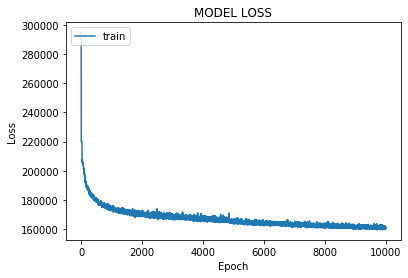

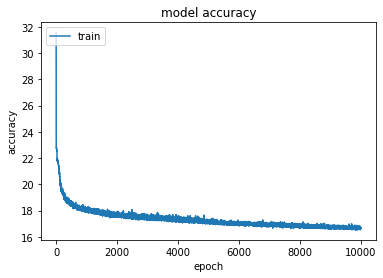

In [6]:
print(training.history.keys())
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['mean_absolute_percentage_error'])
#plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(x_train)